GOAL: using the patient's medical history and demographic, train a model to classify patients into different severity levels or inconclusive based on their features


target variable: classification_final


1 means TRUE

2 means FALSE

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data1 = pd.read_csv('/content/drive/MyDrive/Covid Data (2).csv')
data = pd.read_csv('/content/drive/MyDrive/Covid Data 2.csv')

In [ ]:
df = data.copy()

In [ ]:
print(data.head(50))

           USMER  MEDICAL_UNIT     SEX  PATIENT_TYPE   DATE_DIED INTUBED  \
0   SECOND_LEVEL             1  FEMALE       IN_UNIT      3/5/20     NaN   
1   SECOND_LEVEL             1    MALE       IN_UNIT      3/6/20     NaN   
2   SECOND_LEVEL             1    MALE  HOSPITALIZED      9/6/20    True   
3   SECOND_LEVEL             1  FEMALE       IN_UNIT     12/6/20     NaN   
4   SECOND_LEVEL             1    MALE       IN_UNIT  21/06/2020     NaN   
5   SECOND_LEVEL             1  FEMALE  HOSPITALIZED         NaN   False   
6   SECOND_LEVEL             1  FEMALE       IN_UNIT         NaN     NaN   
7   SECOND_LEVEL             1  FEMALE       IN_UNIT         NaN     NaN   
8   SECOND_LEVEL             1  FEMALE  HOSPITALIZED         NaN   False   
9   SECOND_LEVEL             1  FEMALE  HOSPITALIZED         NaN   False   
10  SECOND_LEVEL             1  FEMALE       IN_UNIT         NaN     NaN   
11  SECOND_LEVEL             1    MALE  HOSPITALIZED         NaN   False   
12  SECOND_L

In [ ]:
data.shape

(1048575, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  object 
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  object 
 3   PATIENT_TYPE          1048575 non-null  object 
 4   DATE_DIED             76942 non-null    object 
 5   INTUBED               192706 non-null   object 
 6   PNEUMONIA             1032572 non-null  object 
 7   AGE                   1048230 non-null  float64
 8   PREGNANT              521310 non-null   object 
 9   DIABETES              1045237 non-null  object 
 10  COPD                  1045572 non-null  object 
 11  ASTHMA                1045596 non-null  object 
 12  INMSUPR               1045171 non-null  object 
 13  HIPERTENSION          1045471 non-null  object 
 14  OTHER_DISEASE         1043530 non-

In [ ]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

Observations about the dataset:

USMER: treated medical units of the first, second, or third level

Medical_unit: type of institution of the national health system that provided care

sex: 1 for female 2 for male

patient_type:

  1: returned home
  2: hospitalized

date died: 9999-99-99

intubed: intubated or not

pneuomonia

age: numerical age

pregnant: pregnant or not

diabetes: has diabetes or not

copd: chronic obstructive pulmonary disease or not

asthma: is asthmatic or not

imnsupr: is immunosupressed or not

hypertension: is hypertensive or not

other disease: whether the patient has other diseases or no

cardiovascular: patient has cardiovascular disease

obesity: is obsese or not

renal: has renal disease or not

tobacco: uses tobacco or no

classification_final:

  1: covid with degree 1

  2: covid degree 2

  3: covid degree 3

  4+: not a carrier of covid, inconclusive

icu: has been admitted to icu or no

In [ ]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,SECOND_LEVEL,1,FEMALE,IN_UNIT,3/5/20,NaN,True,65.0,False,False,False,False,False,True,False,False,False,False,False,3,NaN
1,SECOND_LEVEL,1,MALE,IN_UNIT,3/6/20,NaN,True,72.0,NaN,False,False,False,False,True,False,False,True,True,False,5,NaN
2,SECOND_LEVEL,1,MALE,HOSPITALIZED,9/6/20,True,False,55.0,NaN,True,False,False,False,False,False,False,False,False,False,3,False
3,SECOND_LEVEL,1,FEMALE,IN_UNIT,12/6/20,NaN,False,53.0,False,False,False,False,False,False,False,False,False,False,False,7,NaN
4,SECOND_LEVEL,1,MALE,IN_UNIT,21/06/2020,NaN,False,68.0,NaN,True,False,False,False,True,False,False,False,False,False,3,NaN


In [ ]:
df.describe(include = 'all').T
#is medical_unit useful?

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
USMER,1048575,2,SECOND_LEVEL,662903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEDICAL_UNIT,1048575.0,NaN,NaN,NaN,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575,2,FEMALE,525064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PATIENT_TYPE,1048575,2,IN_UNIT,848544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DATE_DIED,76942,400,6/7/20,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INTUBED,192706,2,False,159050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PNEUMONIA,1032572,2,False,892534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,1048230.0,NaN,NaN,NaN,41.77565,16.879539,0.0,30.0,40.0,53.0,121.0
PREGNANT,521310,2,False,513179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIABETES,1045237,2,False,920248,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.drop(['MEDICAL_UNIT'],axis=1,inplace=True)

In [ ]:
data.shape

(1048575, 20)

In [ ]:
#check sum of null vals in each col
data.isna().sum()

USMER                        0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

In [ ]:
#remove null vals in cols of type object
#data.dropna(axis=0,subset=['DATE_DIED','PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO','ICU'],inplace=True)

In [ ]:
#filling in NULL vals
data.INTUBED.fillna(2,inplace=True)
data.PNEUMONIA.fillna(2,inplace=True)
data.PREGNANT.fillna(2,inplace=True)
data.DIABETES.fillna(2,inplace=True)
data.COPD.fillna(2,inplace=True)
data.ASTHMA.fillna(2,inplace=True)
data.INMSUPR.fillna(2,inplace=True)
data.HIPERTENSION.fillna(2,inplace=True)
data.OTHER_DISEASE.fillna(2,inplace=True)
data.CARDIOVASCULAR.fillna(2,inplace=True)
data.OBESITY.fillna(2,inplace=True)
data.RENAL_CHRONIC.fillna(2,inplace=True)
data.TOBACCO.fillna(2,inplace=True)
data.ICU.fillna(2,inplace=True)



In [ ]:
data['CLASIFFICATION_FINAL']= data['CLASIFFICATION_FINAL'].apply(lambda x:4 if x > 4  else x)

dont run the cell bel

In [ ]:
#data['DATE_DIED']= pd.to_datetime(data['DATE_DIED'],errors='coerce')

In [ ]:
data.head()

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,SECOND_LEVEL,FEMALE,IN_UNIT,3/5/20,2,True,65.0,False,False,False,False,False,True,False,False,False,False,False,3,2
1,SECOND_LEVEL,MALE,IN_UNIT,3/6/20,2,True,72.0,2,False,False,False,False,True,False,False,True,True,False,4,2
2,SECOND_LEVEL,MALE,HOSPITALIZED,9/6/20,True,False,55.0,2,True,False,False,False,False,False,False,False,False,False,3,False
3,SECOND_LEVEL,FEMALE,IN_UNIT,12/6/20,2,False,53.0,False,False,False,False,False,False,False,False,False,False,False,4,2
4,SECOND_LEVEL,MALE,IN_UNIT,21/06/2020,2,False,68.0,2,True,False,False,False,True,False,False,False,False,False,3,2


In [ ]:
data.isna().sum()

USMER                        0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                      0
PNEUMONIA                    0
AGE                        345
PREGNANT                     0
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
ICU                          0
dtype: int64

In [ ]:
data.shape

(1048575, 20)

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
USMER,1048575,2,SECOND_LEVEL,662903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEX,1048575,2,FEMALE,525064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PATIENT_TYPE,1048575,2,IN_UNIT,848544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DATE_DIED,76942,400,6/7/20,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INTUBED,1048575.0,3.0,2.0,855869.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PNEUMONIA,1048575,3,False,892534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,1048230.0,NaN,NaN,NaN,41.77565,16.879539,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,3.0,2.0,527265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIABETES,1048575,3,False,920248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COPD,1048575,3,False,1030510,NaN,NaN,NaN,NaN,NaN,NaN,NaN


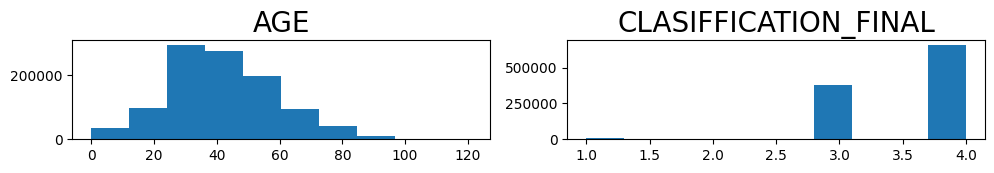

In [ ]:
#start univariate analysis
# histogram
num_cols = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,25))
for i in range(len(num_cols)):
  plt.subplot(18,3,i+1)
  plt.hist(data[num_cols[i]])
  plt.tight_layout()
  plt.title(num_cols[i],fontsize=20)

plt.show()

plot categorical variables

In [ ]:
#plot all categorical variables THERE ARE 17 ( not including date)
'''
plt.figure(figsize=(20,25))

plt.subplot(1,2,1)
sns.countplot(data['ASTHMA'])
plt.xlabel('Asthma')

plt.subplot(1,2,2)
sns.countplot(data['CARDIOVASCULAR'])
plt.xlabel('Cardiovascular disease')

plt.subplot(1,2,3)
sns.countplot(data['COPD'])
plt.xlabel('COPD')

plt.show()
'''


"\nplt.figure(figsize=(20,25))\n\nplt.subplot(1,2,1)\nsns.countplot(data['ASTHMA'])\nplt.xlabel('Asthma')\n\nplt.subplot(1,2,2)\nsns.countplot(data['CARDIOVASCULAR'])\nplt.xlabel('Cardiovascular disease')\n\nplt.subplot(1,2,3)\nsns.countplot(data['COPD'])\nplt.xlabel('COPD')\n\nplt.show()\n"

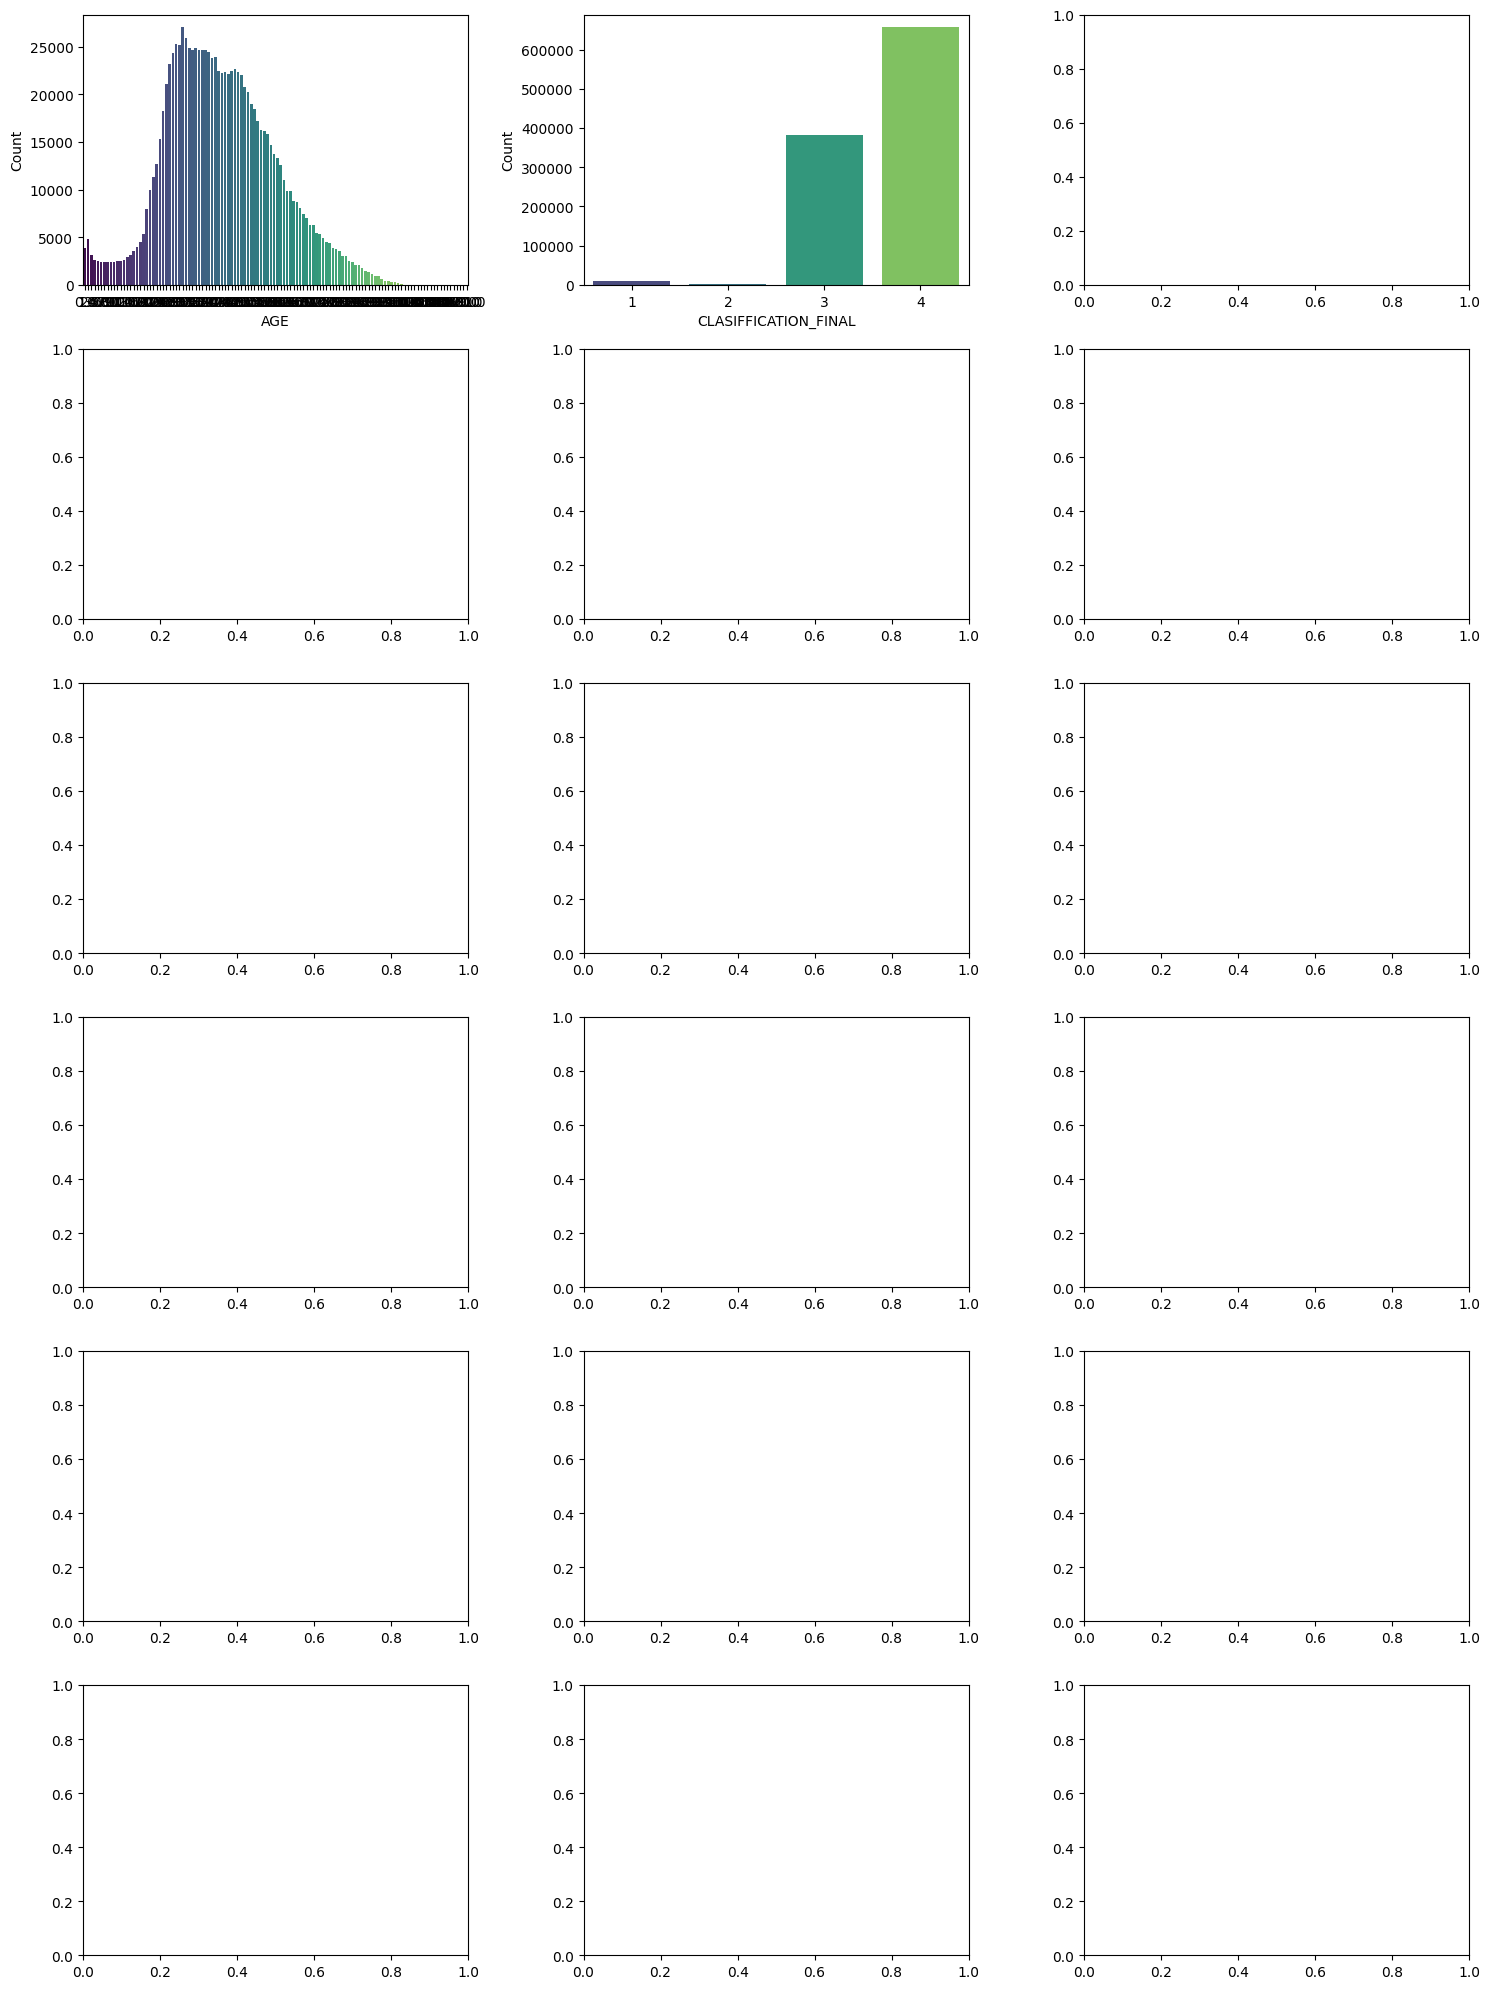

In [ ]:
fig,axes= plt.subplots(6,3,figsize=(15,20))
axes= axes.flatten()
for i, col in enumerate(num_cols):
  counts=data[col].value_counts()
  sns.countplot(x=col,data=data,ax=axes[i],palette='viridis')
  #axes[i-1].set_title(f'Countplot of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

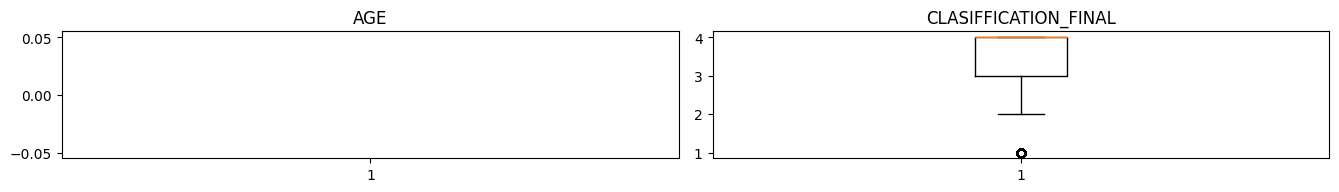

In [ ]:
#outlier detection using boxplots
plt.figure(figsize=(20,20))

for i, variable in enumerate(num_cols):
  plt.subplot(12,3,i+1)
  plt.boxplot(data[variable],vert=True)
  plt.tight_layout()
  plt.title(variable)

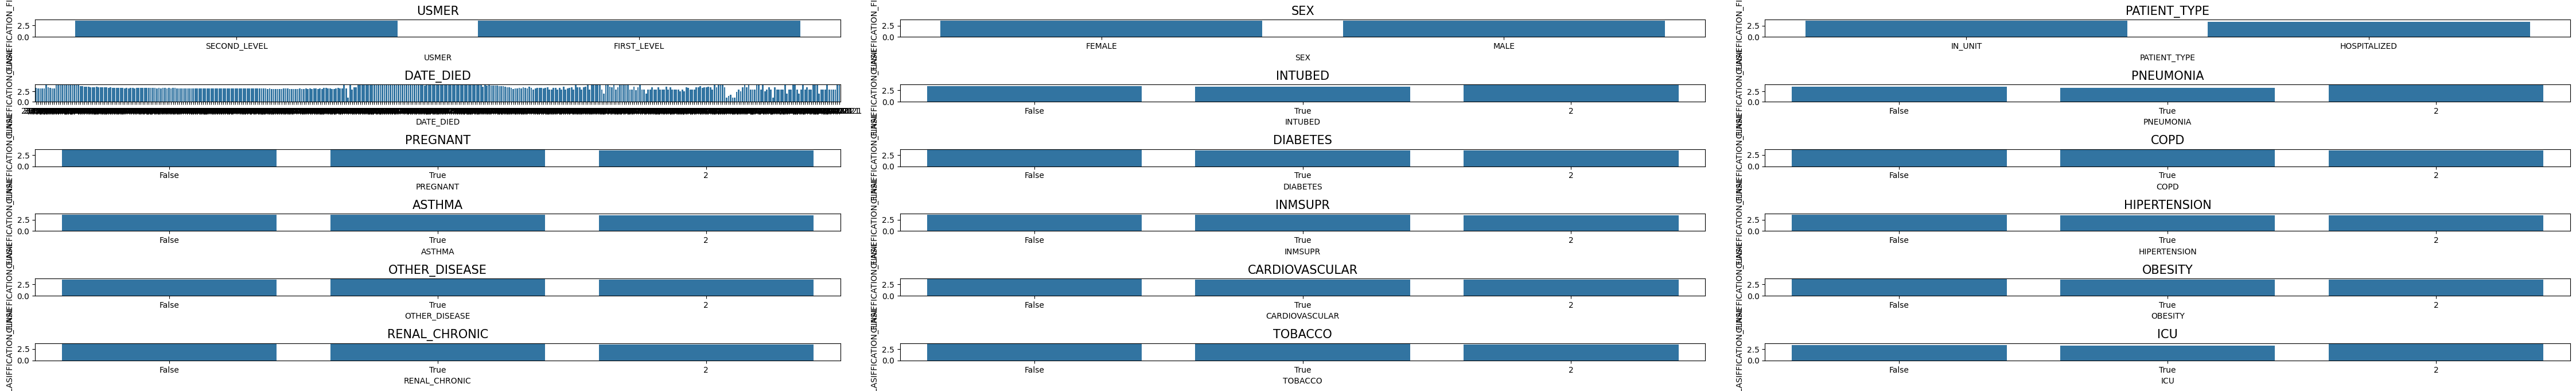

In [ ]:
#multivariate analysis

plt.figure(figsize=(45,20))
obj_col = data.select_dtypes(include =object).columns.tolist()
for i in range(len(obj_col)):
  plt.subplot(18,3,i+1)
  sns.barplot(x=obj_col[i], y= data['CLASIFFICATION_FINAL'],data=data,ci=None)
  plt.tight_layout()
  plt.title(obj_col[i],fontsize=15)
plt.show()

THERE are no categorical variables !! so the above multivariate analysis printed nothing


<Axes: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

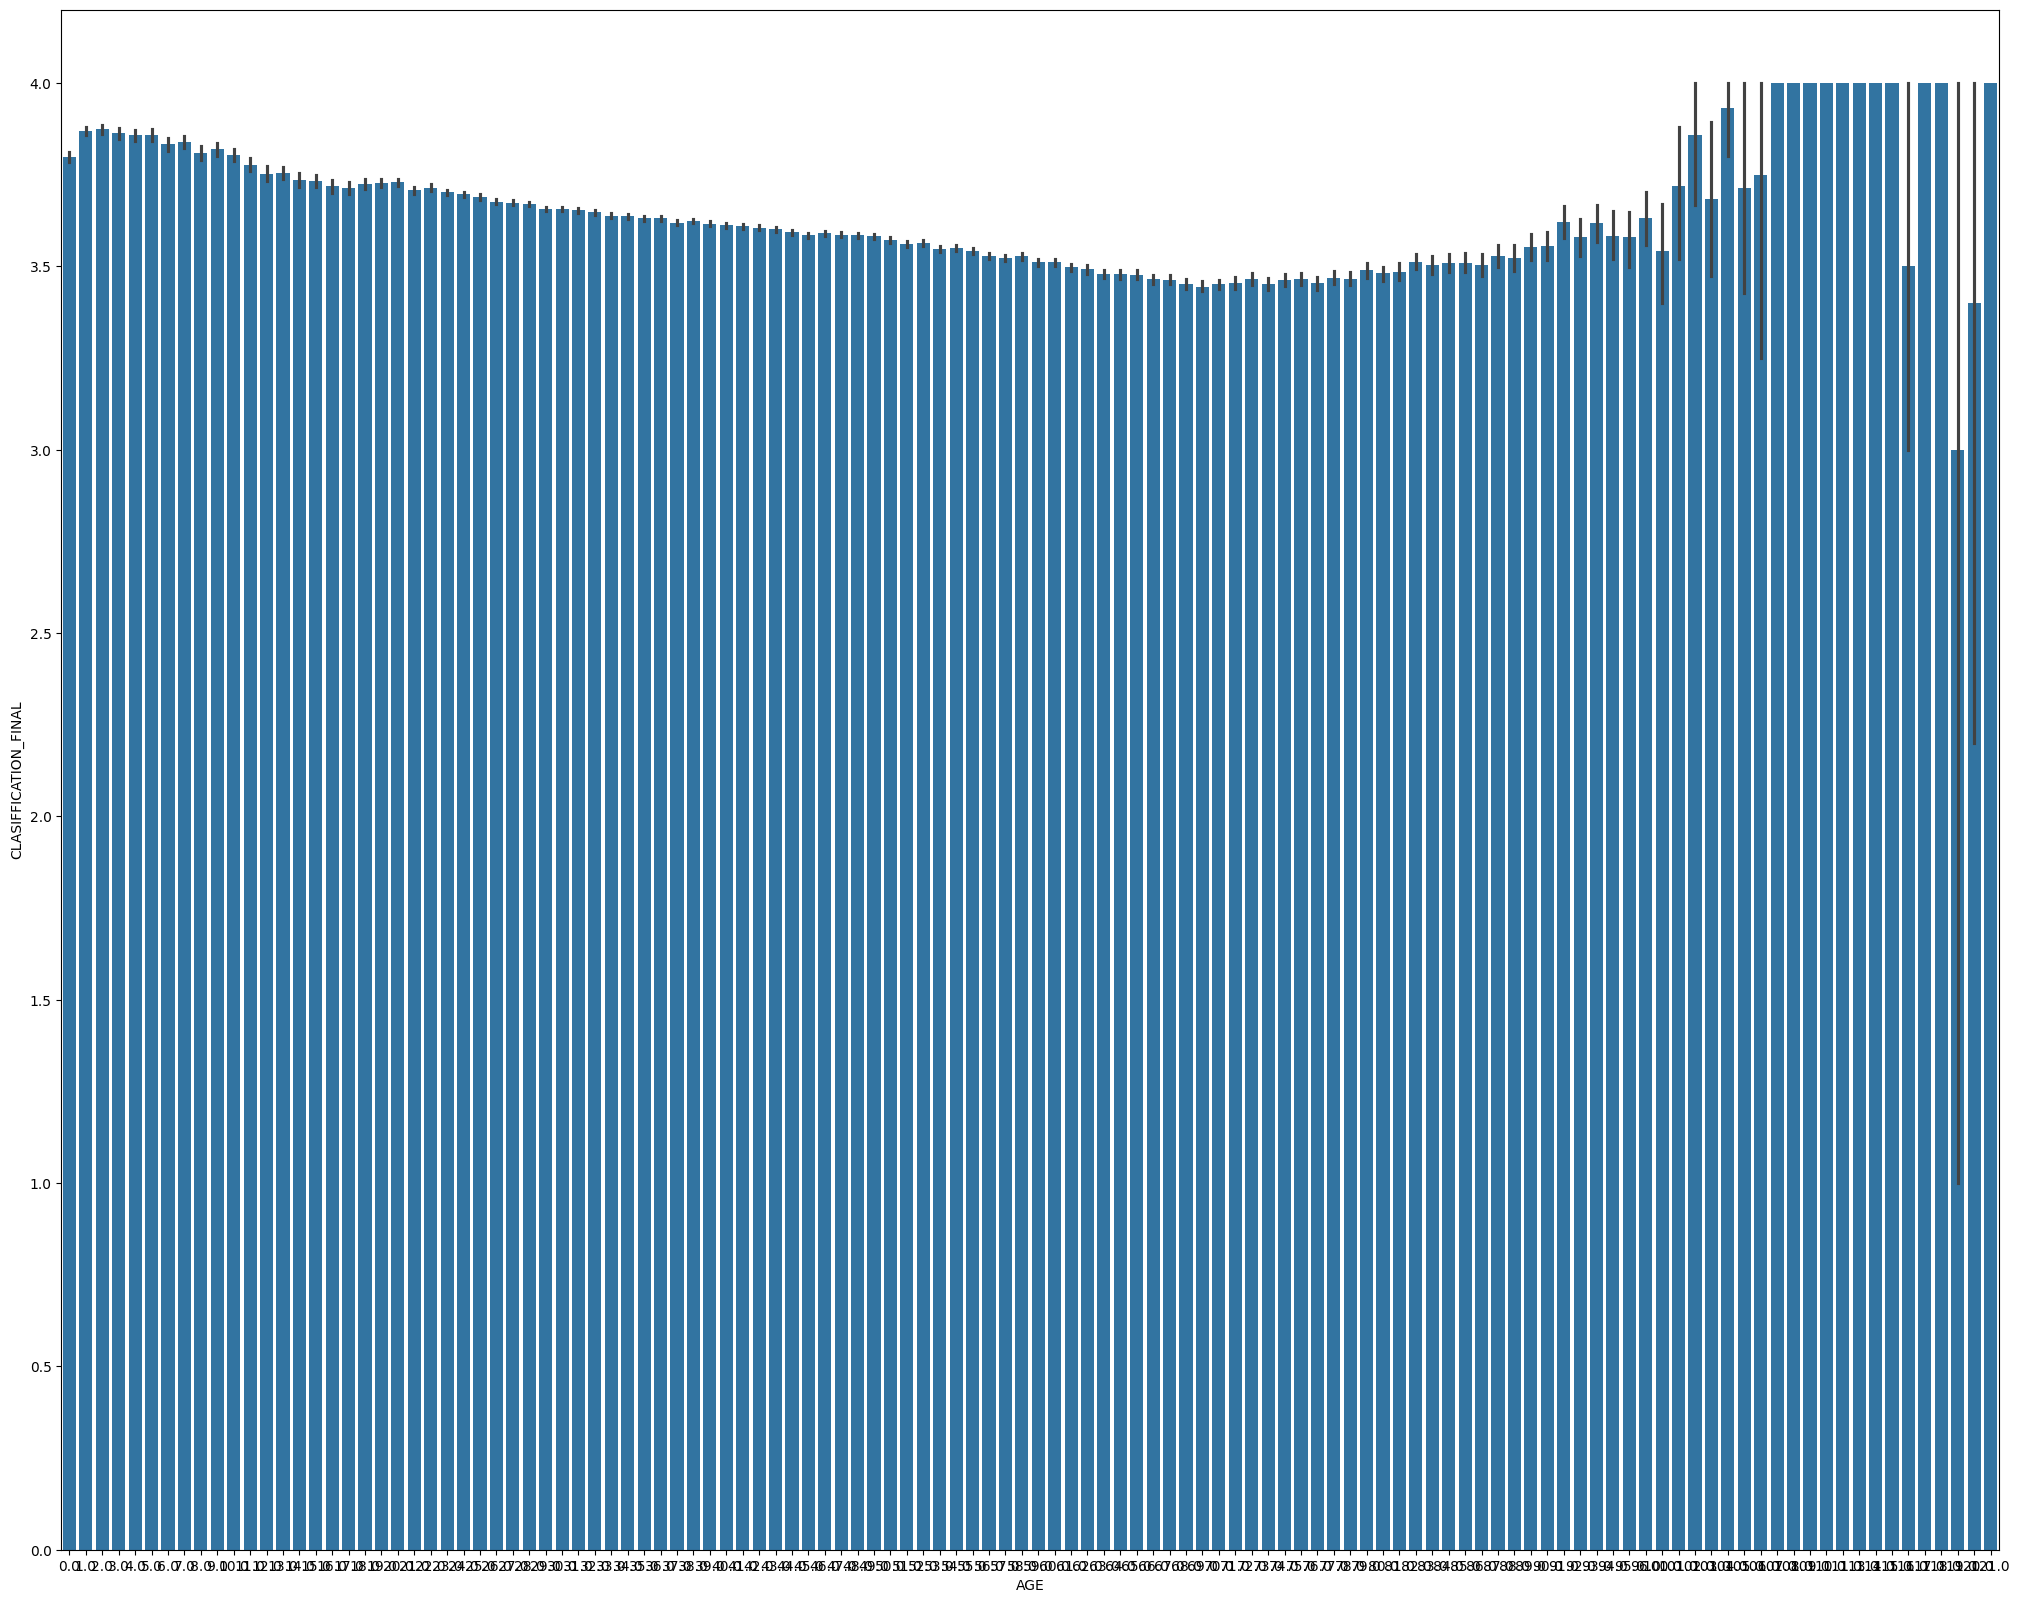

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='AGE',y='CLASIFFICATION_FINAL', data=data)

<Axes: xlabel='SEX', ylabel='CLASIFFICATION_FINAL'>

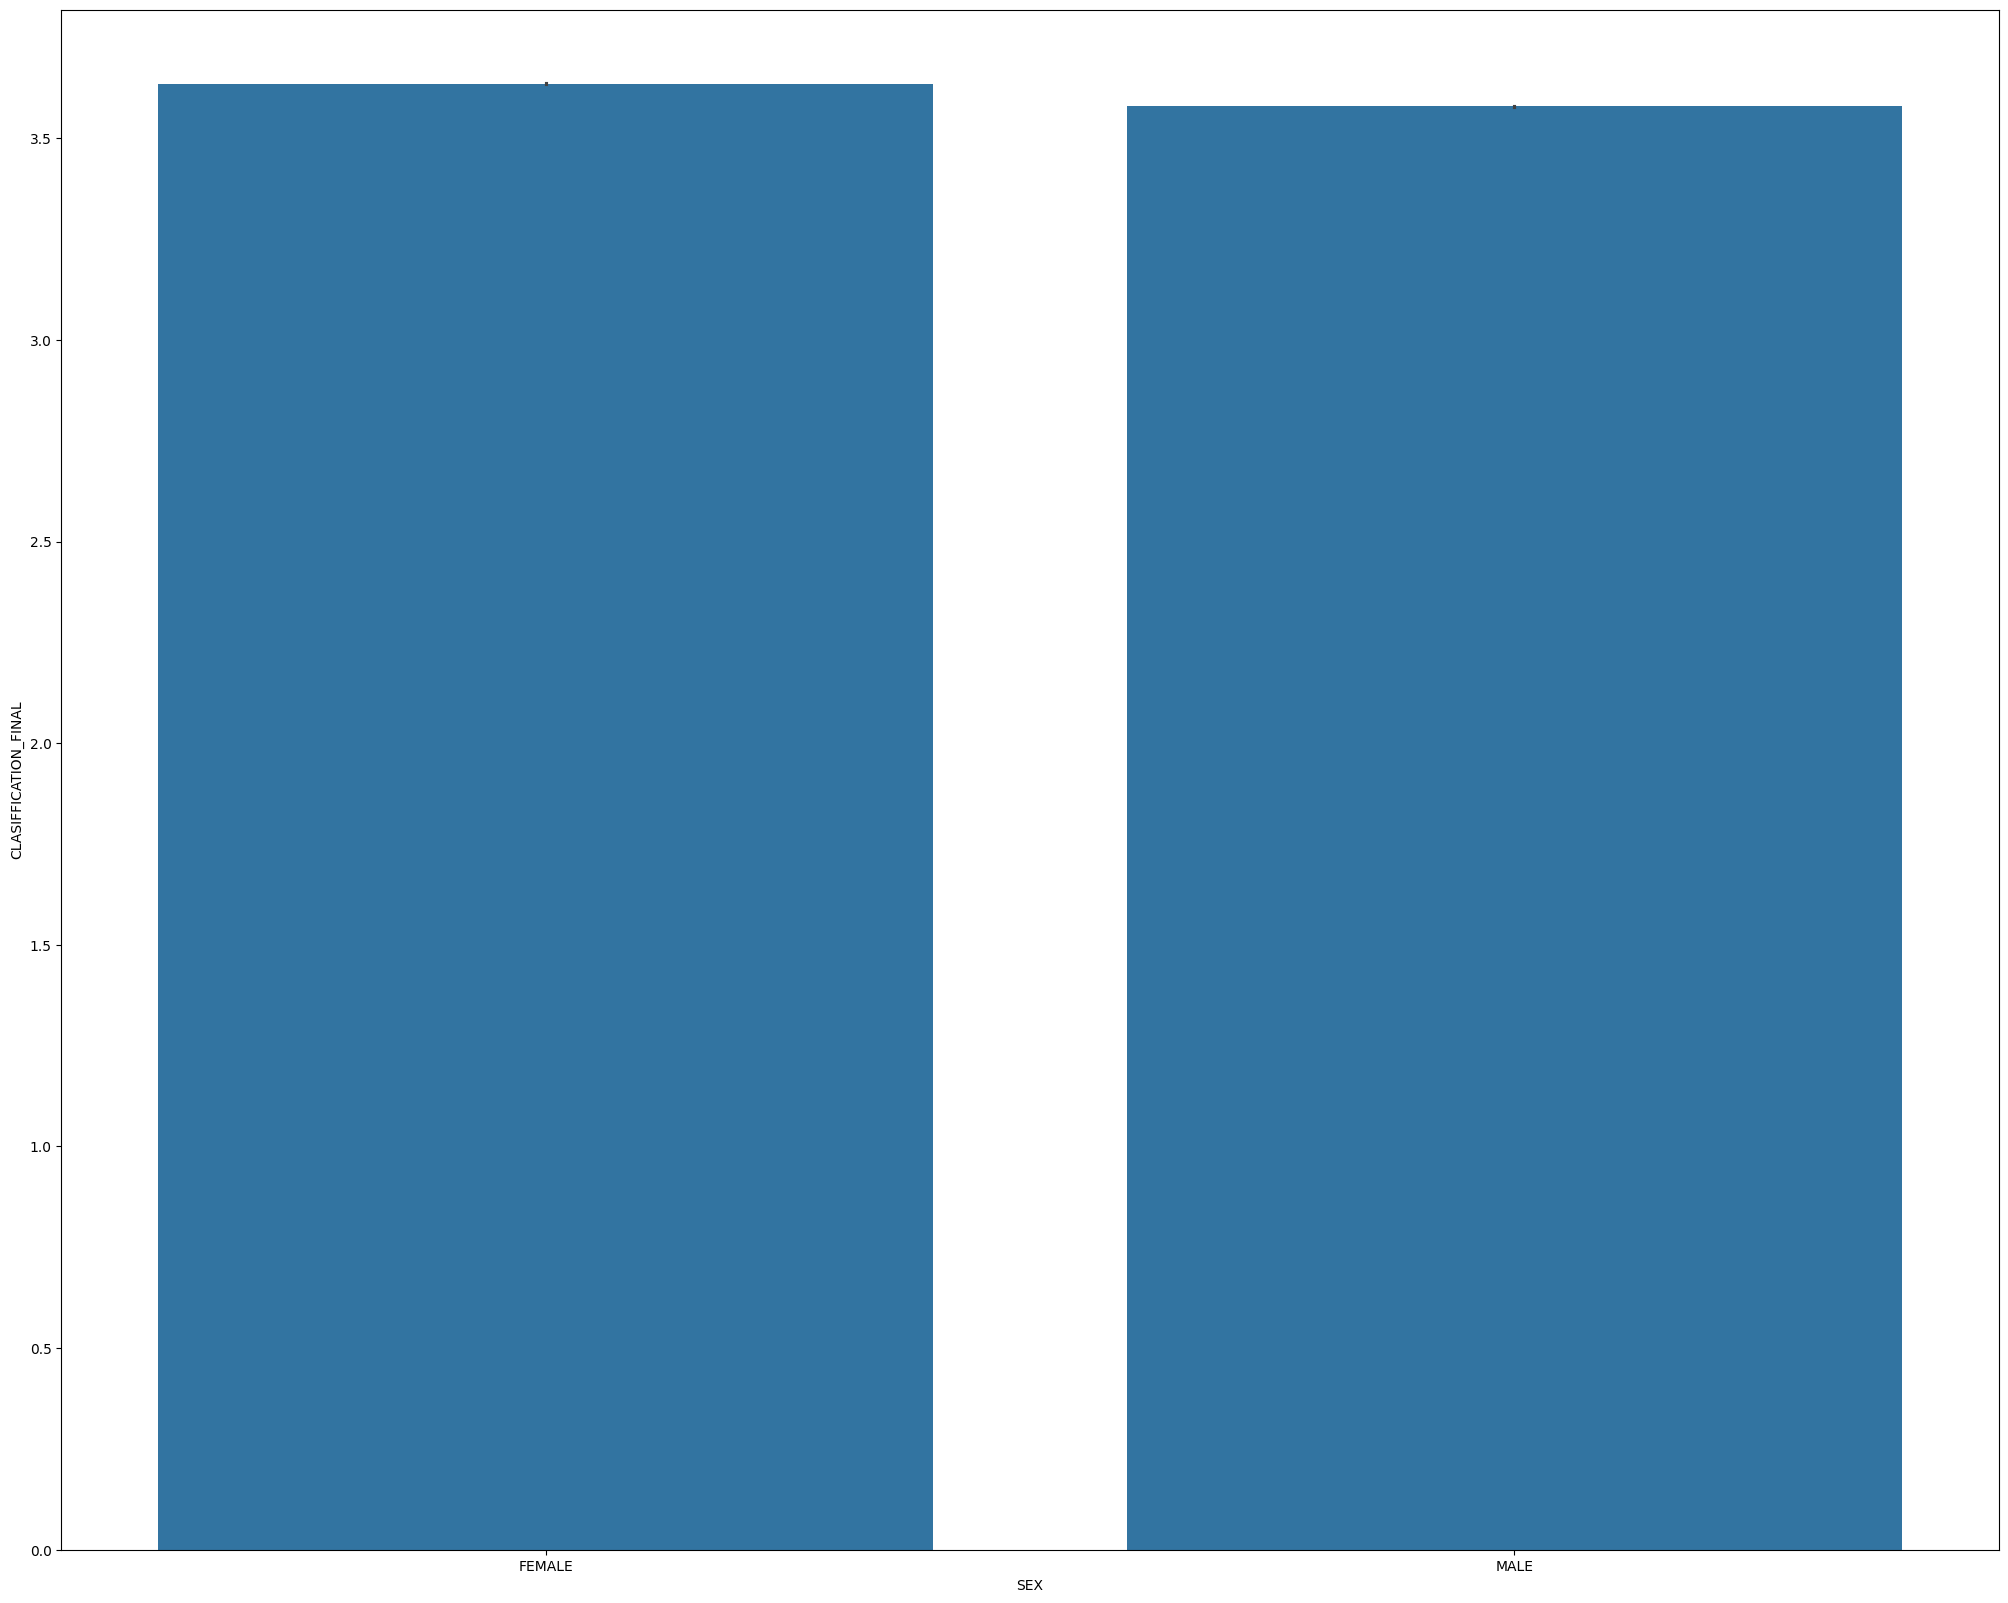

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='SEX',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='PATIENT_TYPE', ylabel='CLASIFFICATION_FINAL'>

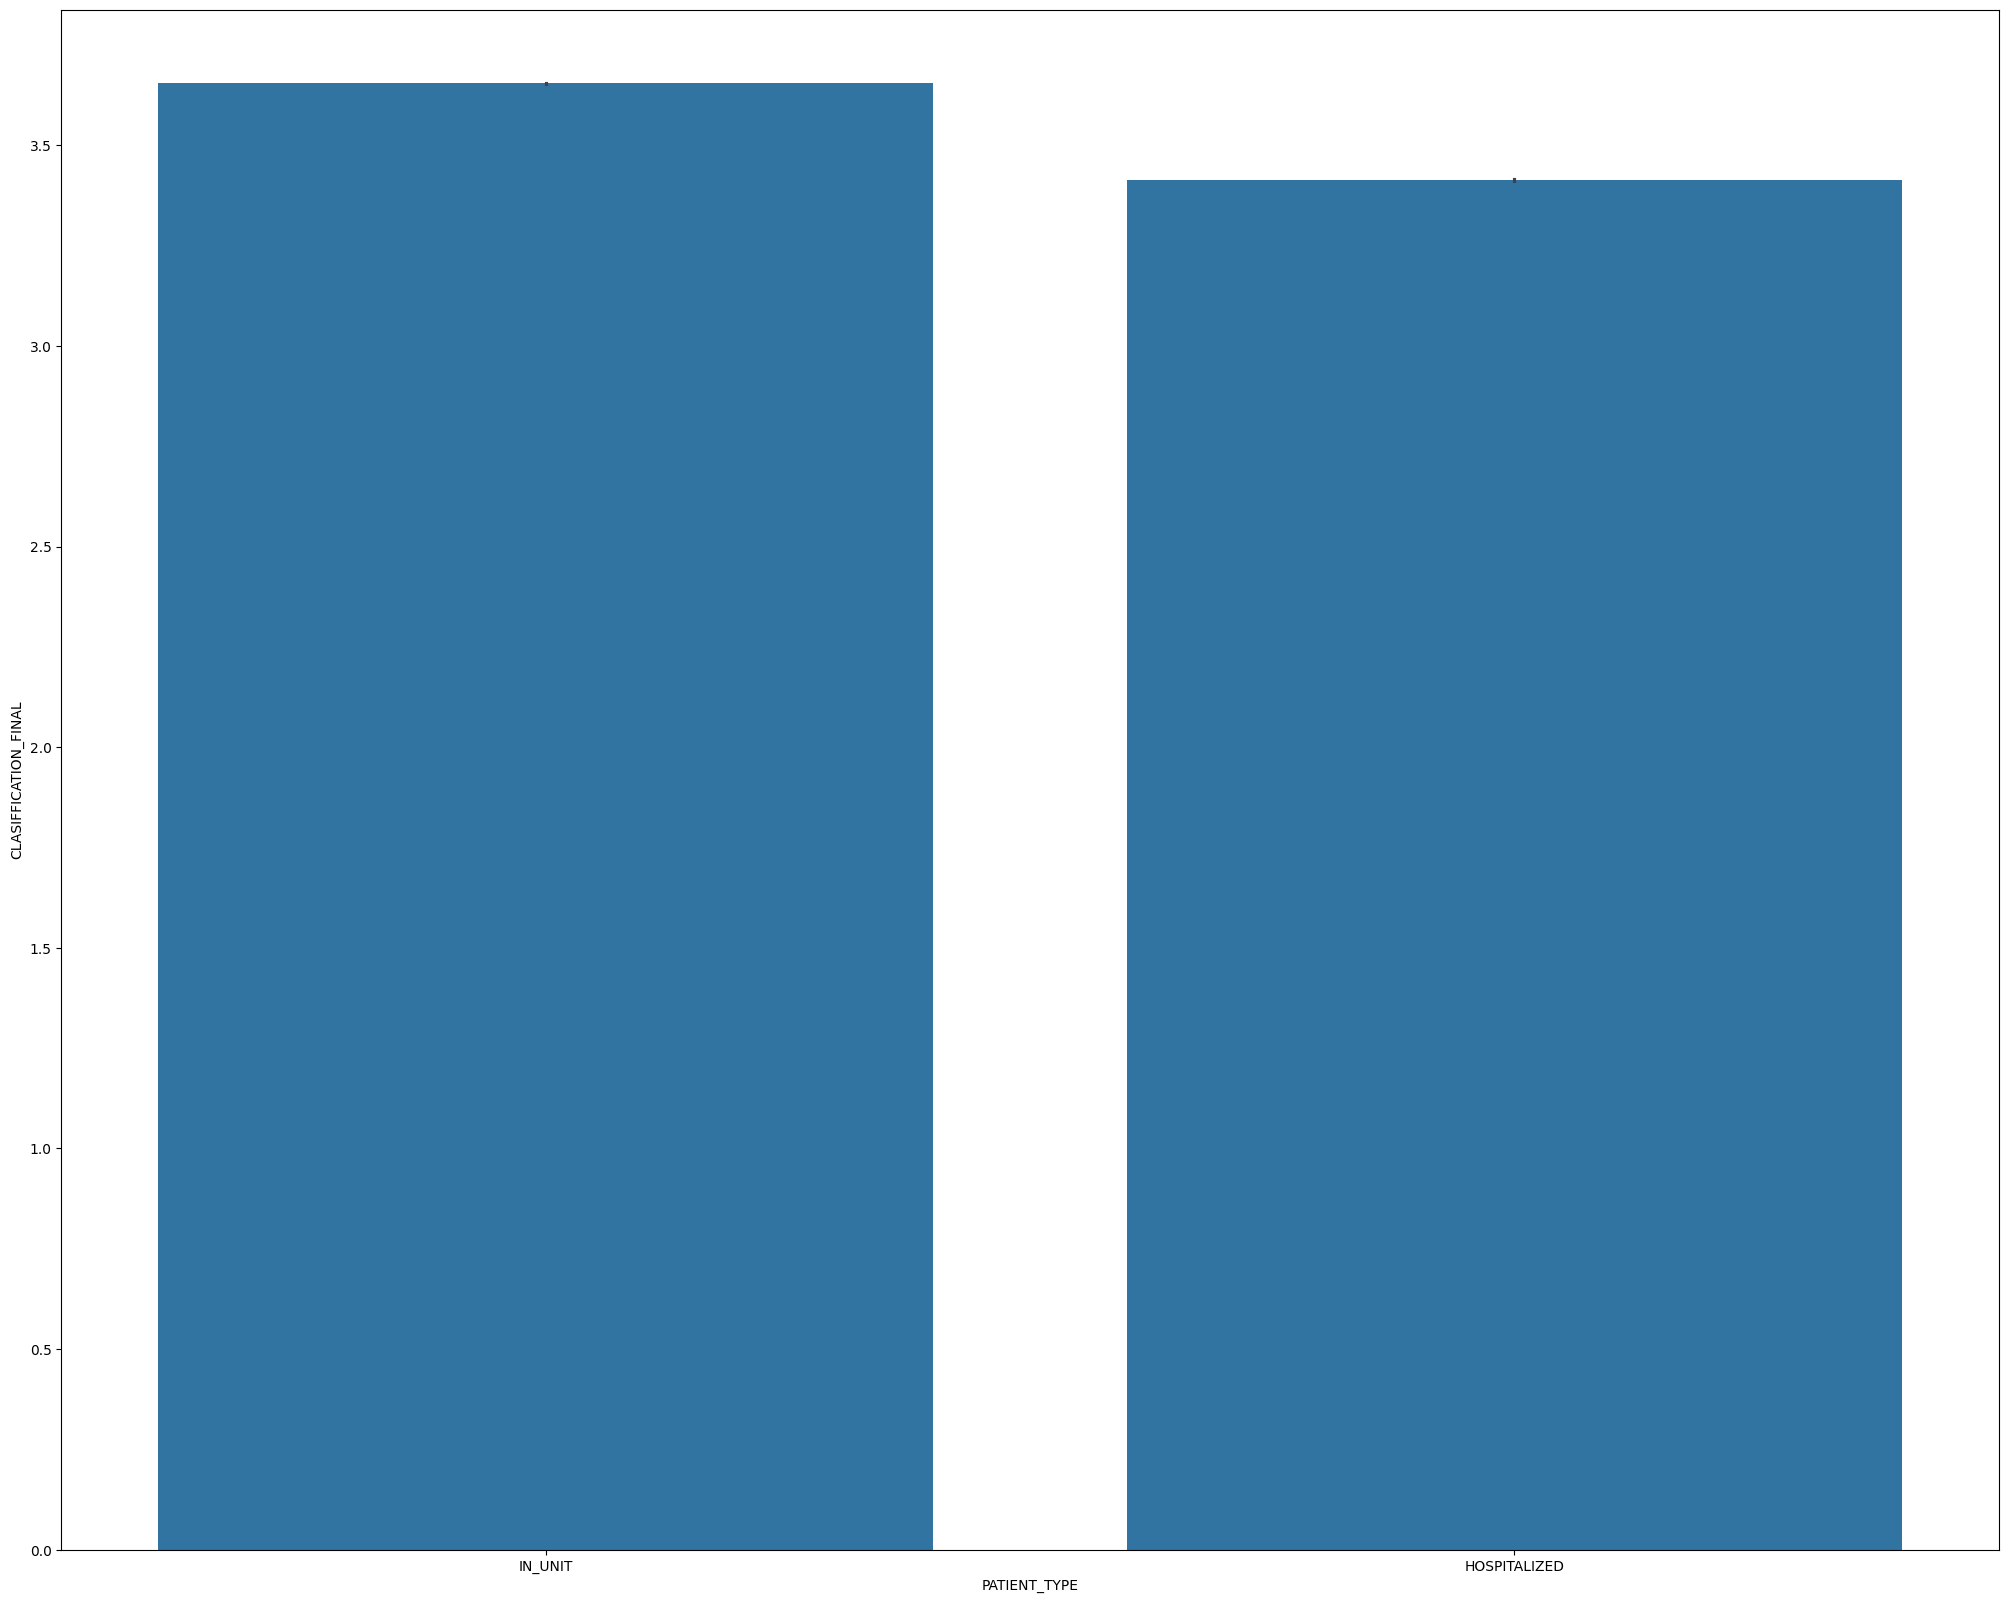

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='PATIENT_TYPE',y='CLASIFFICATION_FINAL',data=data)

<Axes: xlabel='PNEUMONIA', ylabel='CLASIFFICATION_FINAL'>

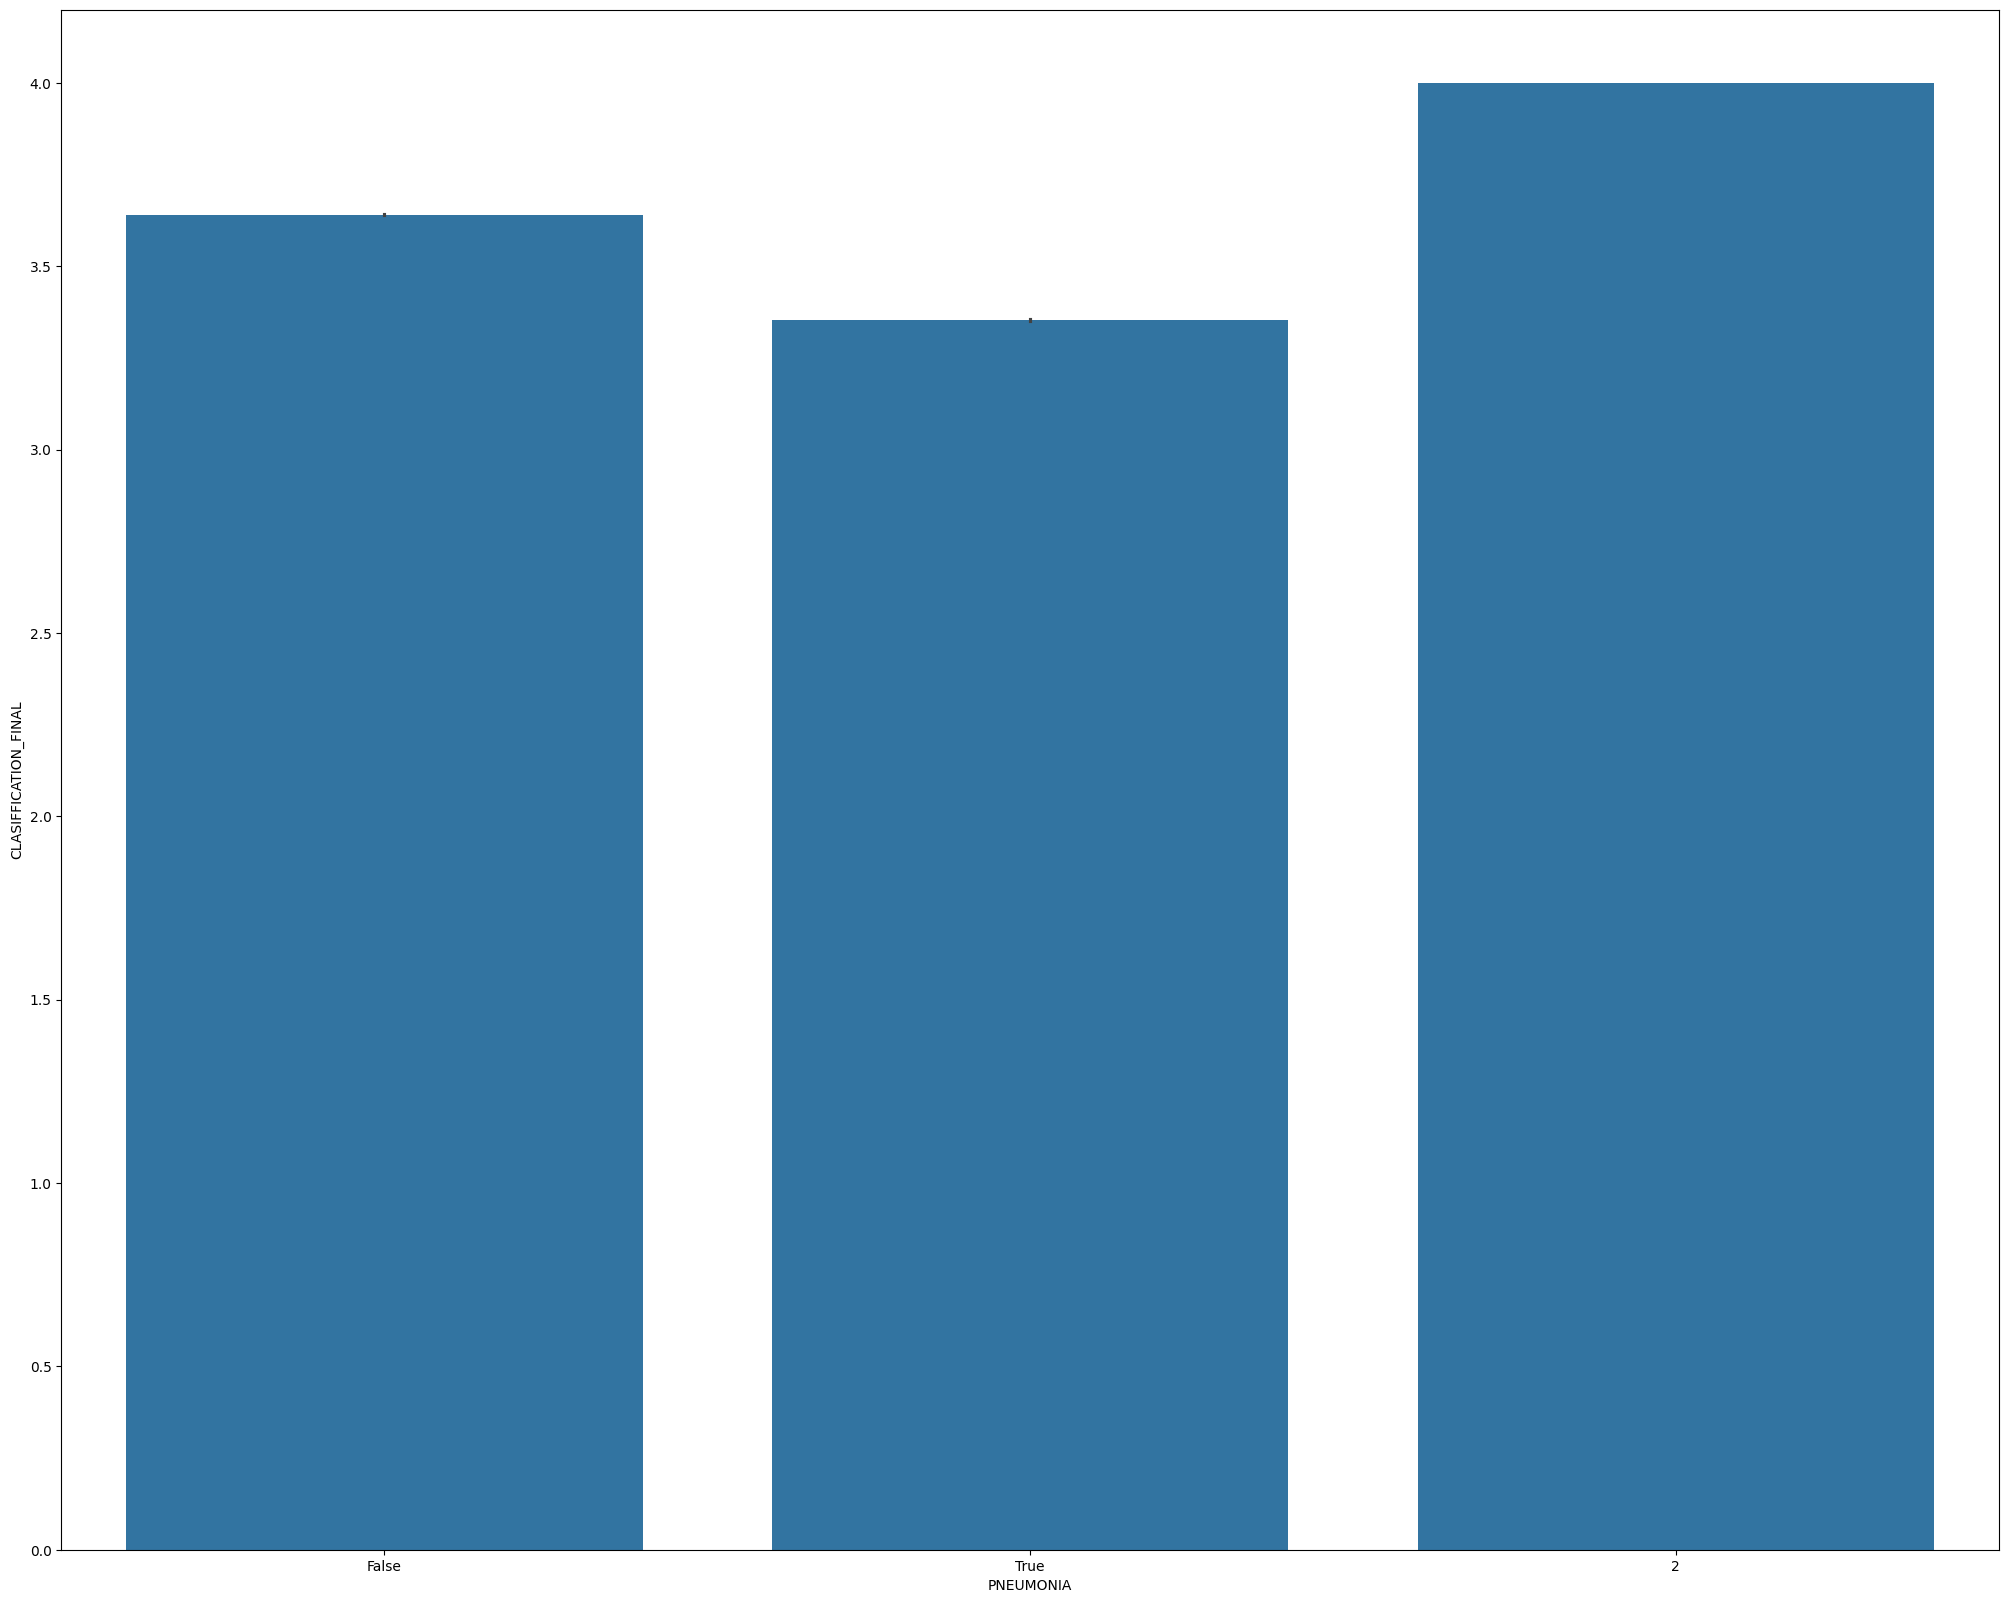

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='PNEUMONIA',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='PREGNANT', ylabel='CLASIFFICATION_FINAL'>

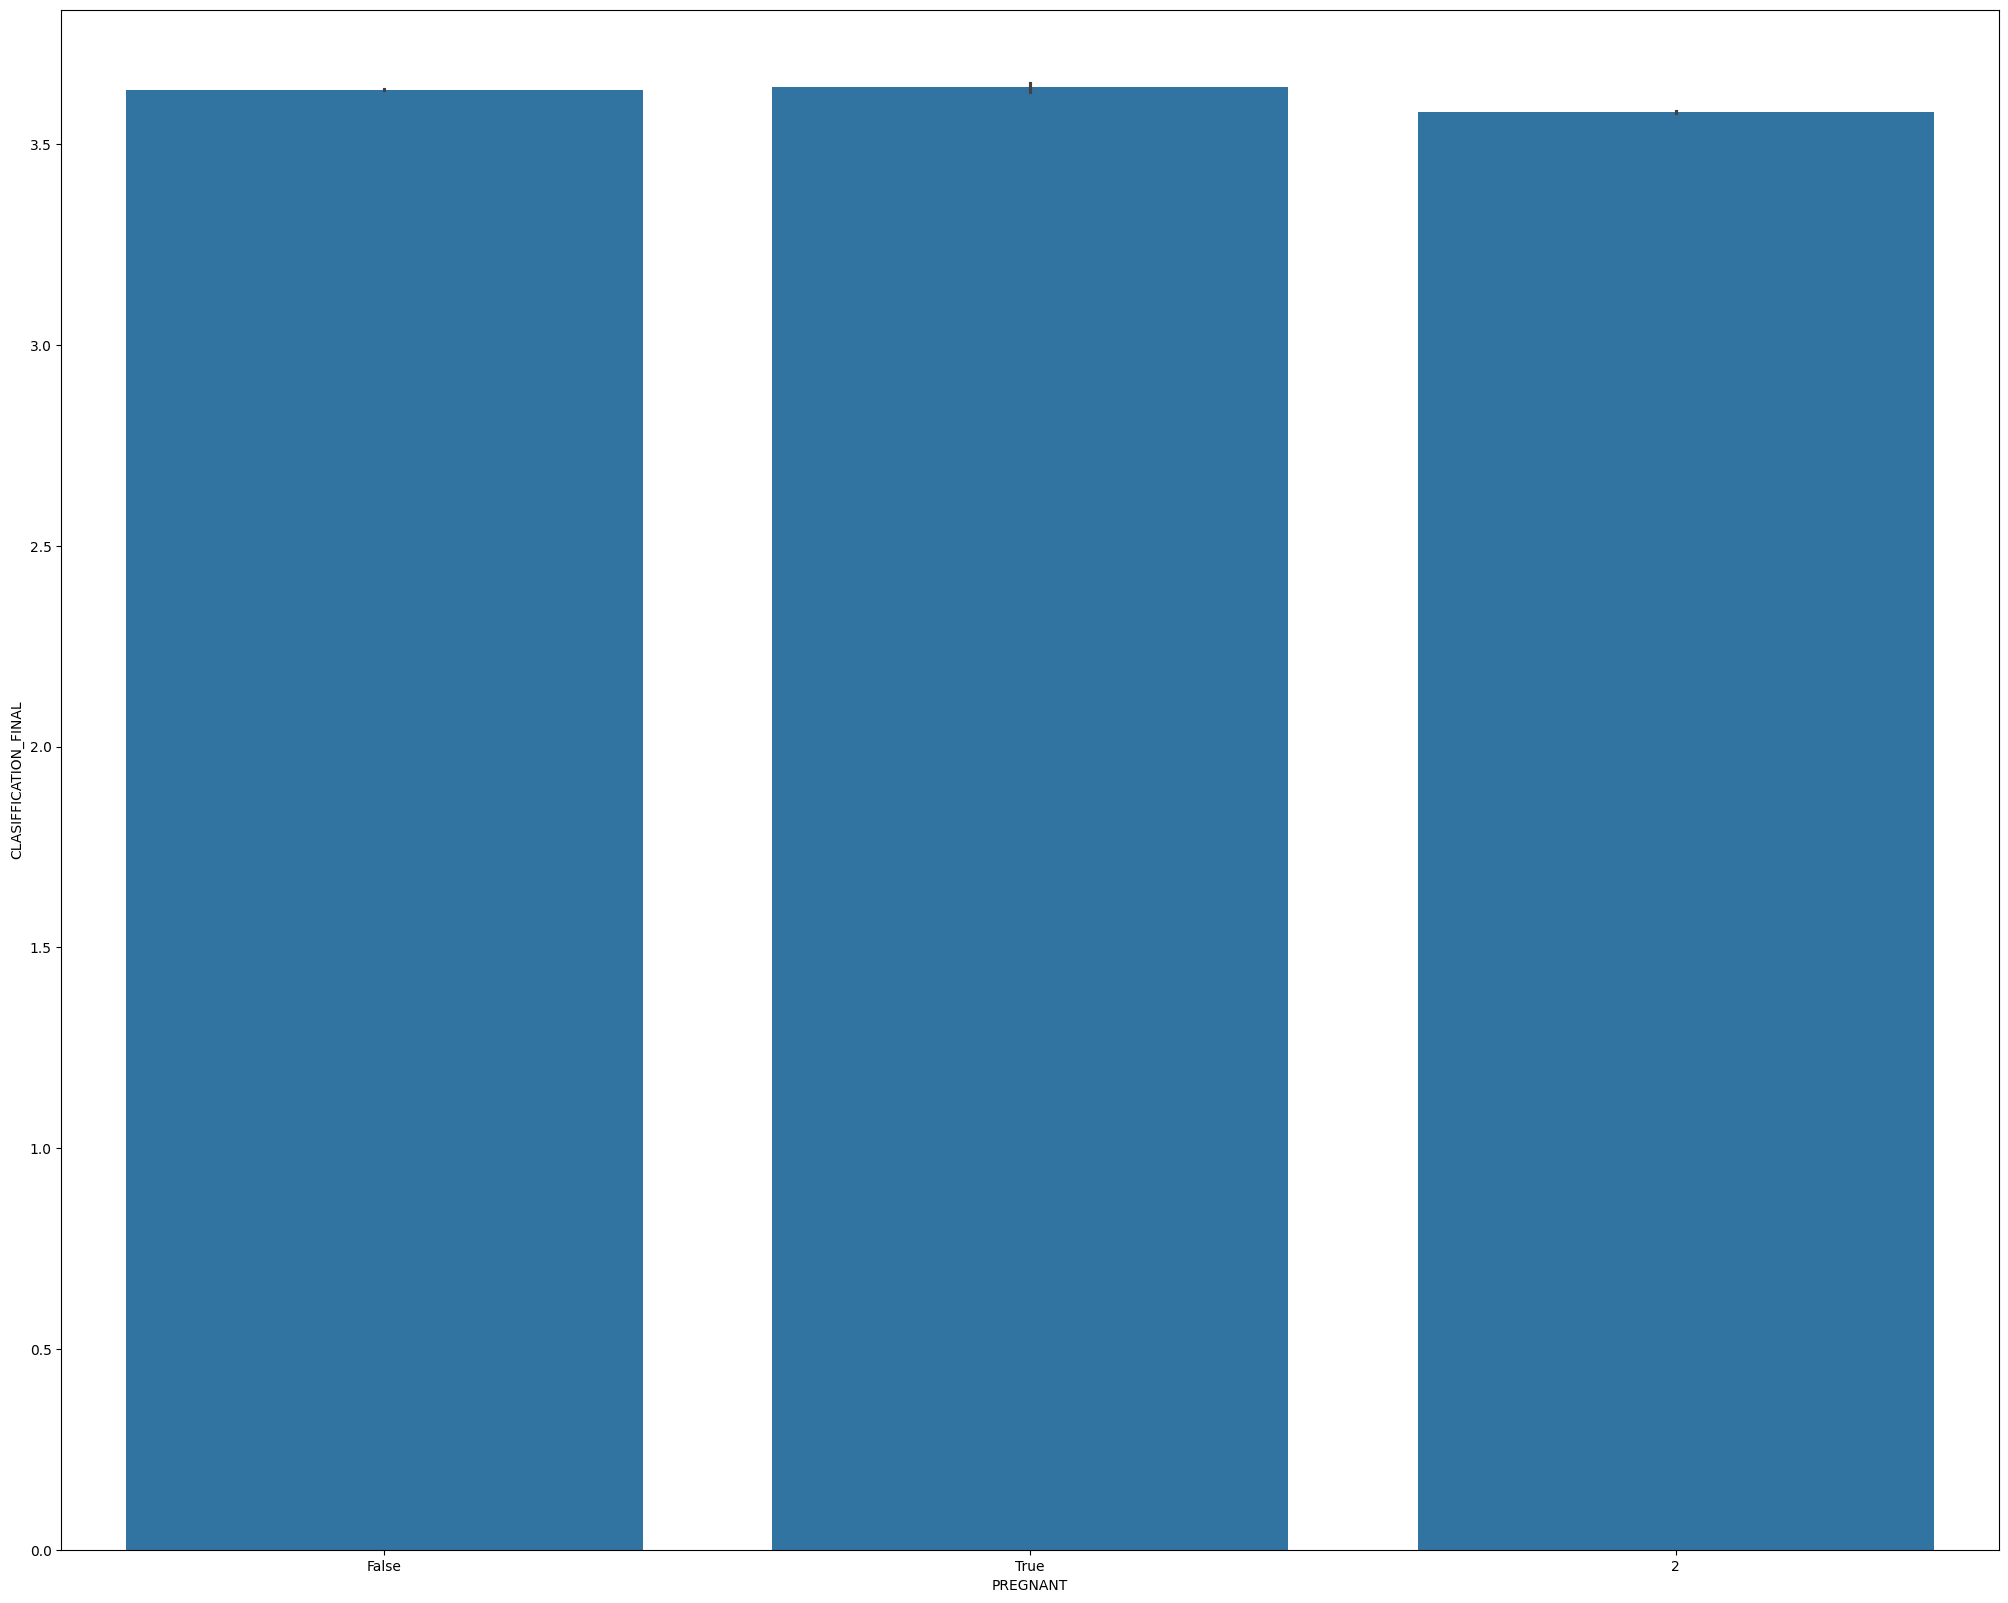

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='PREGNANT',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='DIABETES', ylabel='CLASIFFICATION_FINAL'>

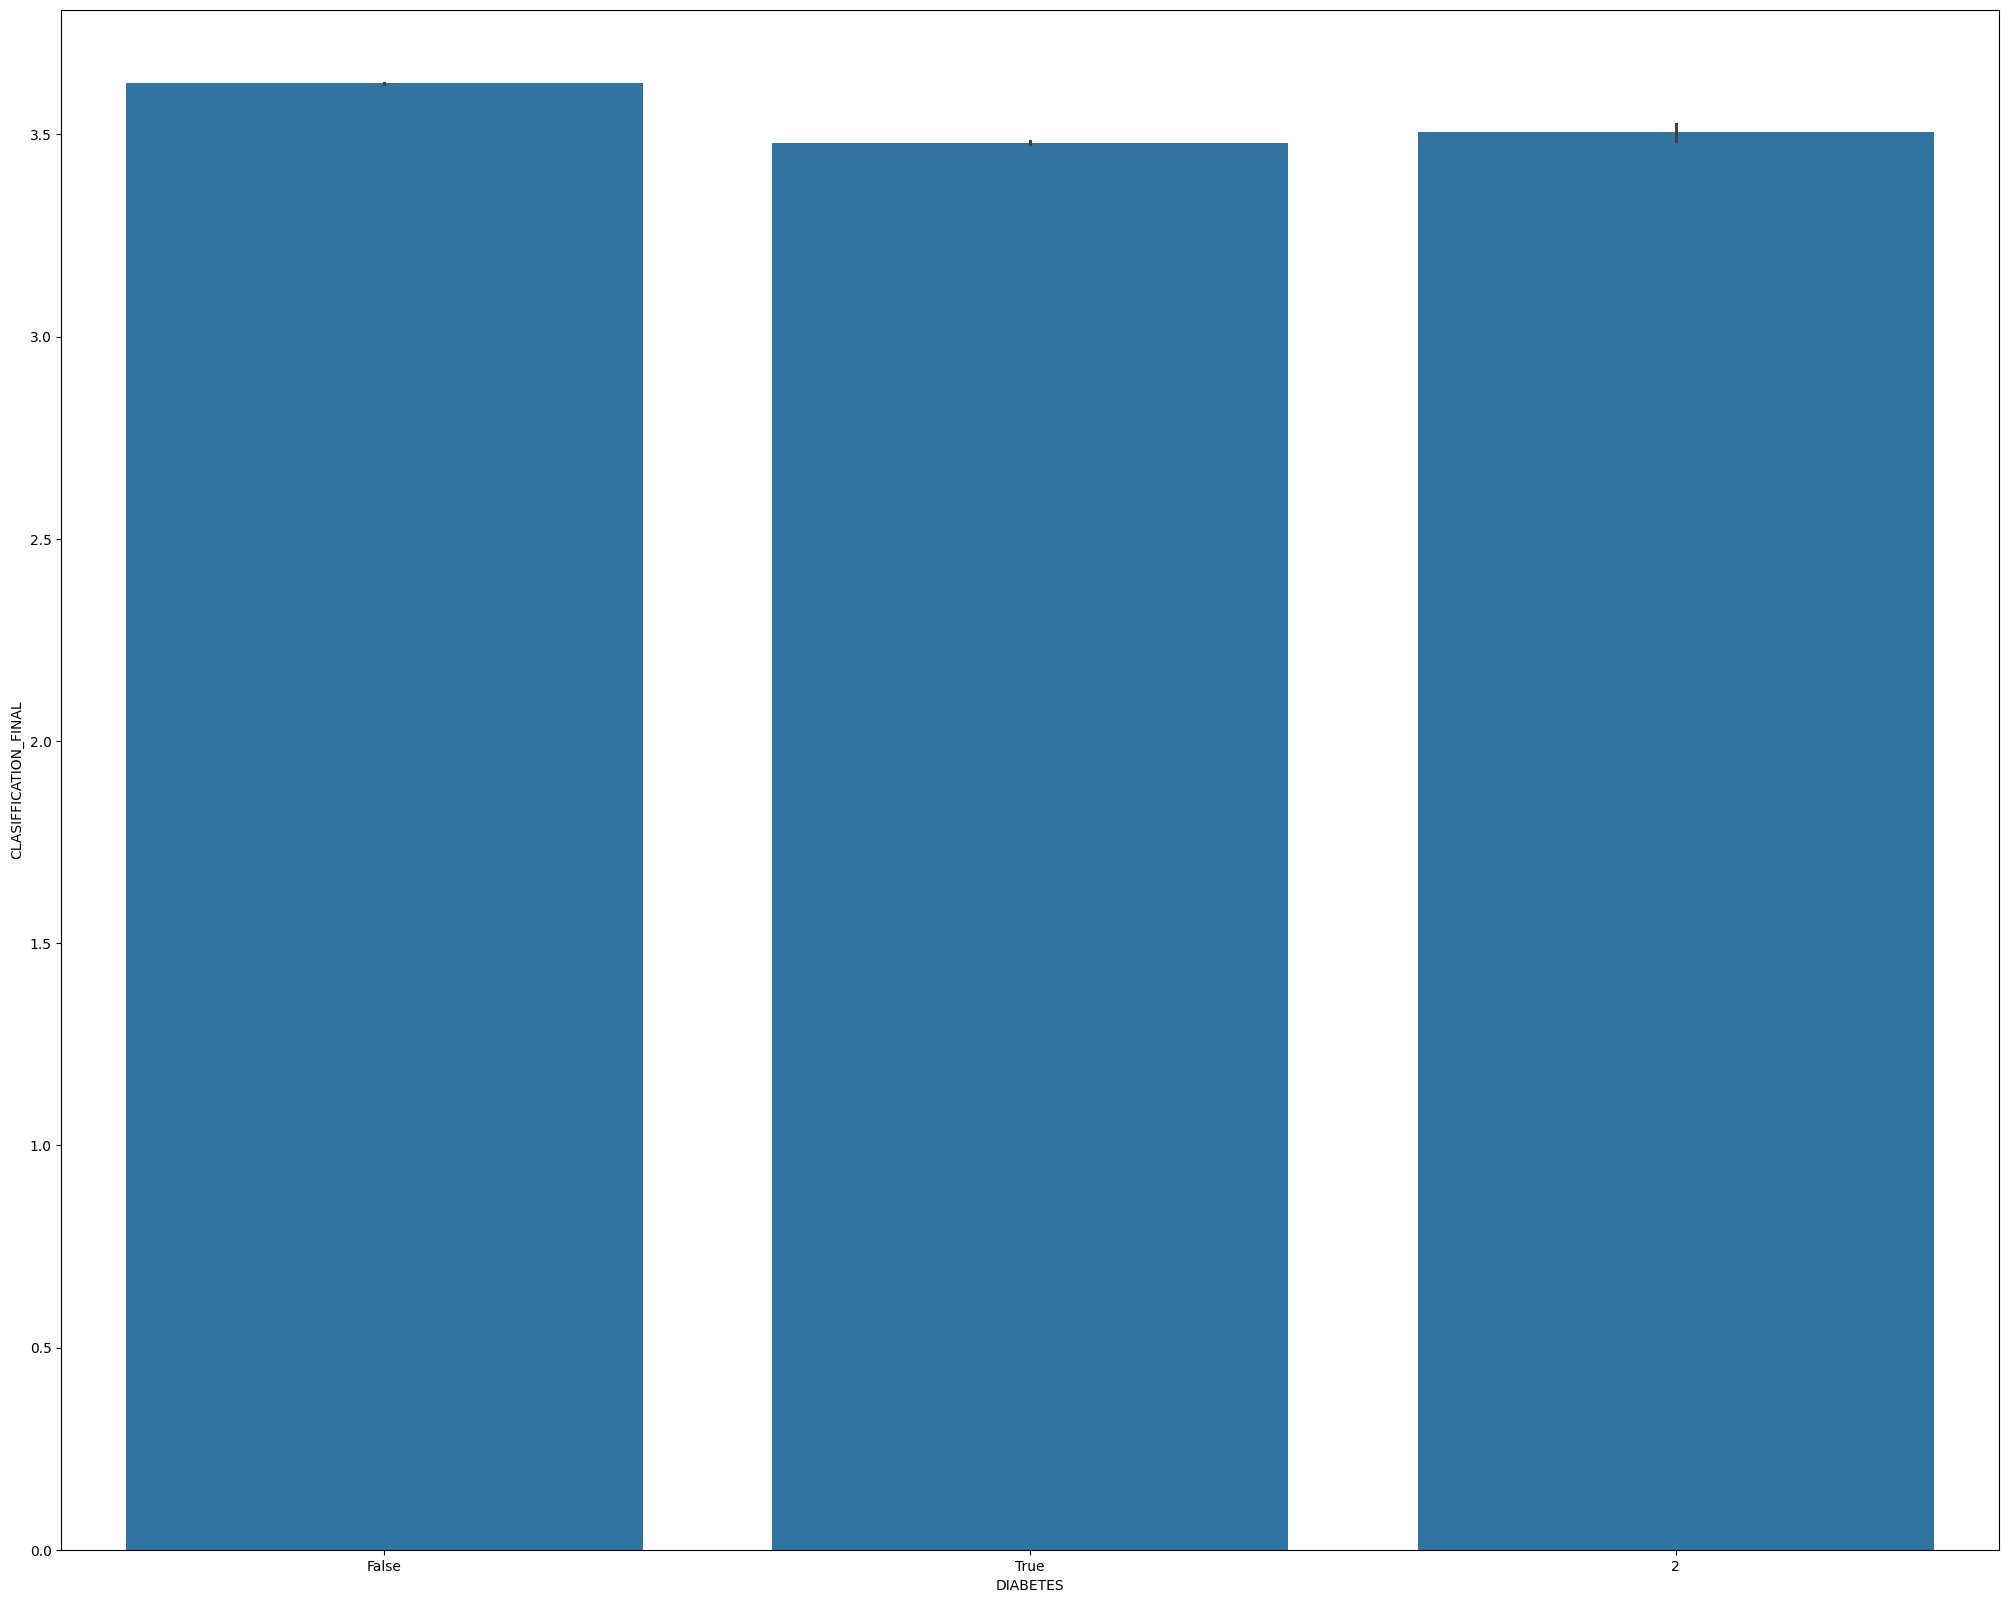

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='DIABETES',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='COPD', ylabel='CLASIFFICATION_FINAL'>

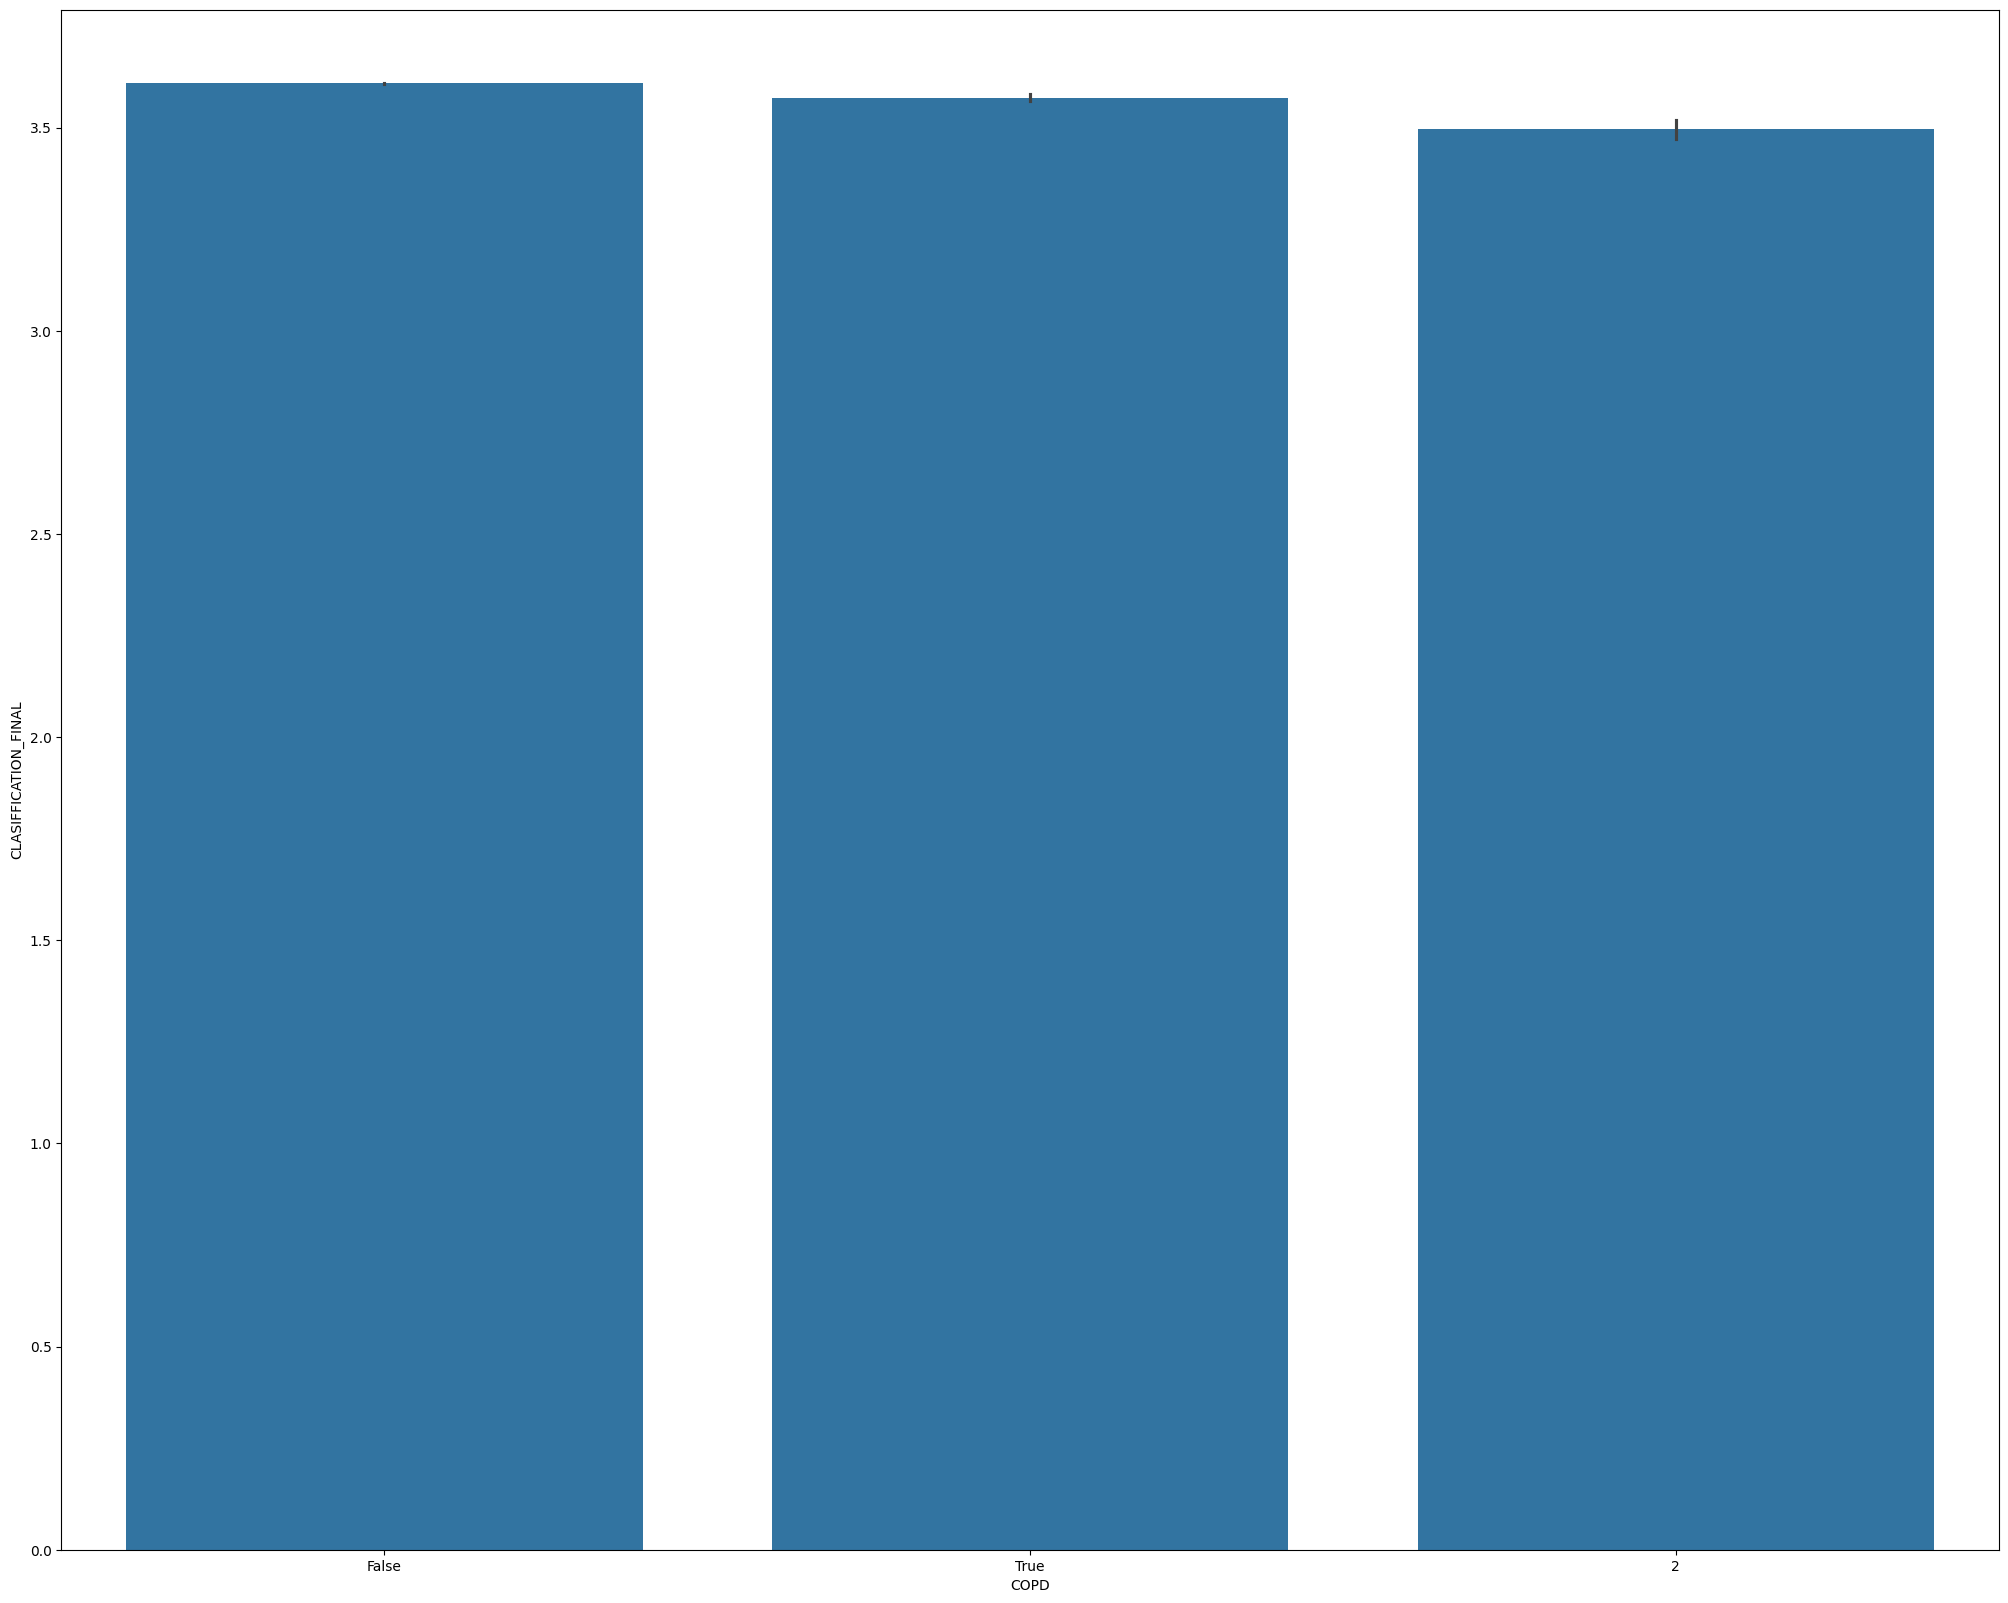

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='COPD',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='ASTHMA', ylabel='CLASIFFICATION_FINAL'>

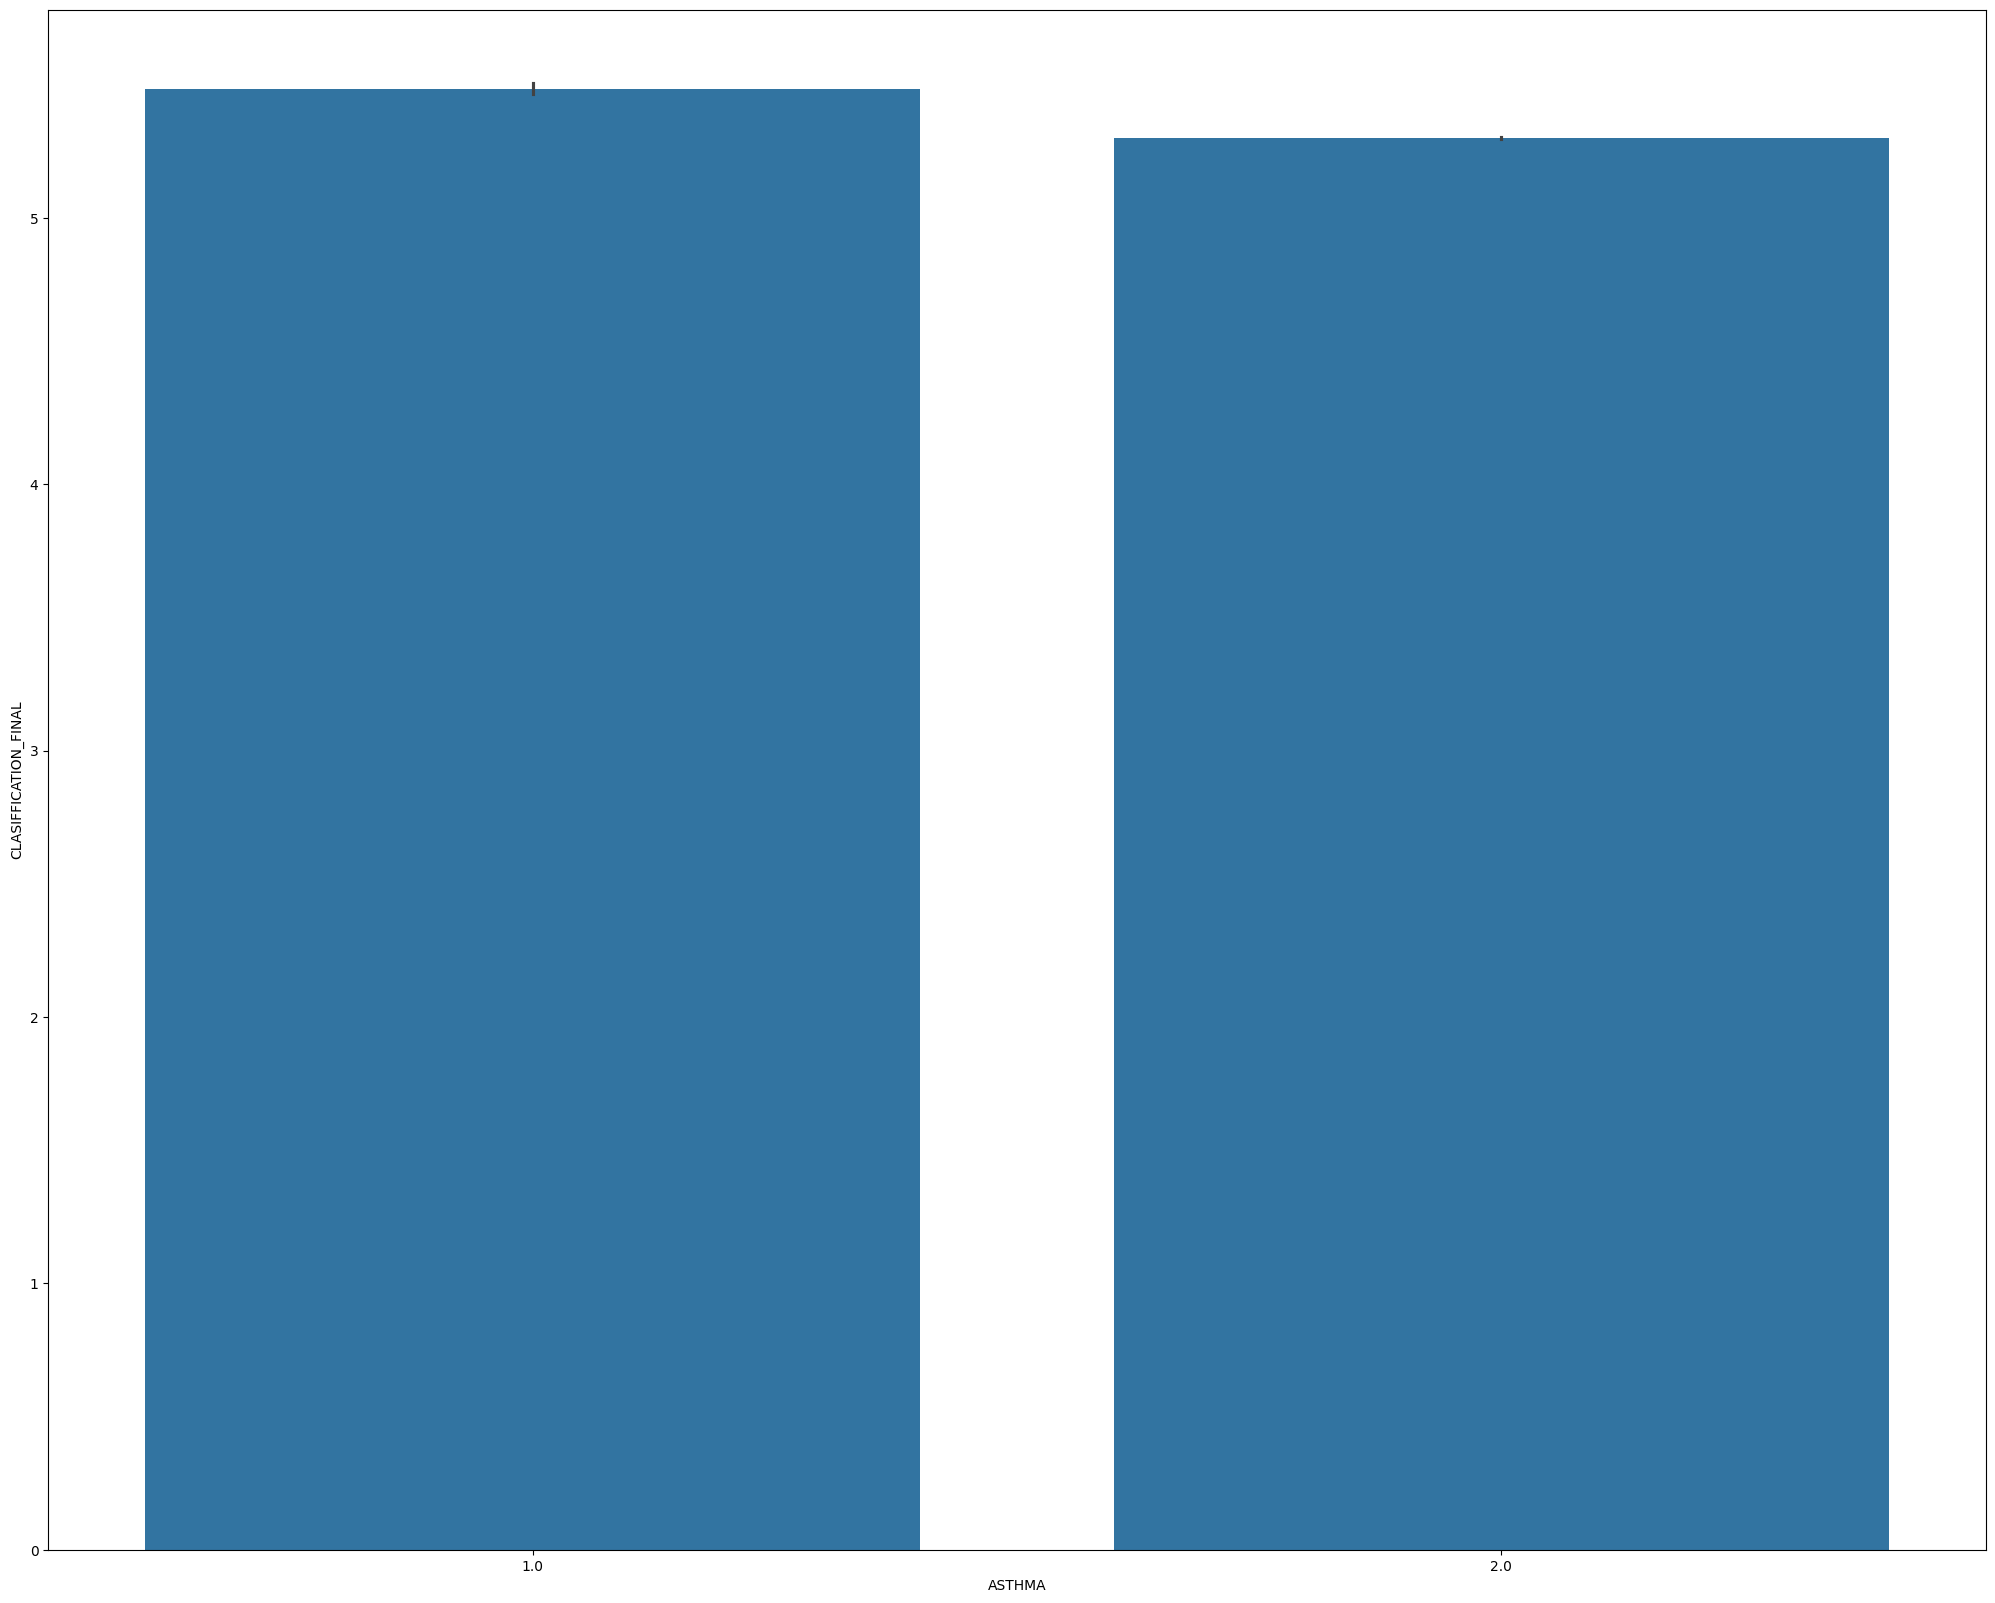

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='ASTHMA',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='INMSUPR', ylabel='CLASIFFICATION_FINAL'>

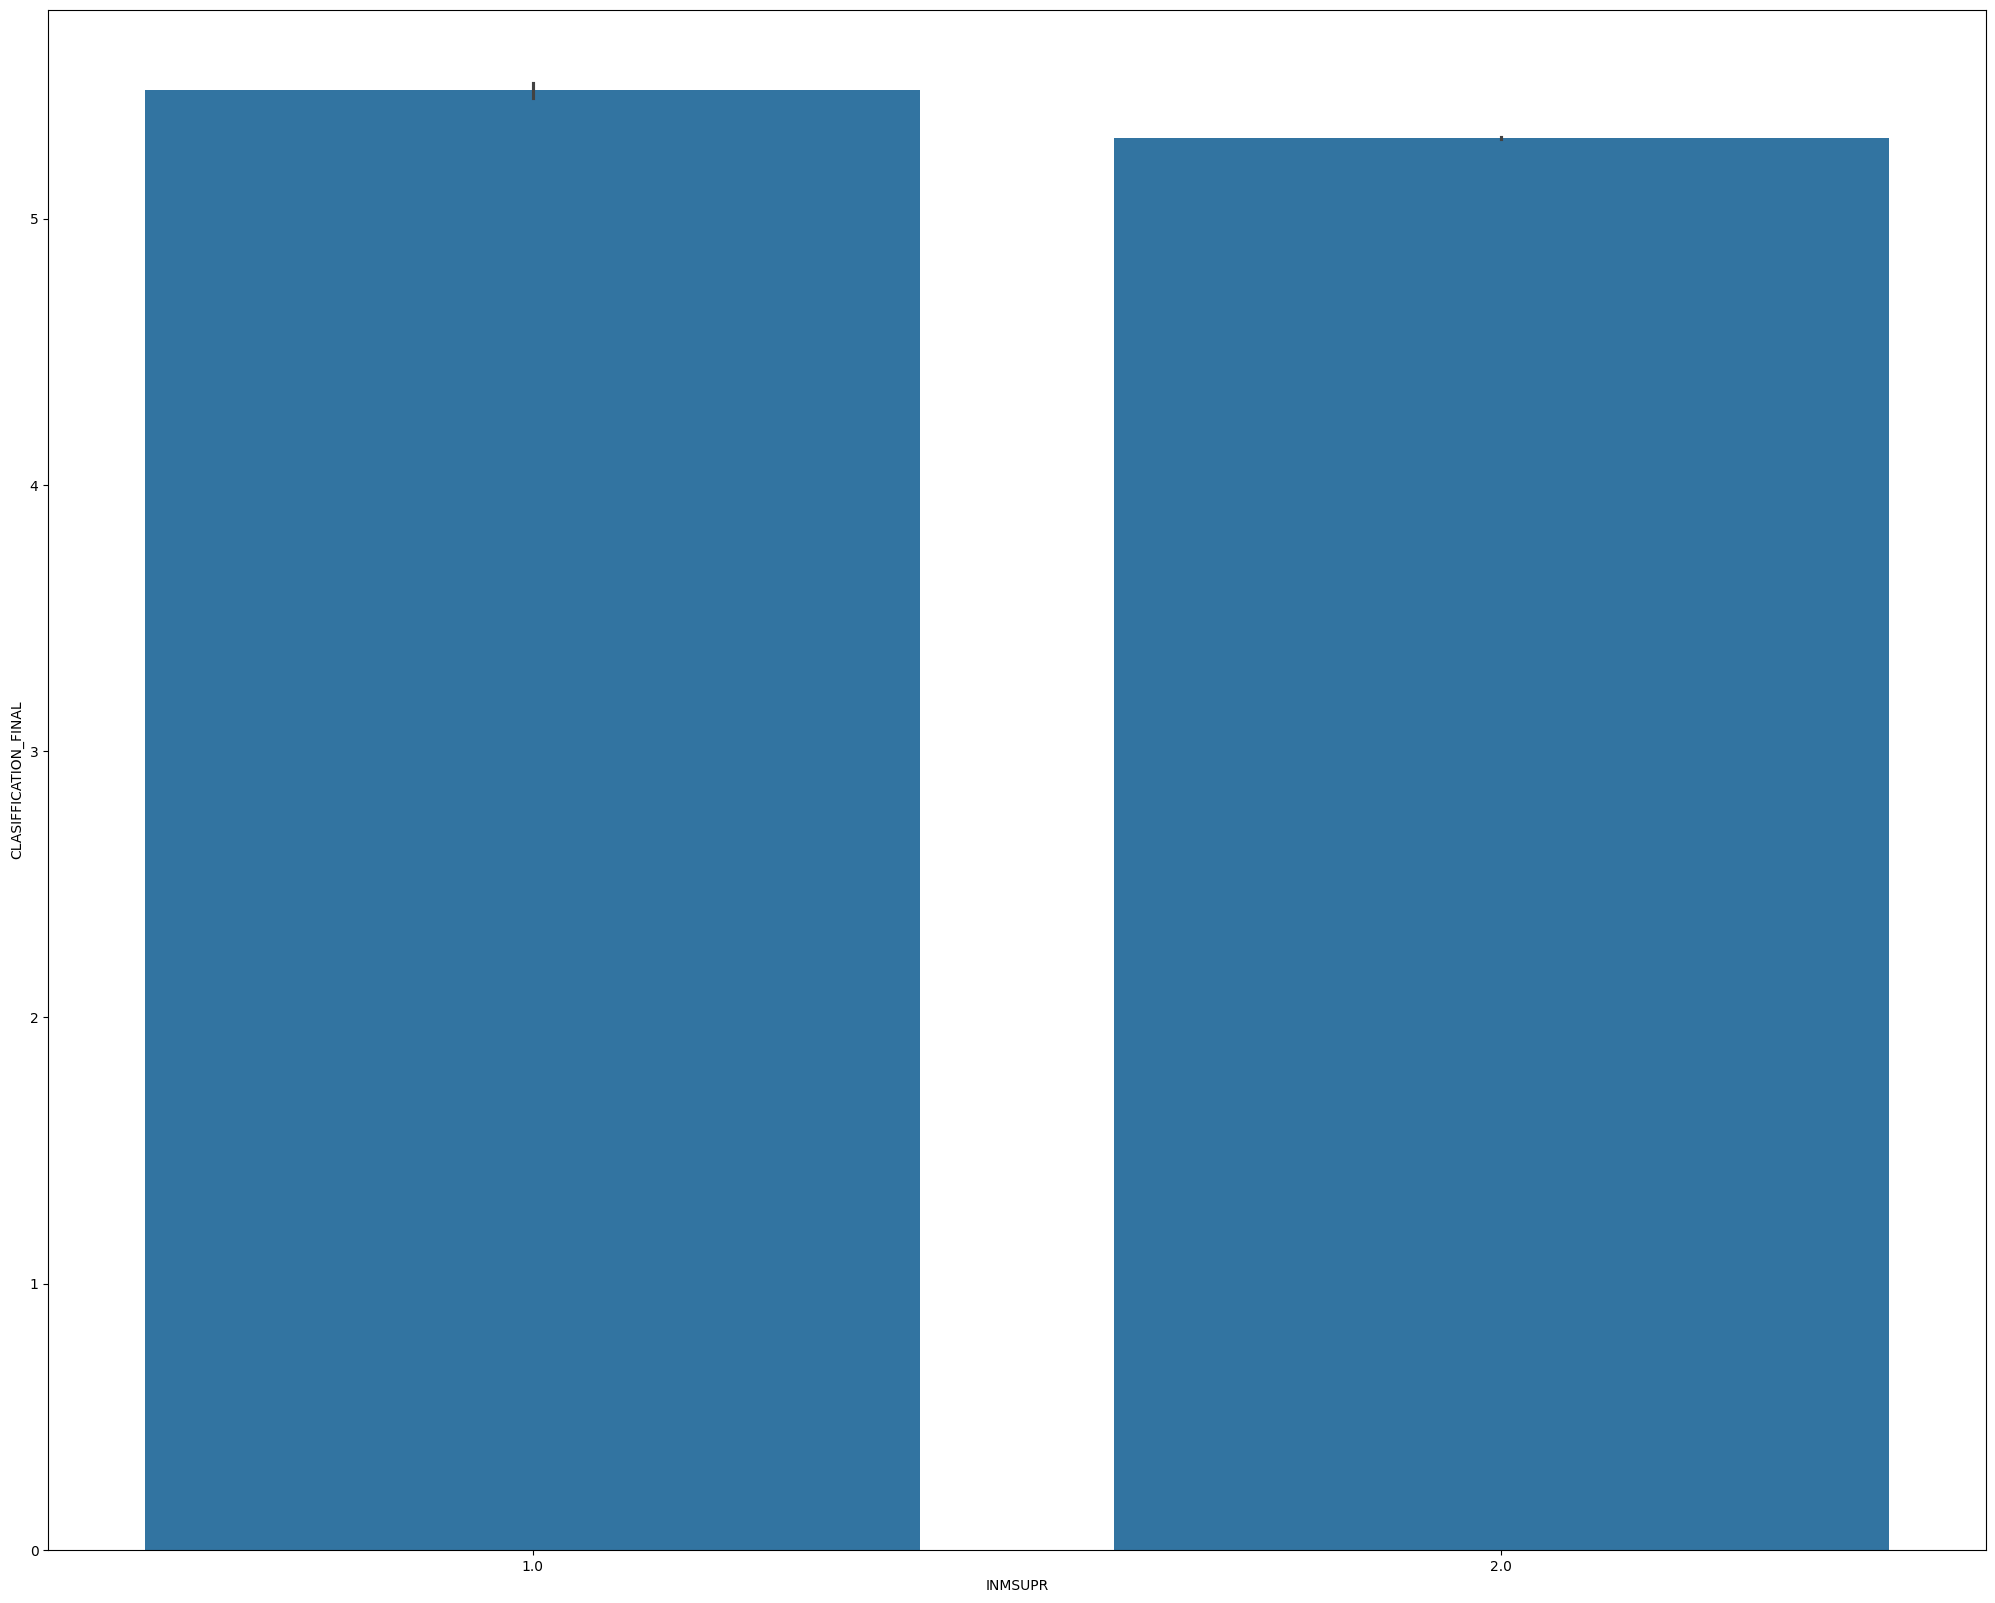

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='INMSUPR',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='HIPERTENSION', ylabel='CLASIFFICATION_FINAL'>

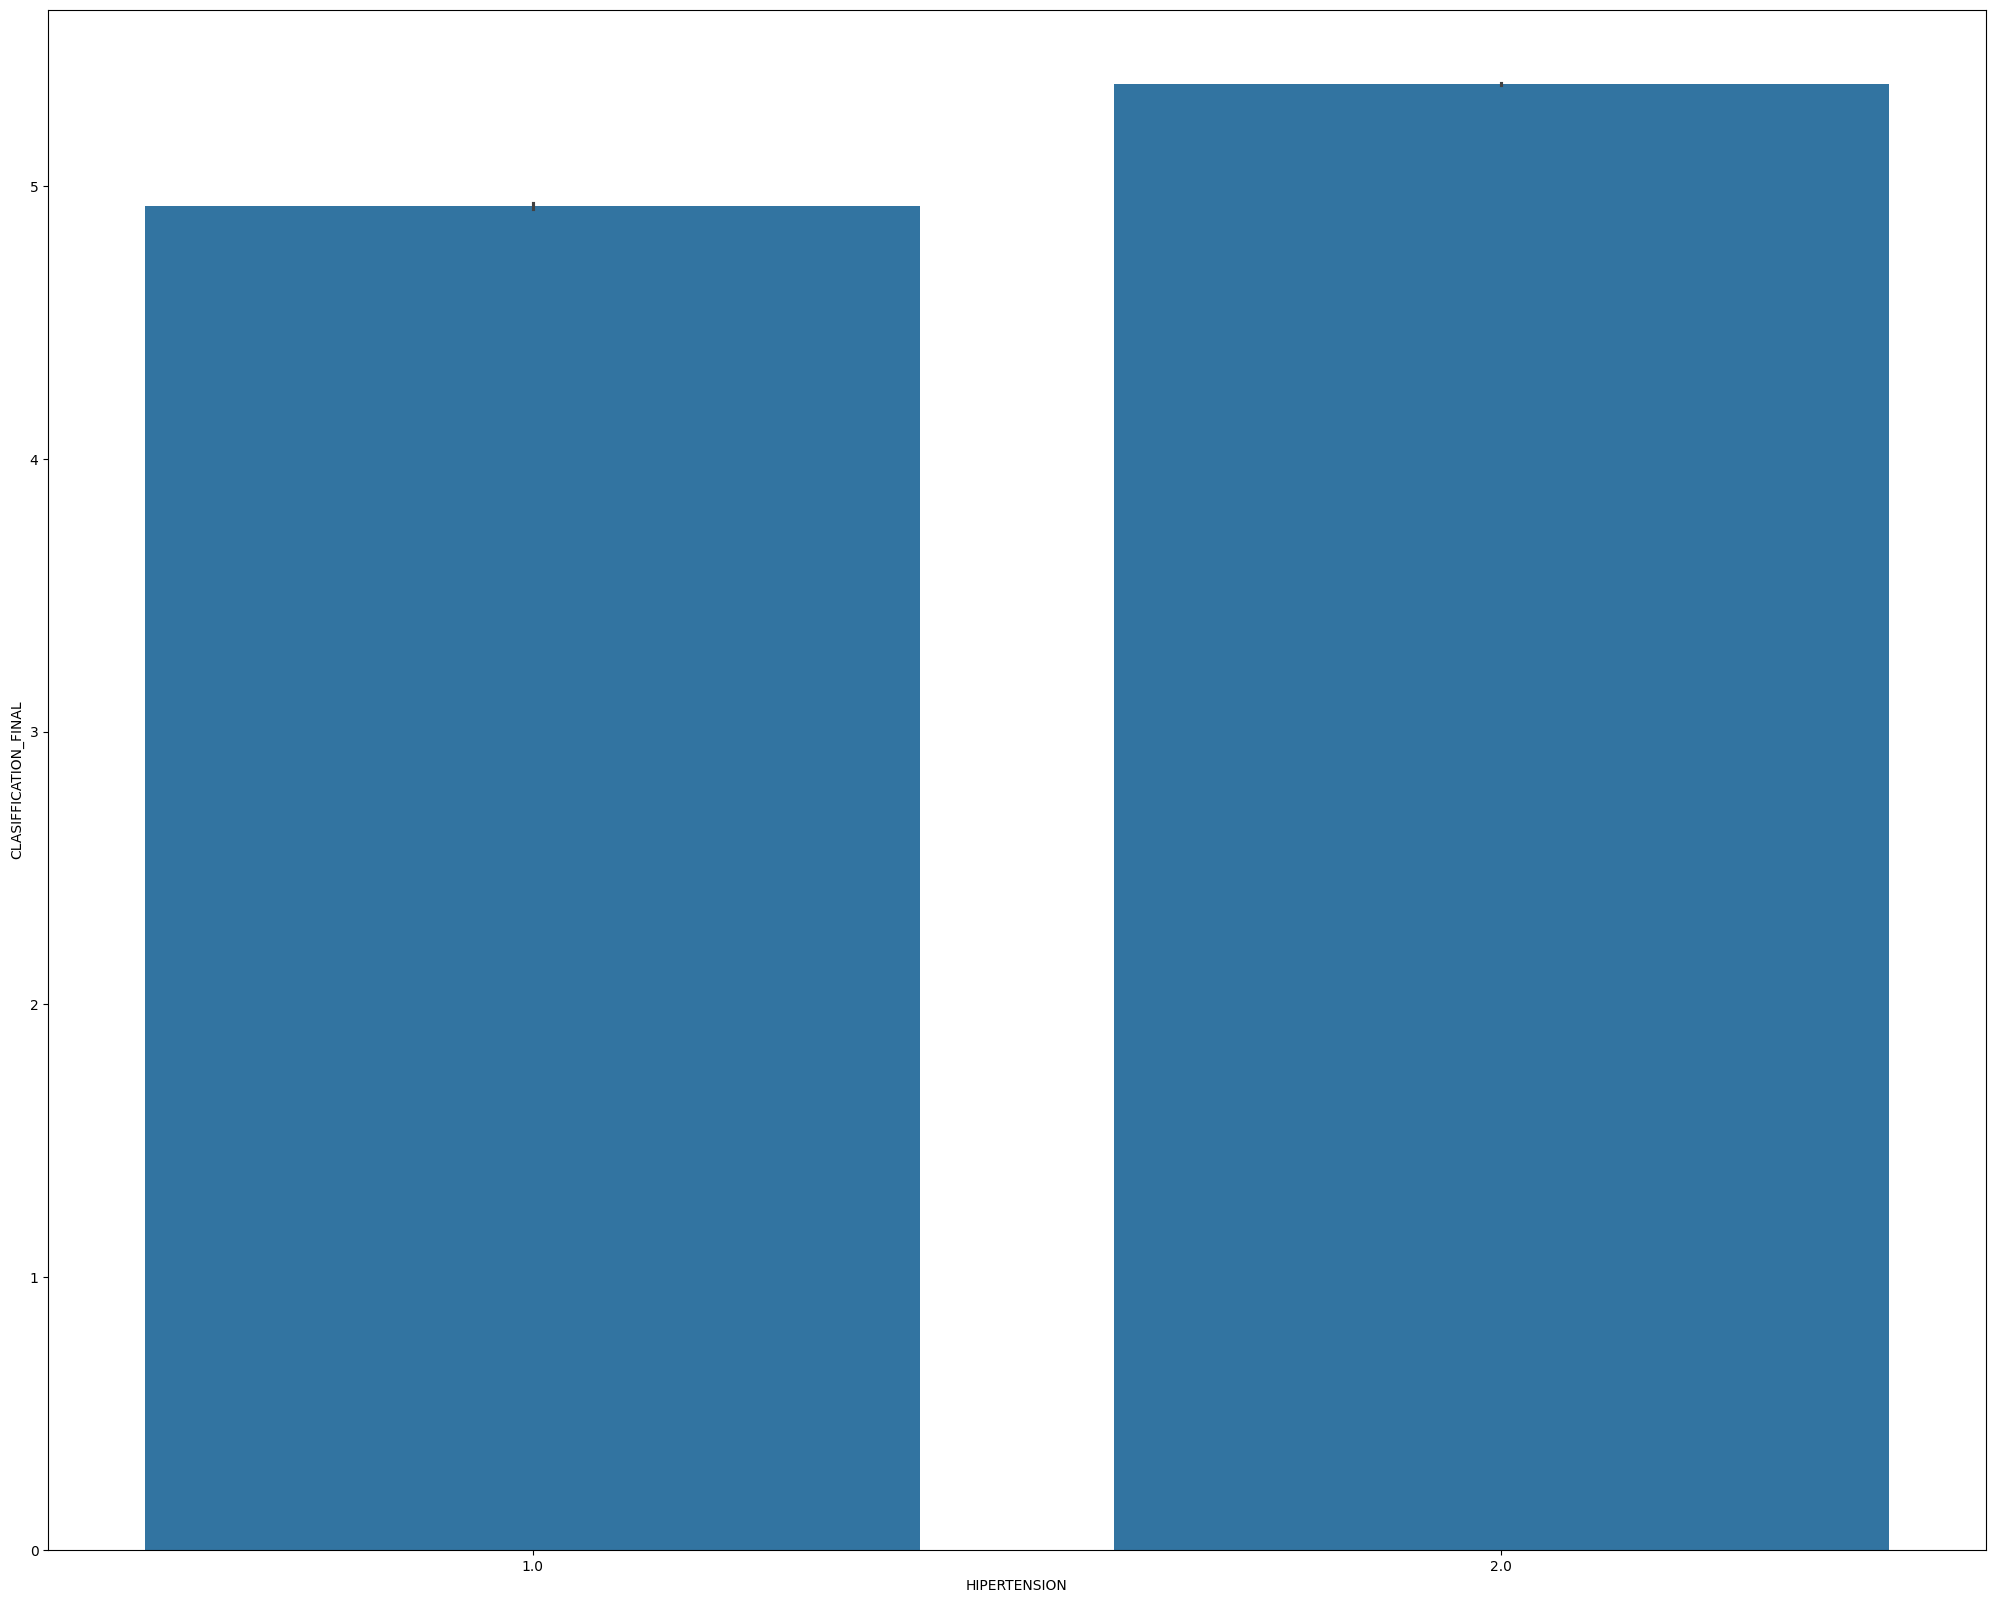

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='HIPERTENSION',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='CARDIOVASCULAR', ylabel='CLASIFFICATION_FINAL'>

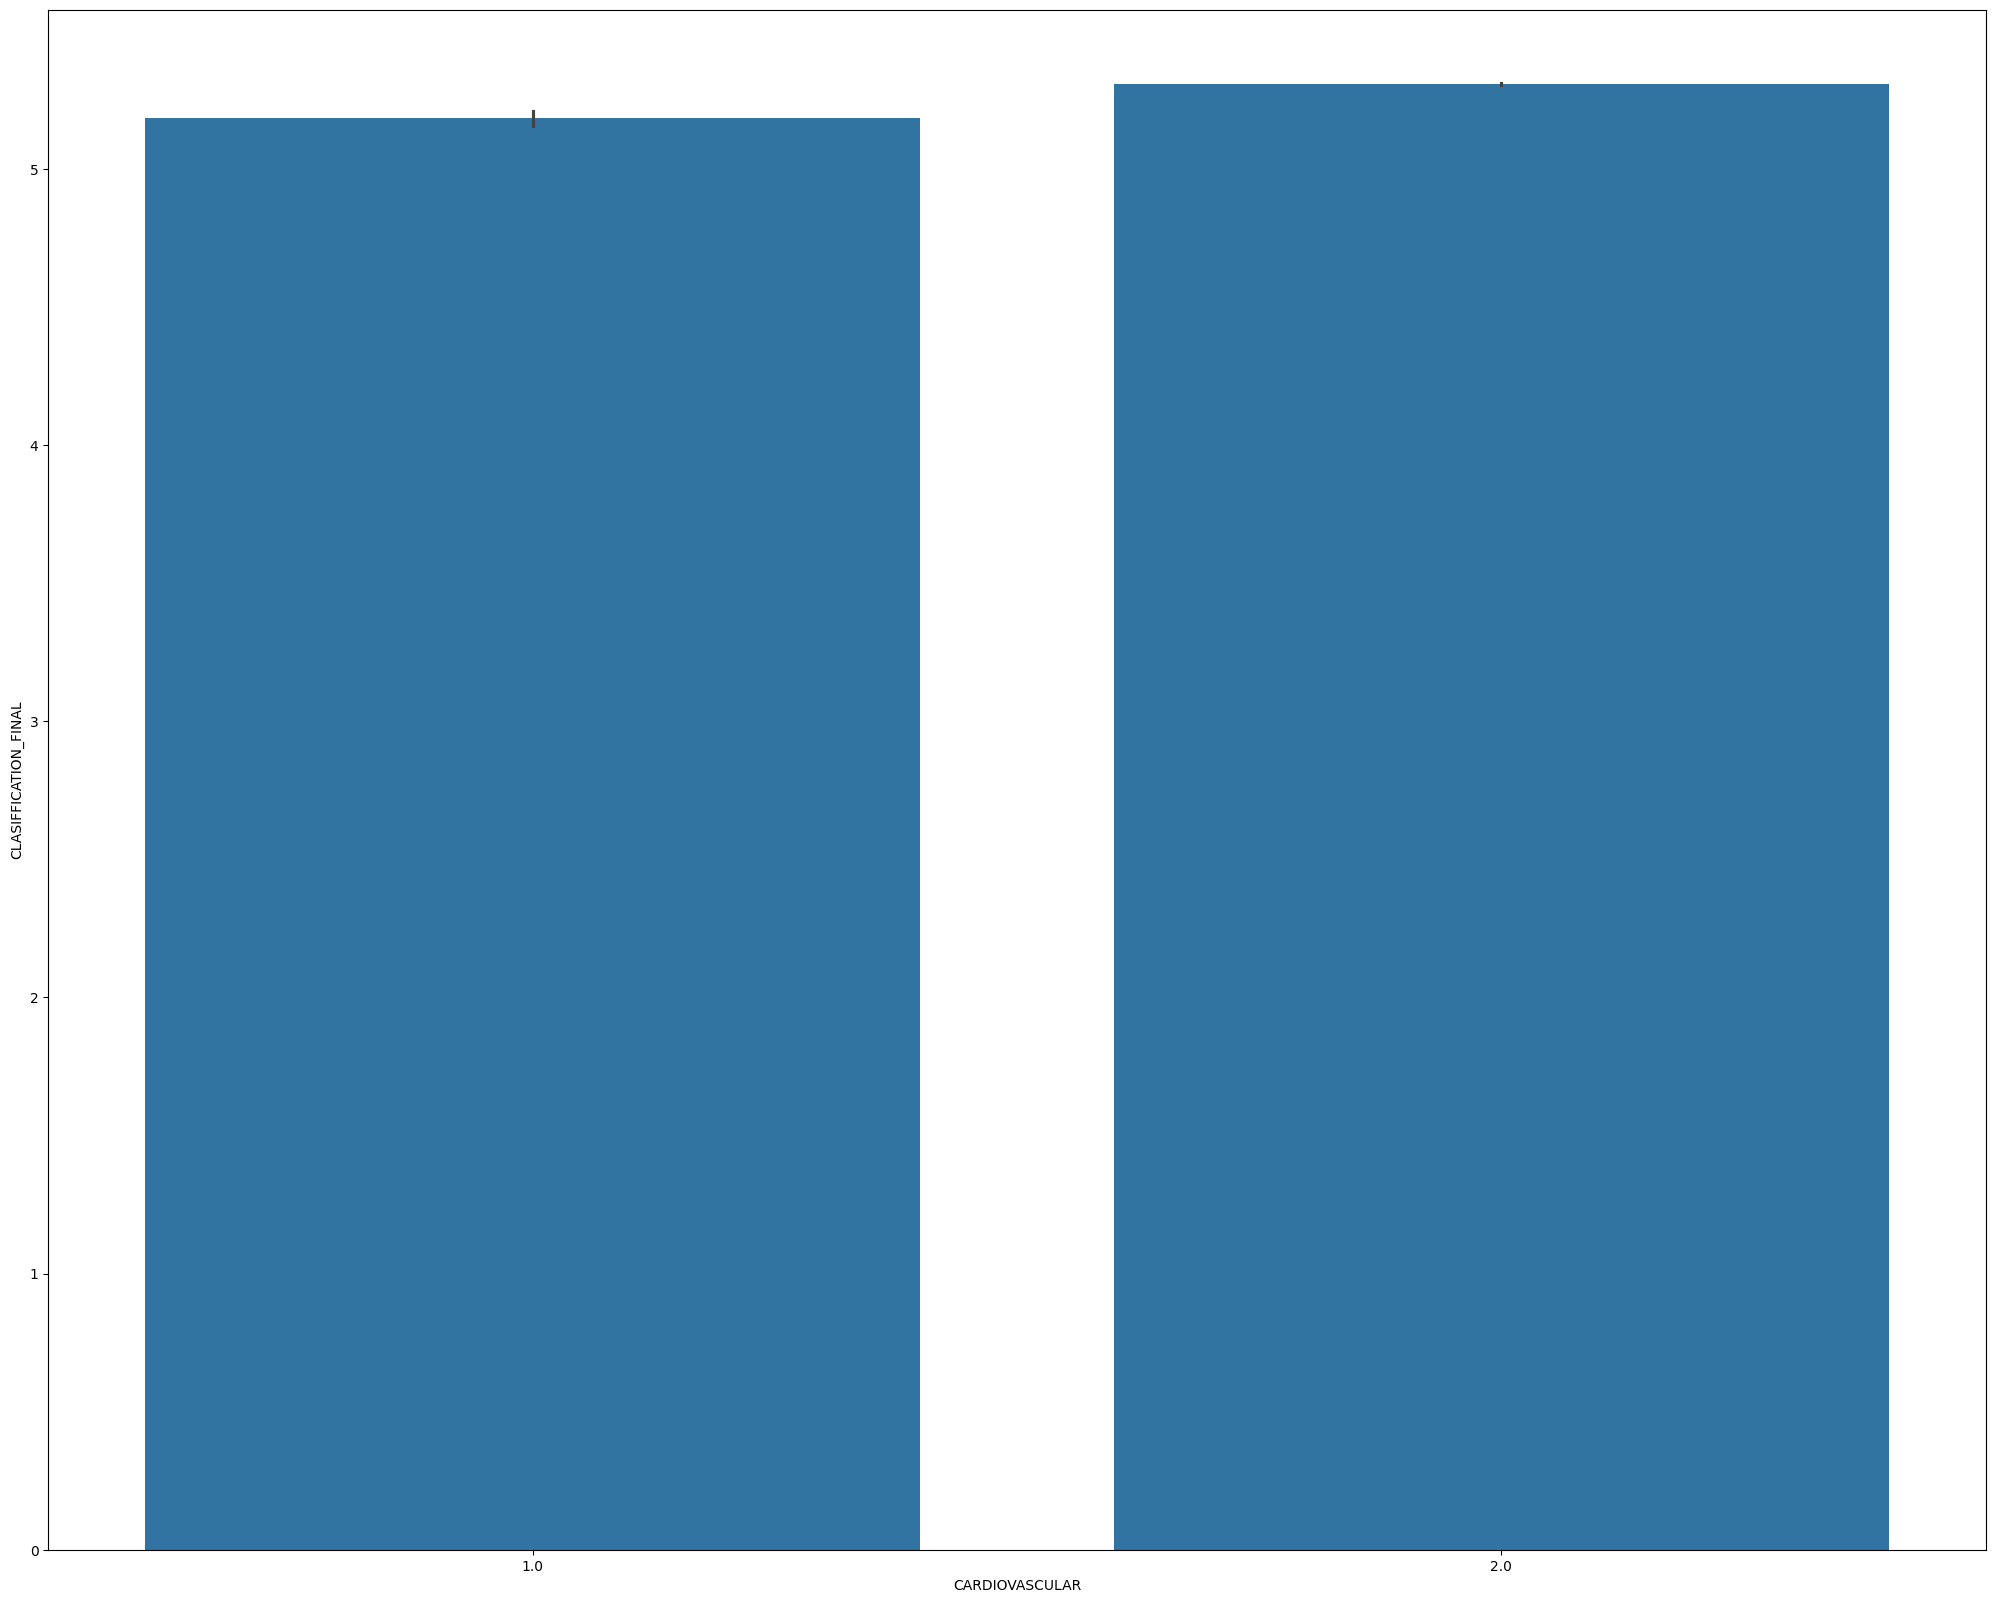

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='CARDIOVASCULAR',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='RENAL_CHRONIC', ylabel='CLASIFFICATION_FINAL'>

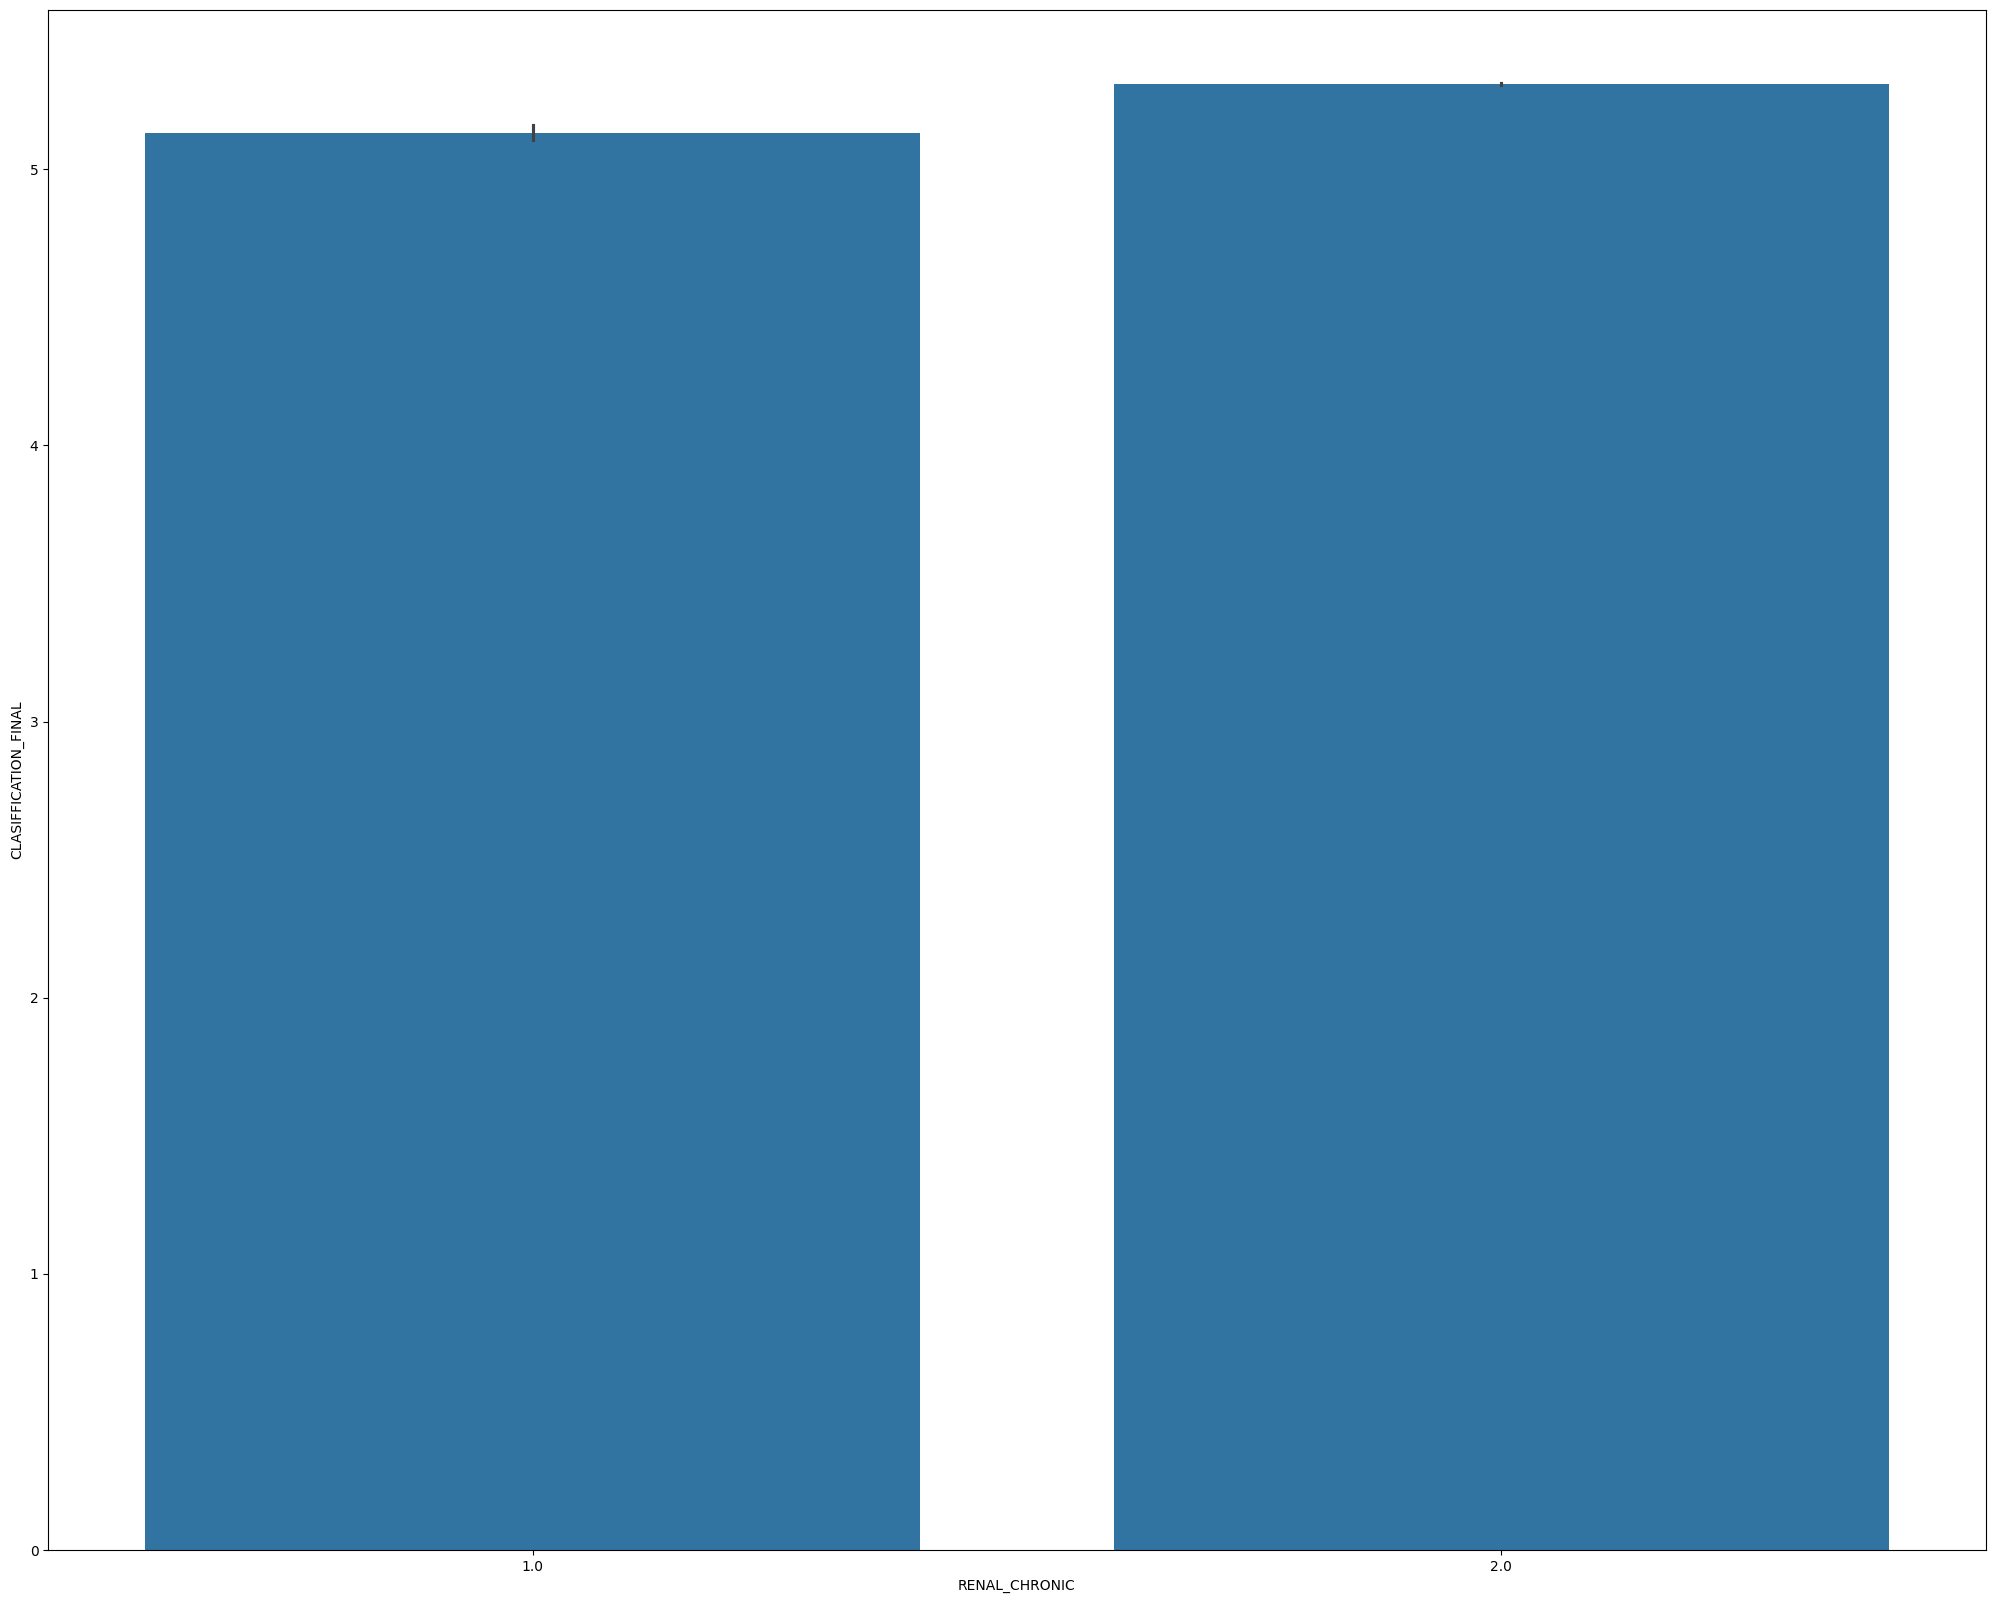

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='RENAL_CHRONIC',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='OTHER_DISEASE', ylabel='CLASIFFICATION_FINAL'>

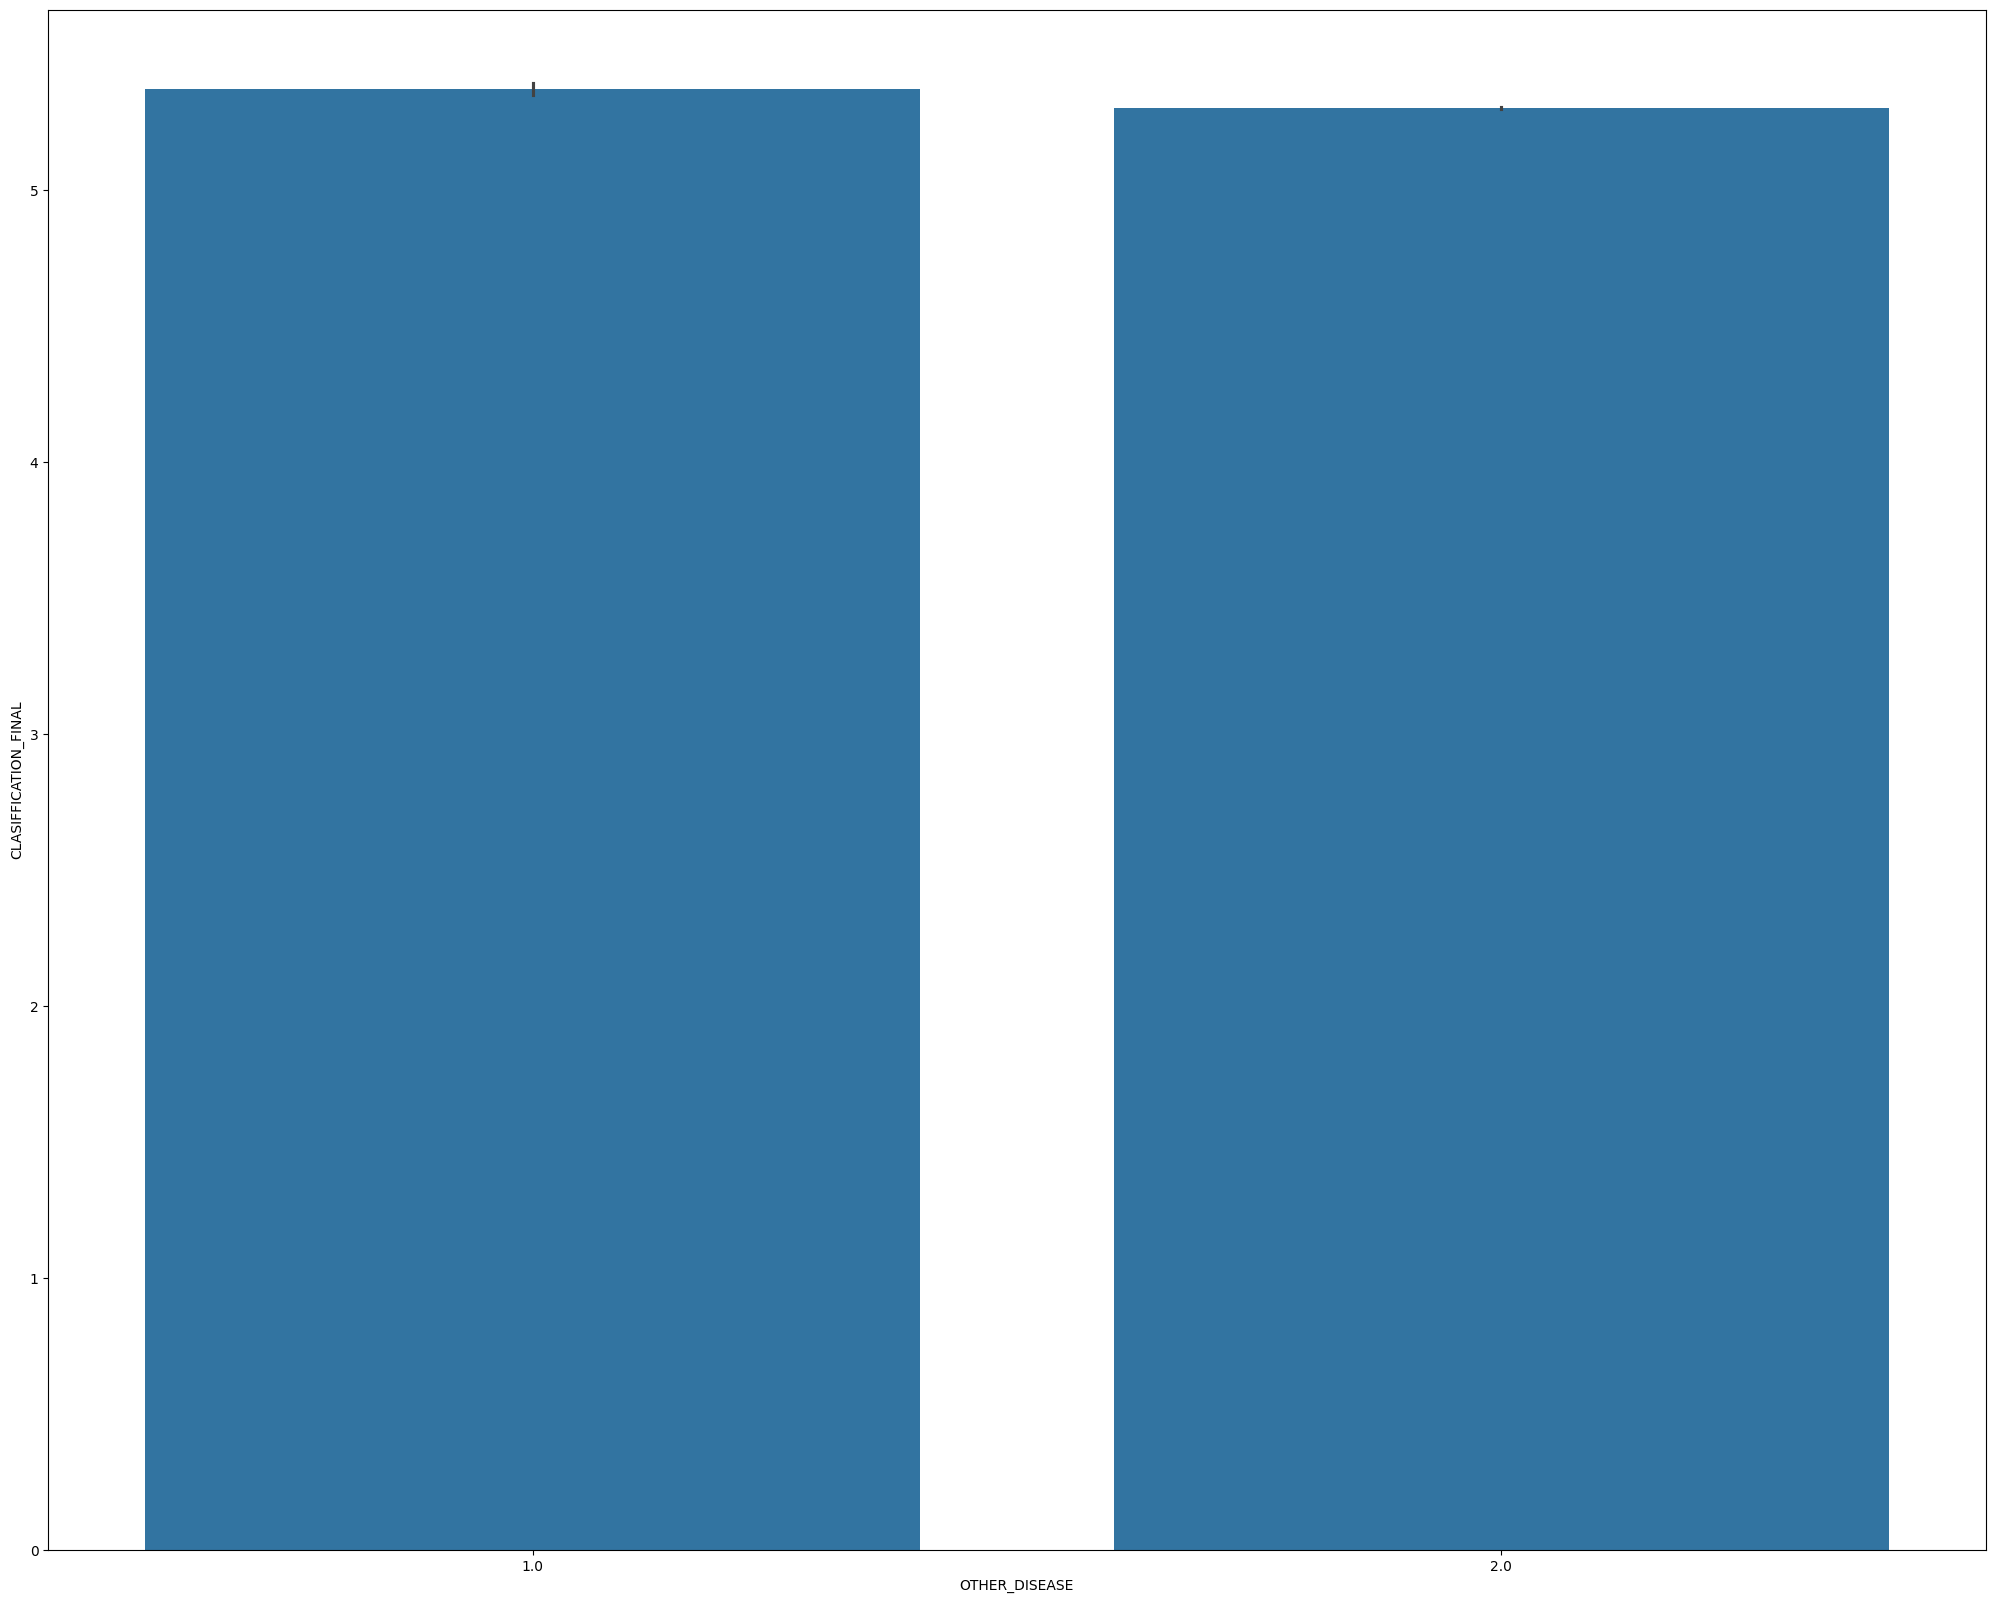

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='OTHER_DISEASE',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='OBESITY', ylabel='CLASIFFICATION_FINAL'>

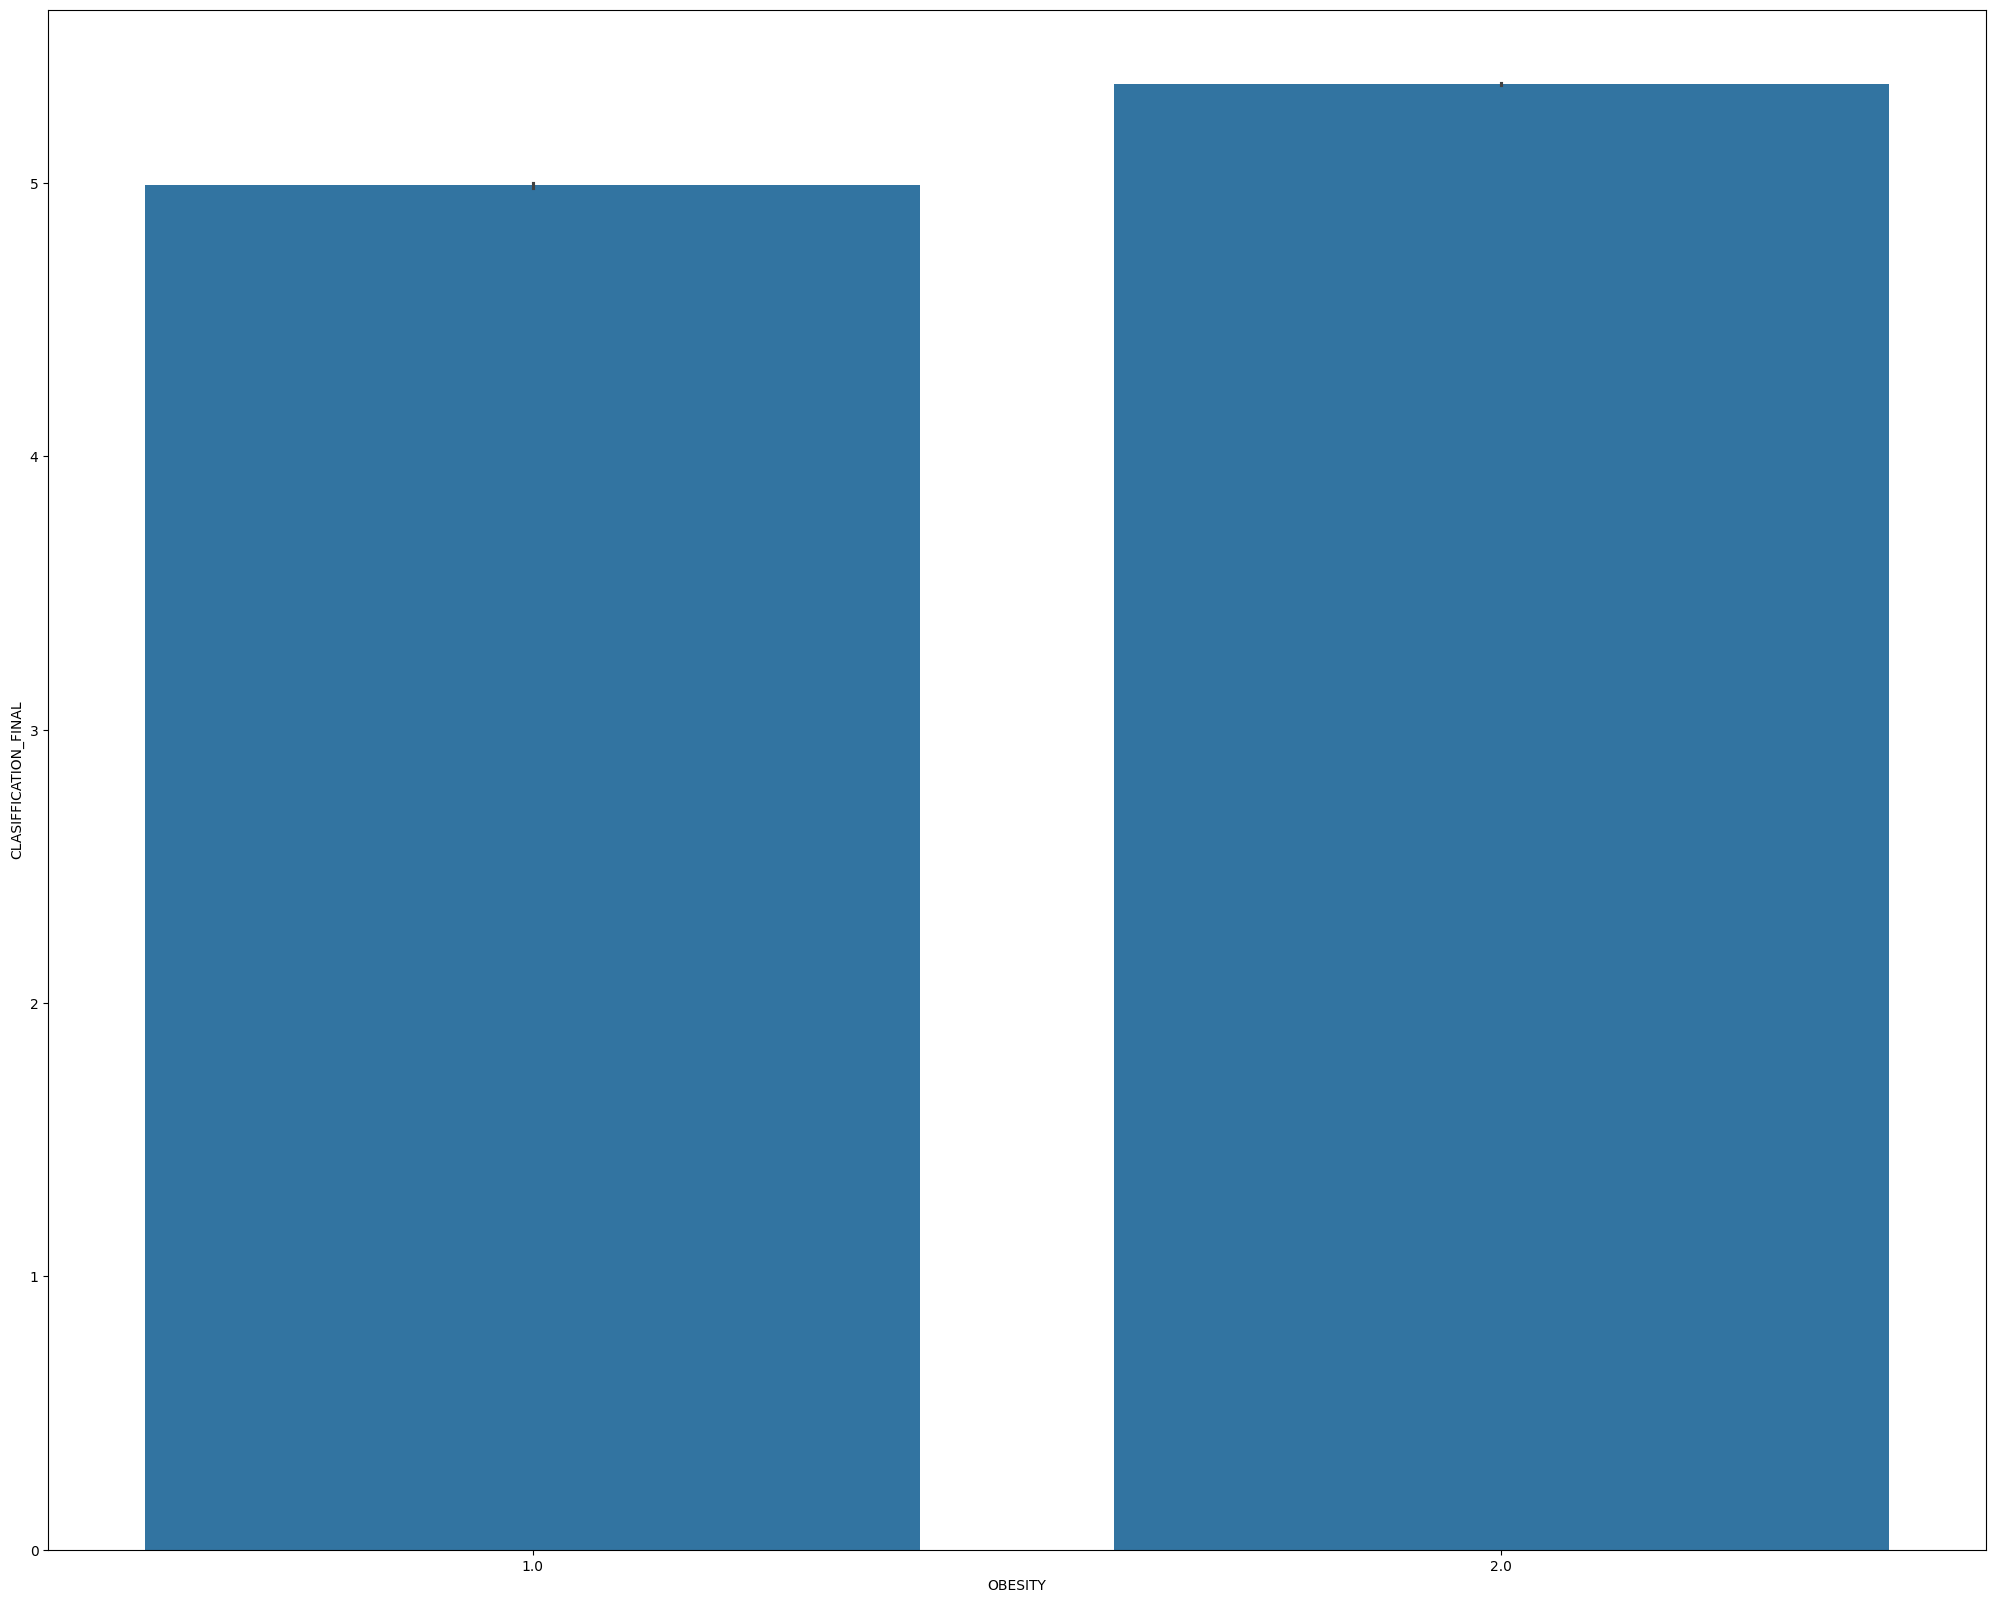

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='OBESITY',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='TOBACCO', ylabel='CLASIFFICATION_FINAL'>

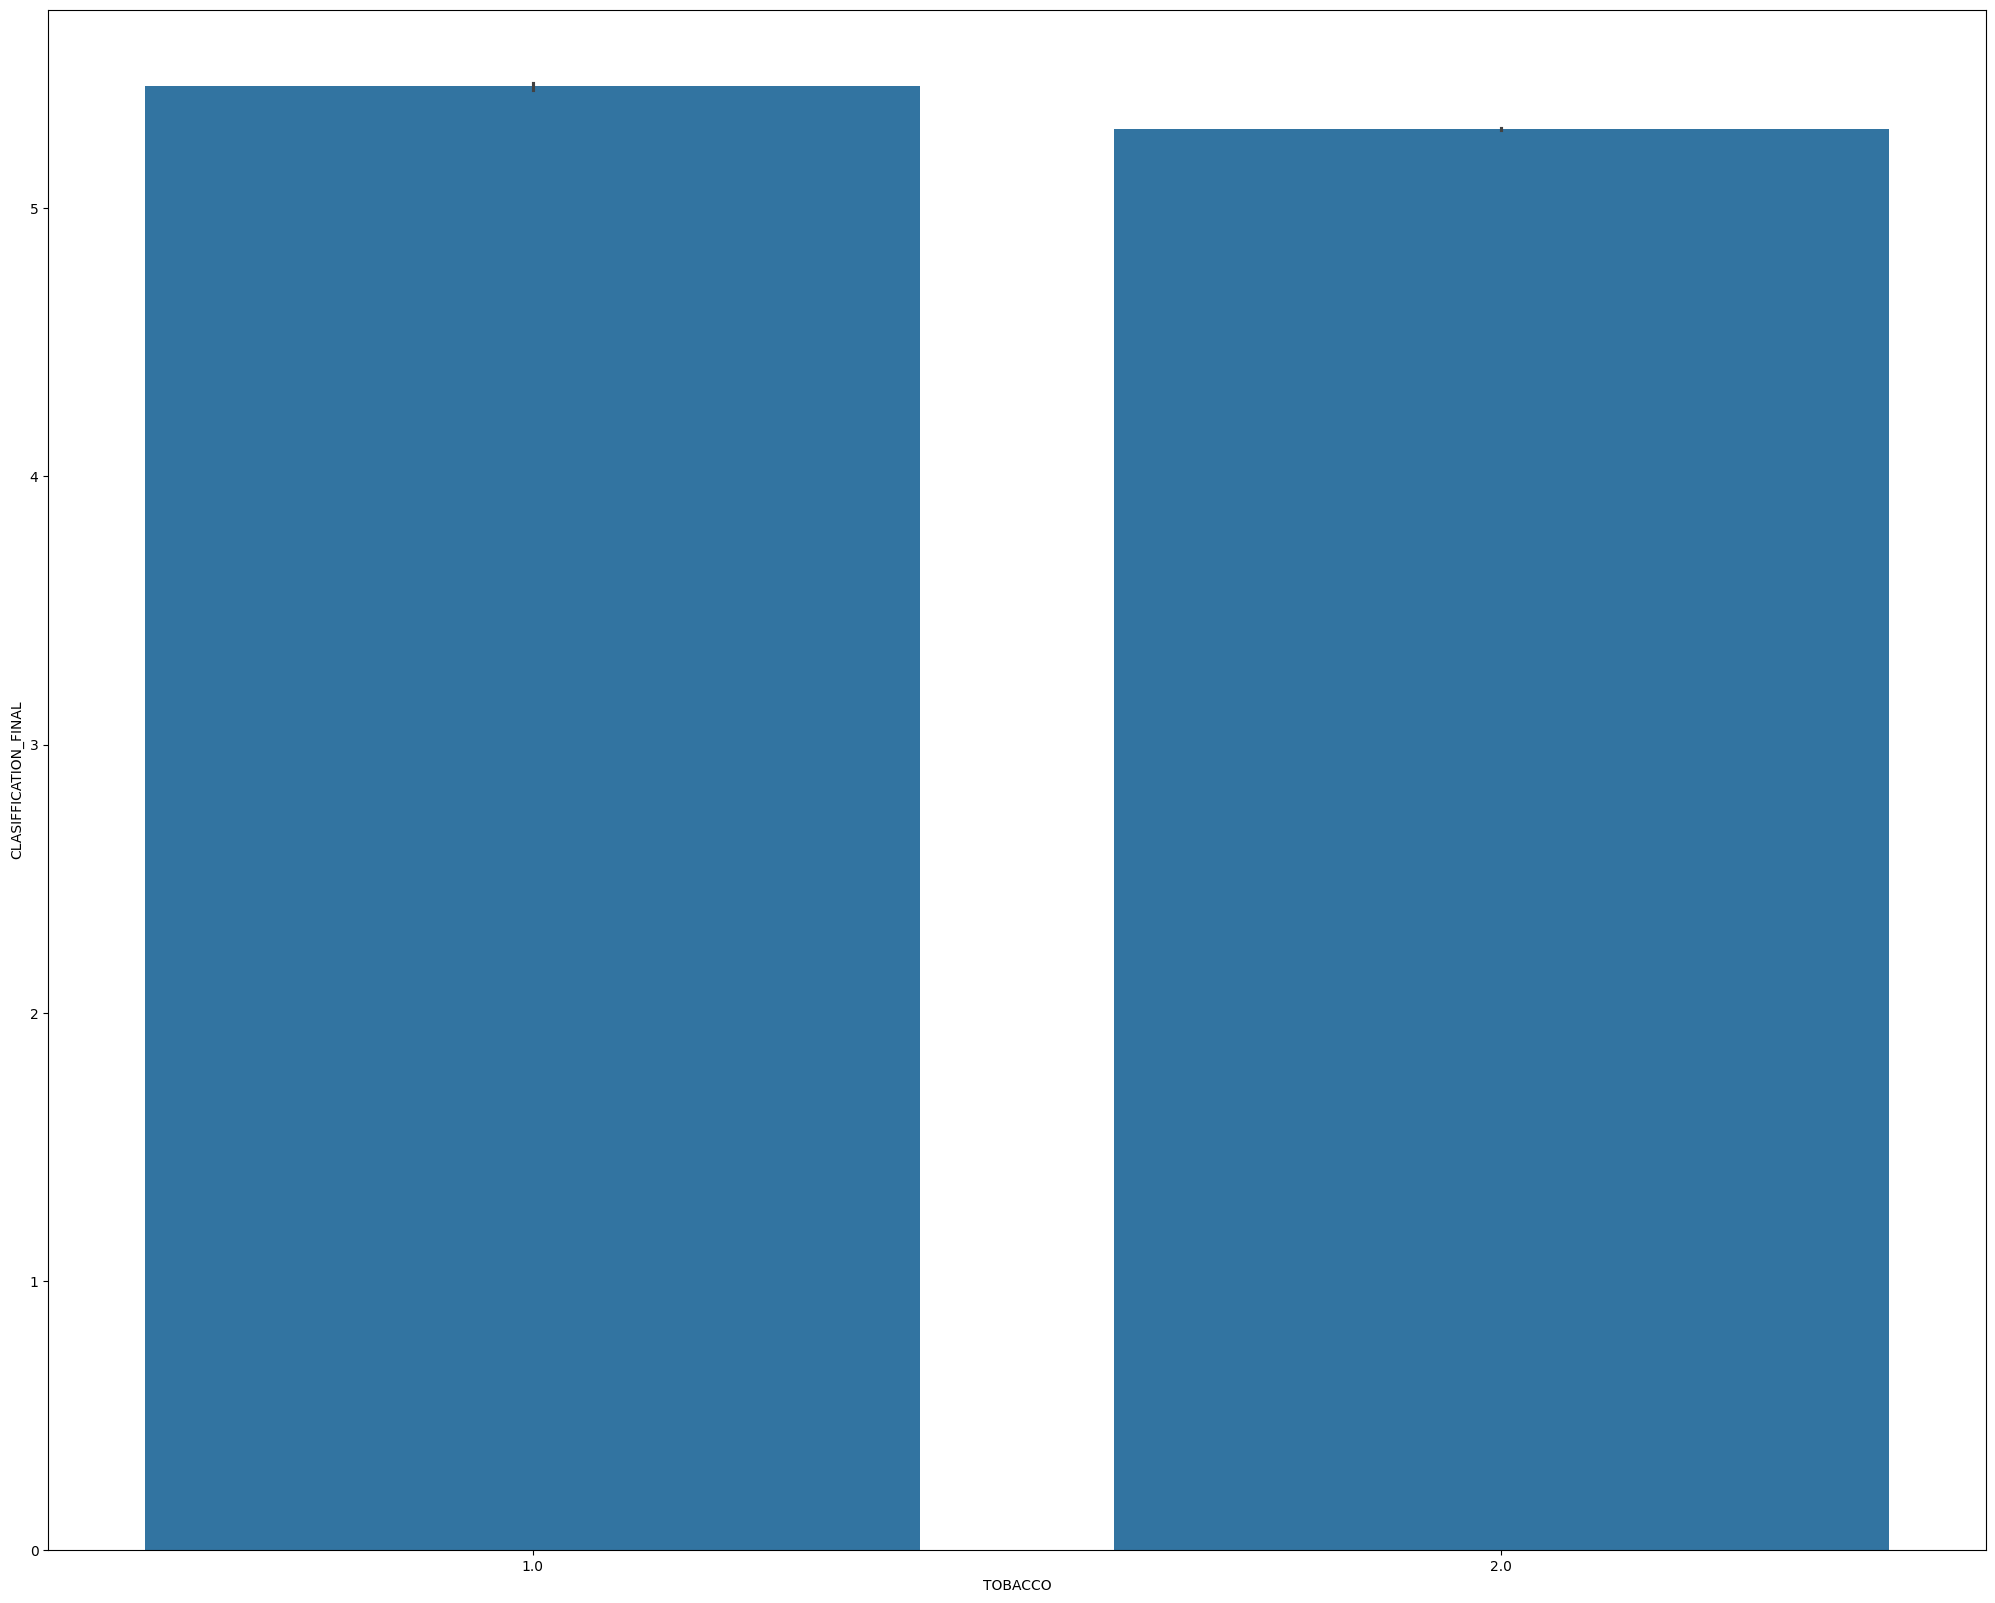

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='TOBACCO',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='USMER', ylabel='CLASIFFICATION_FINAL'>

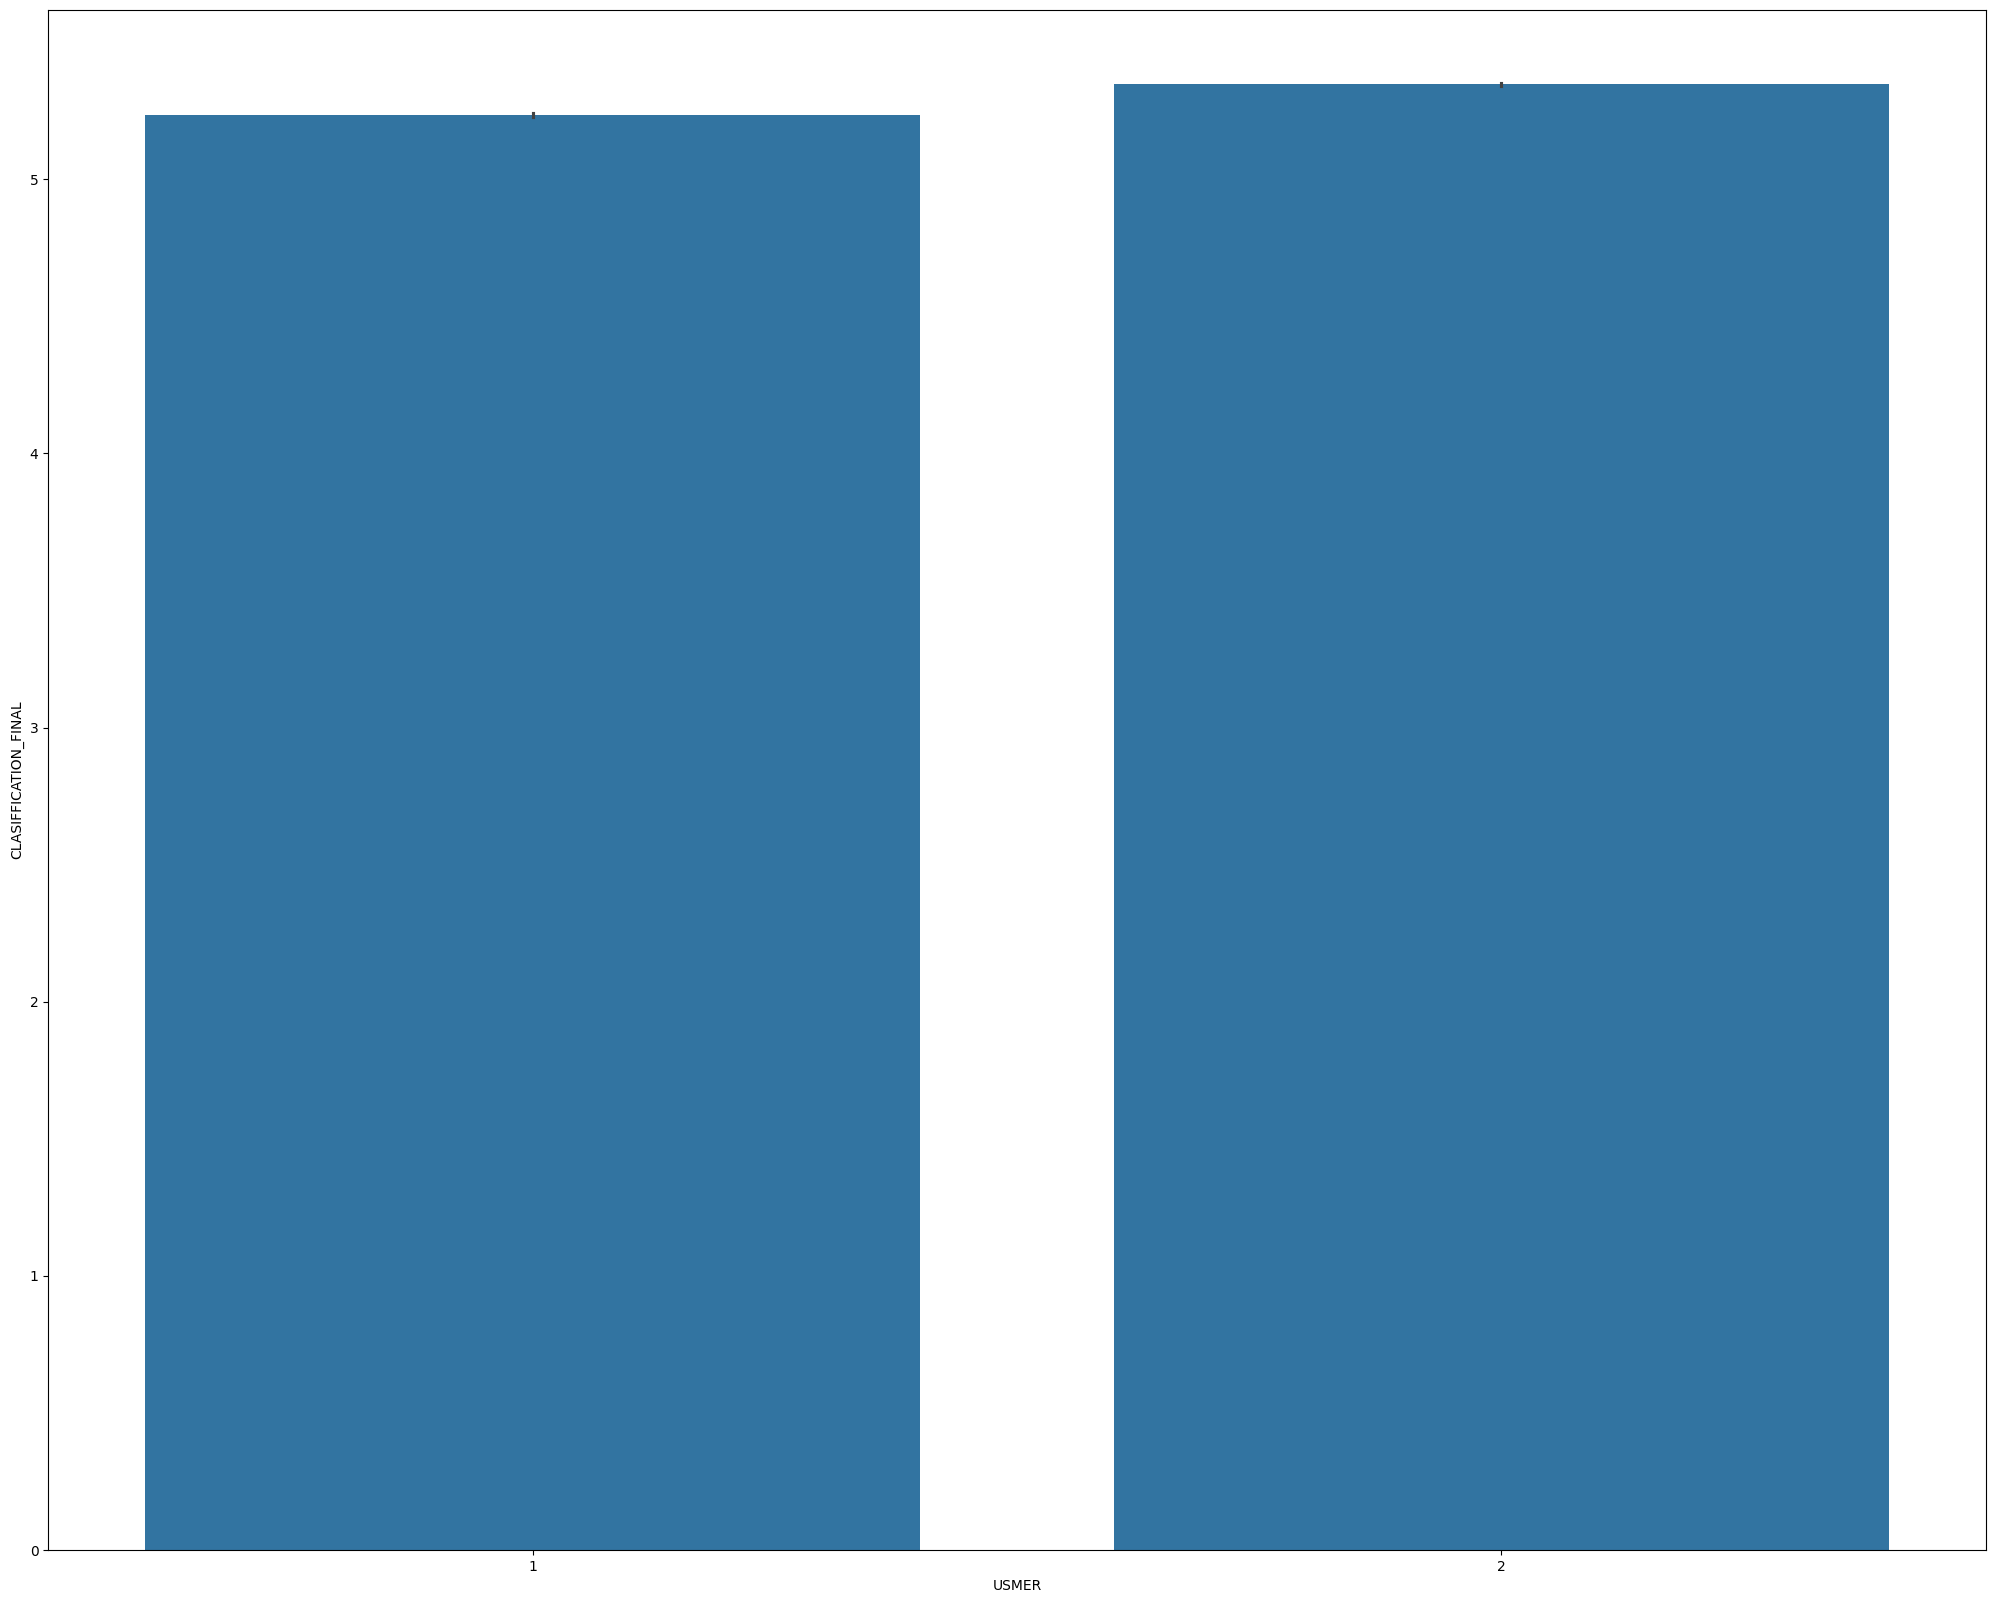

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='USMER',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='INTUBED', ylabel='CLASIFFICATION_FINAL'>

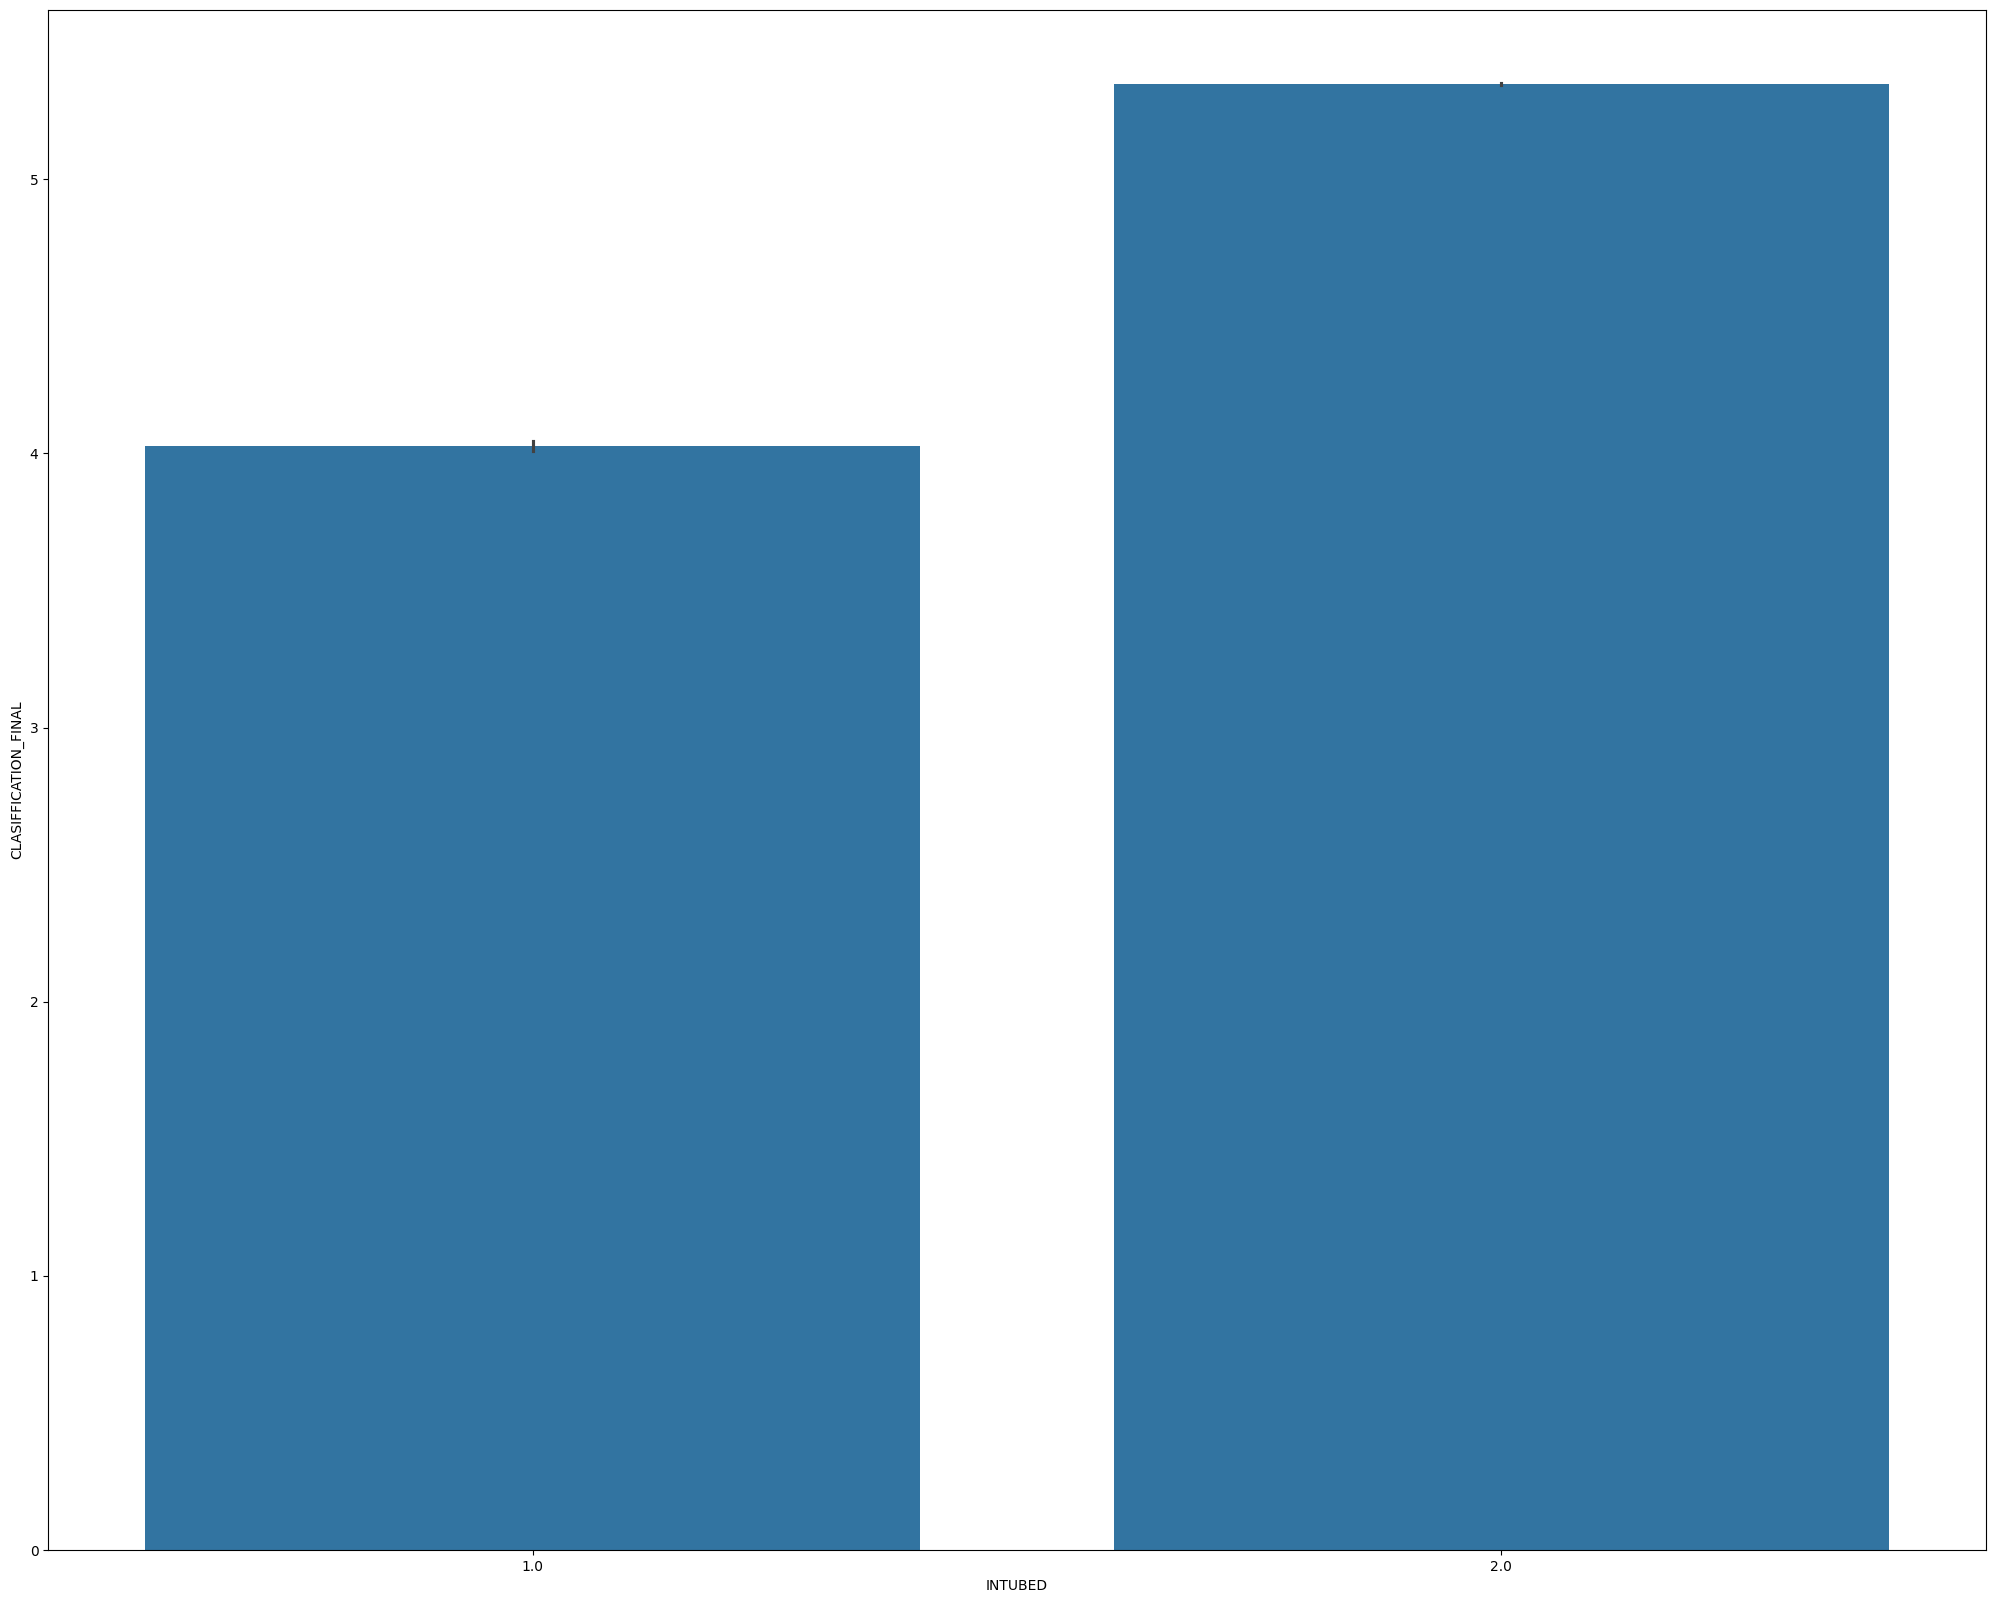

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='INTUBED',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='ICU', ylabel='CLASIFFICATION_FINAL'>

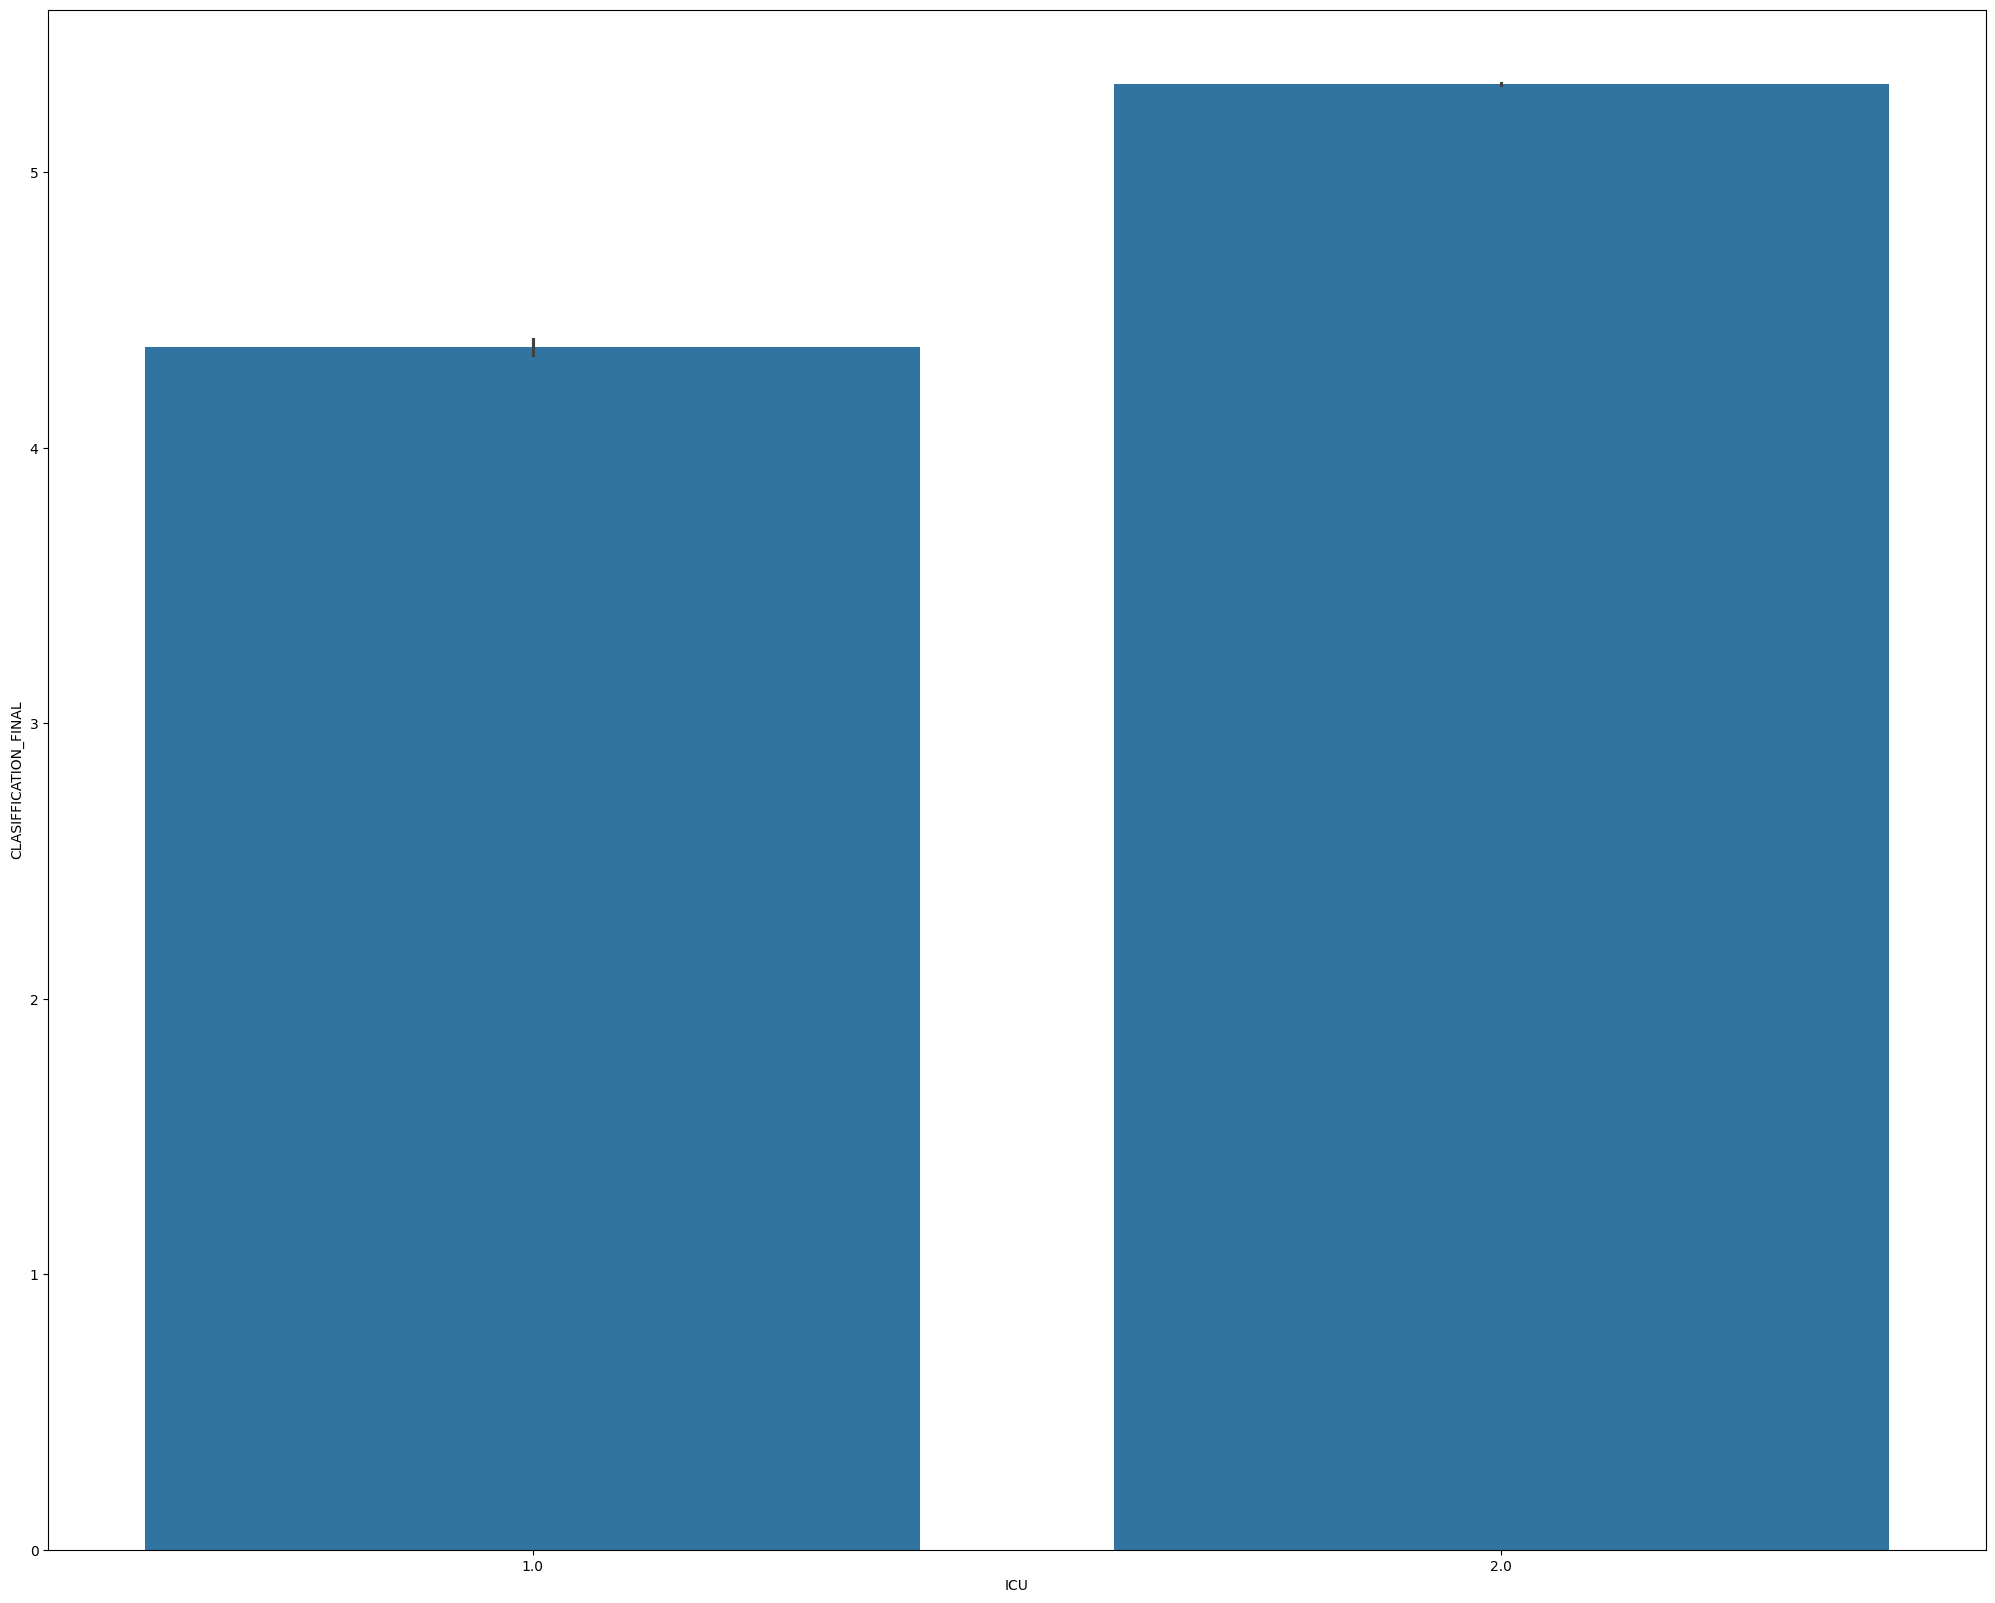

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='ICU',y='CLASIFFICATION_FINAL',data=data,)

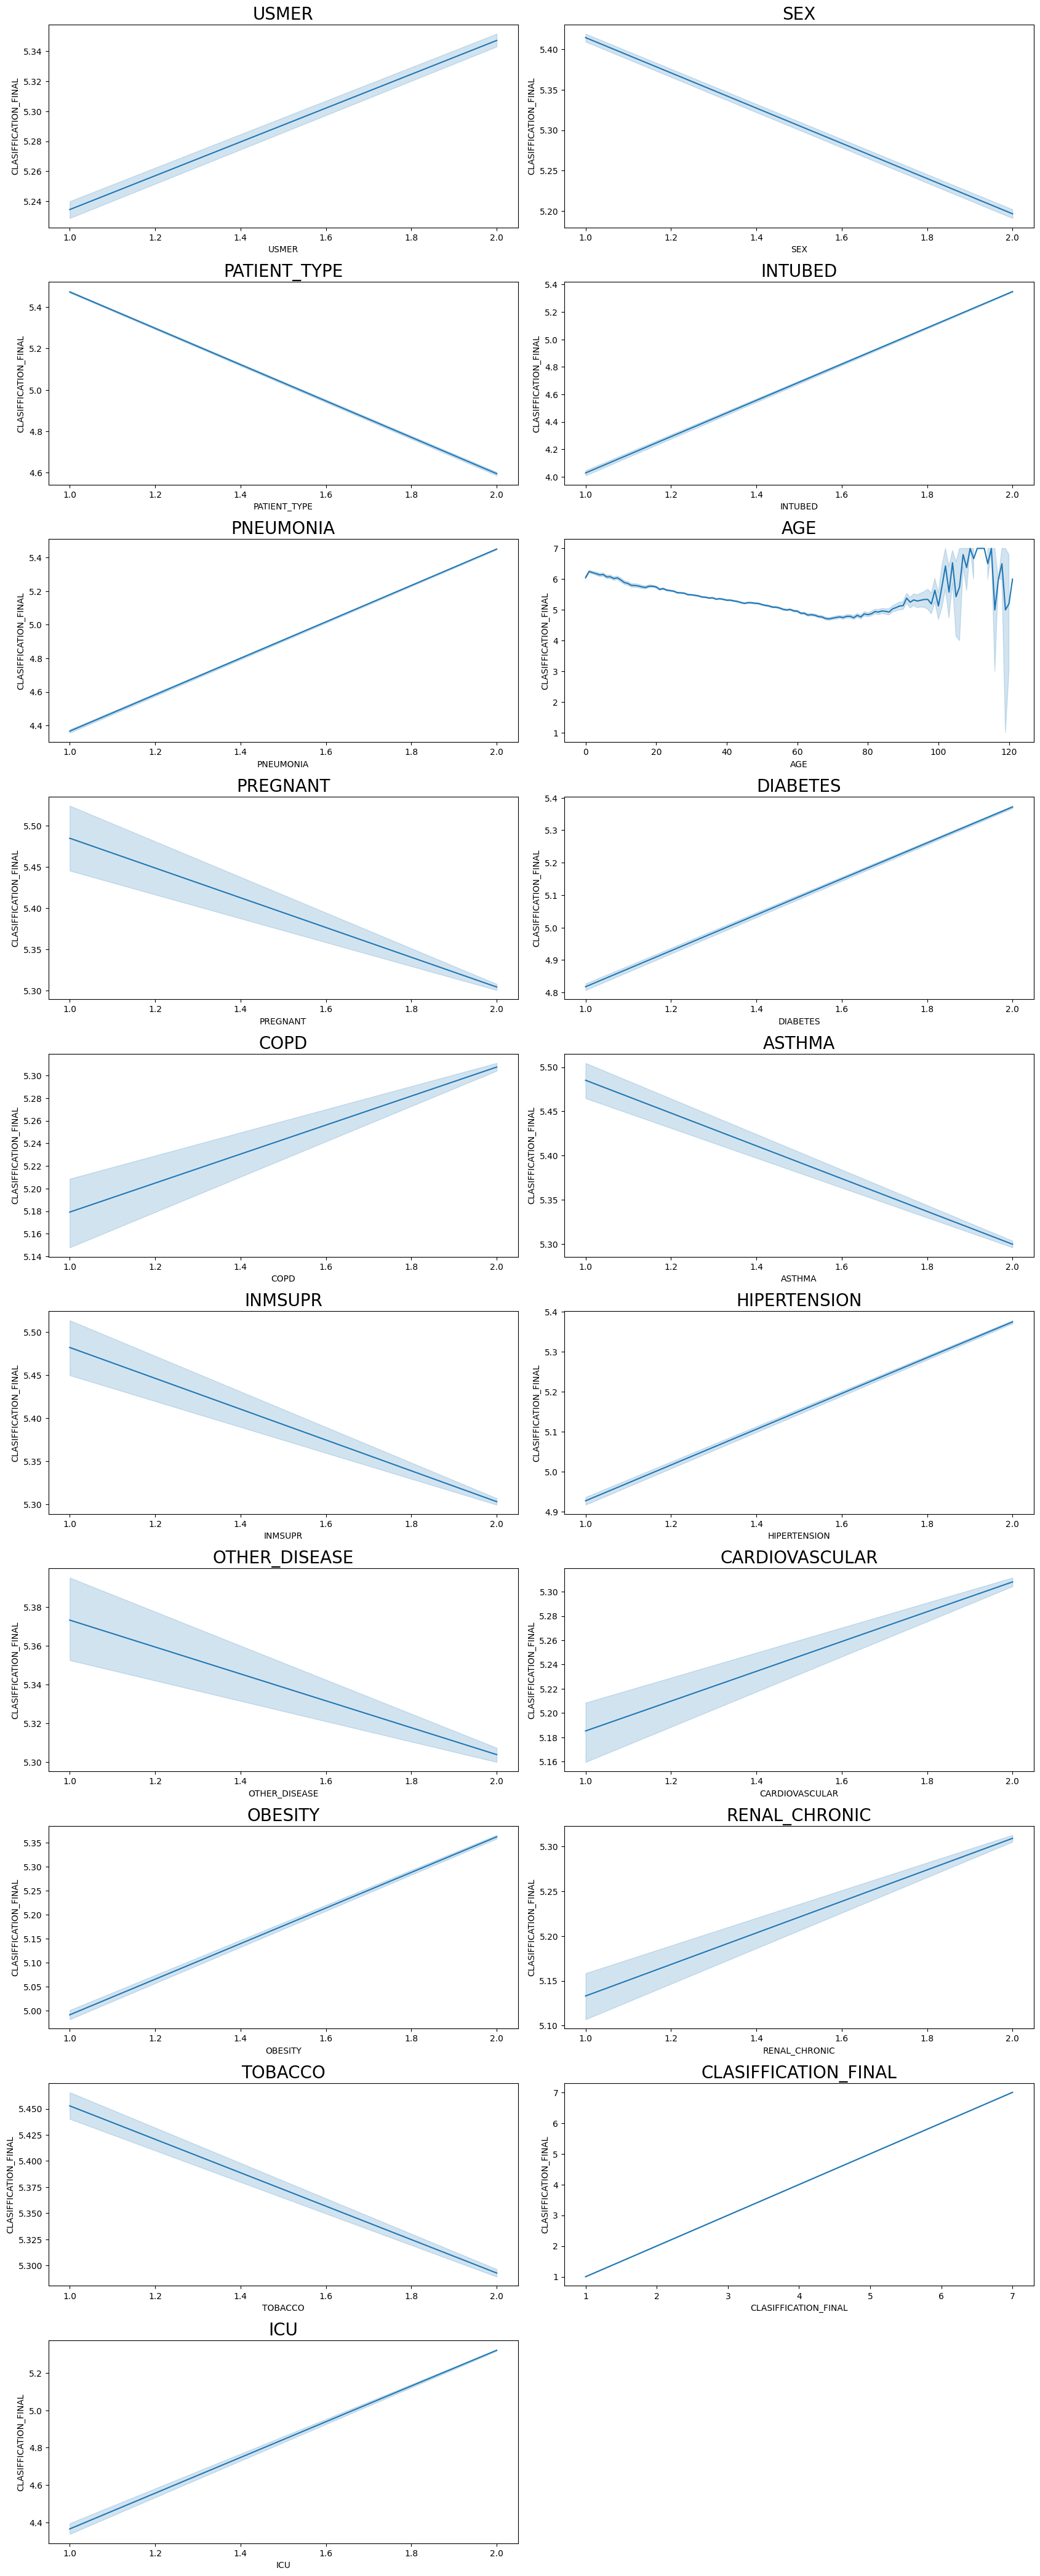

In [ ]:
plt.figure(figsize=(17,75))

for i in range(len(num_cols)):
  plt.subplot(18,2,i+1)
  sns.lineplot(x=num_cols[i],y=data['CLASIFFICATION_FINAL'],data=data)
  plt.tight_layout()
  plt.title(num_cols[i],fontsize=20)

plt.show()

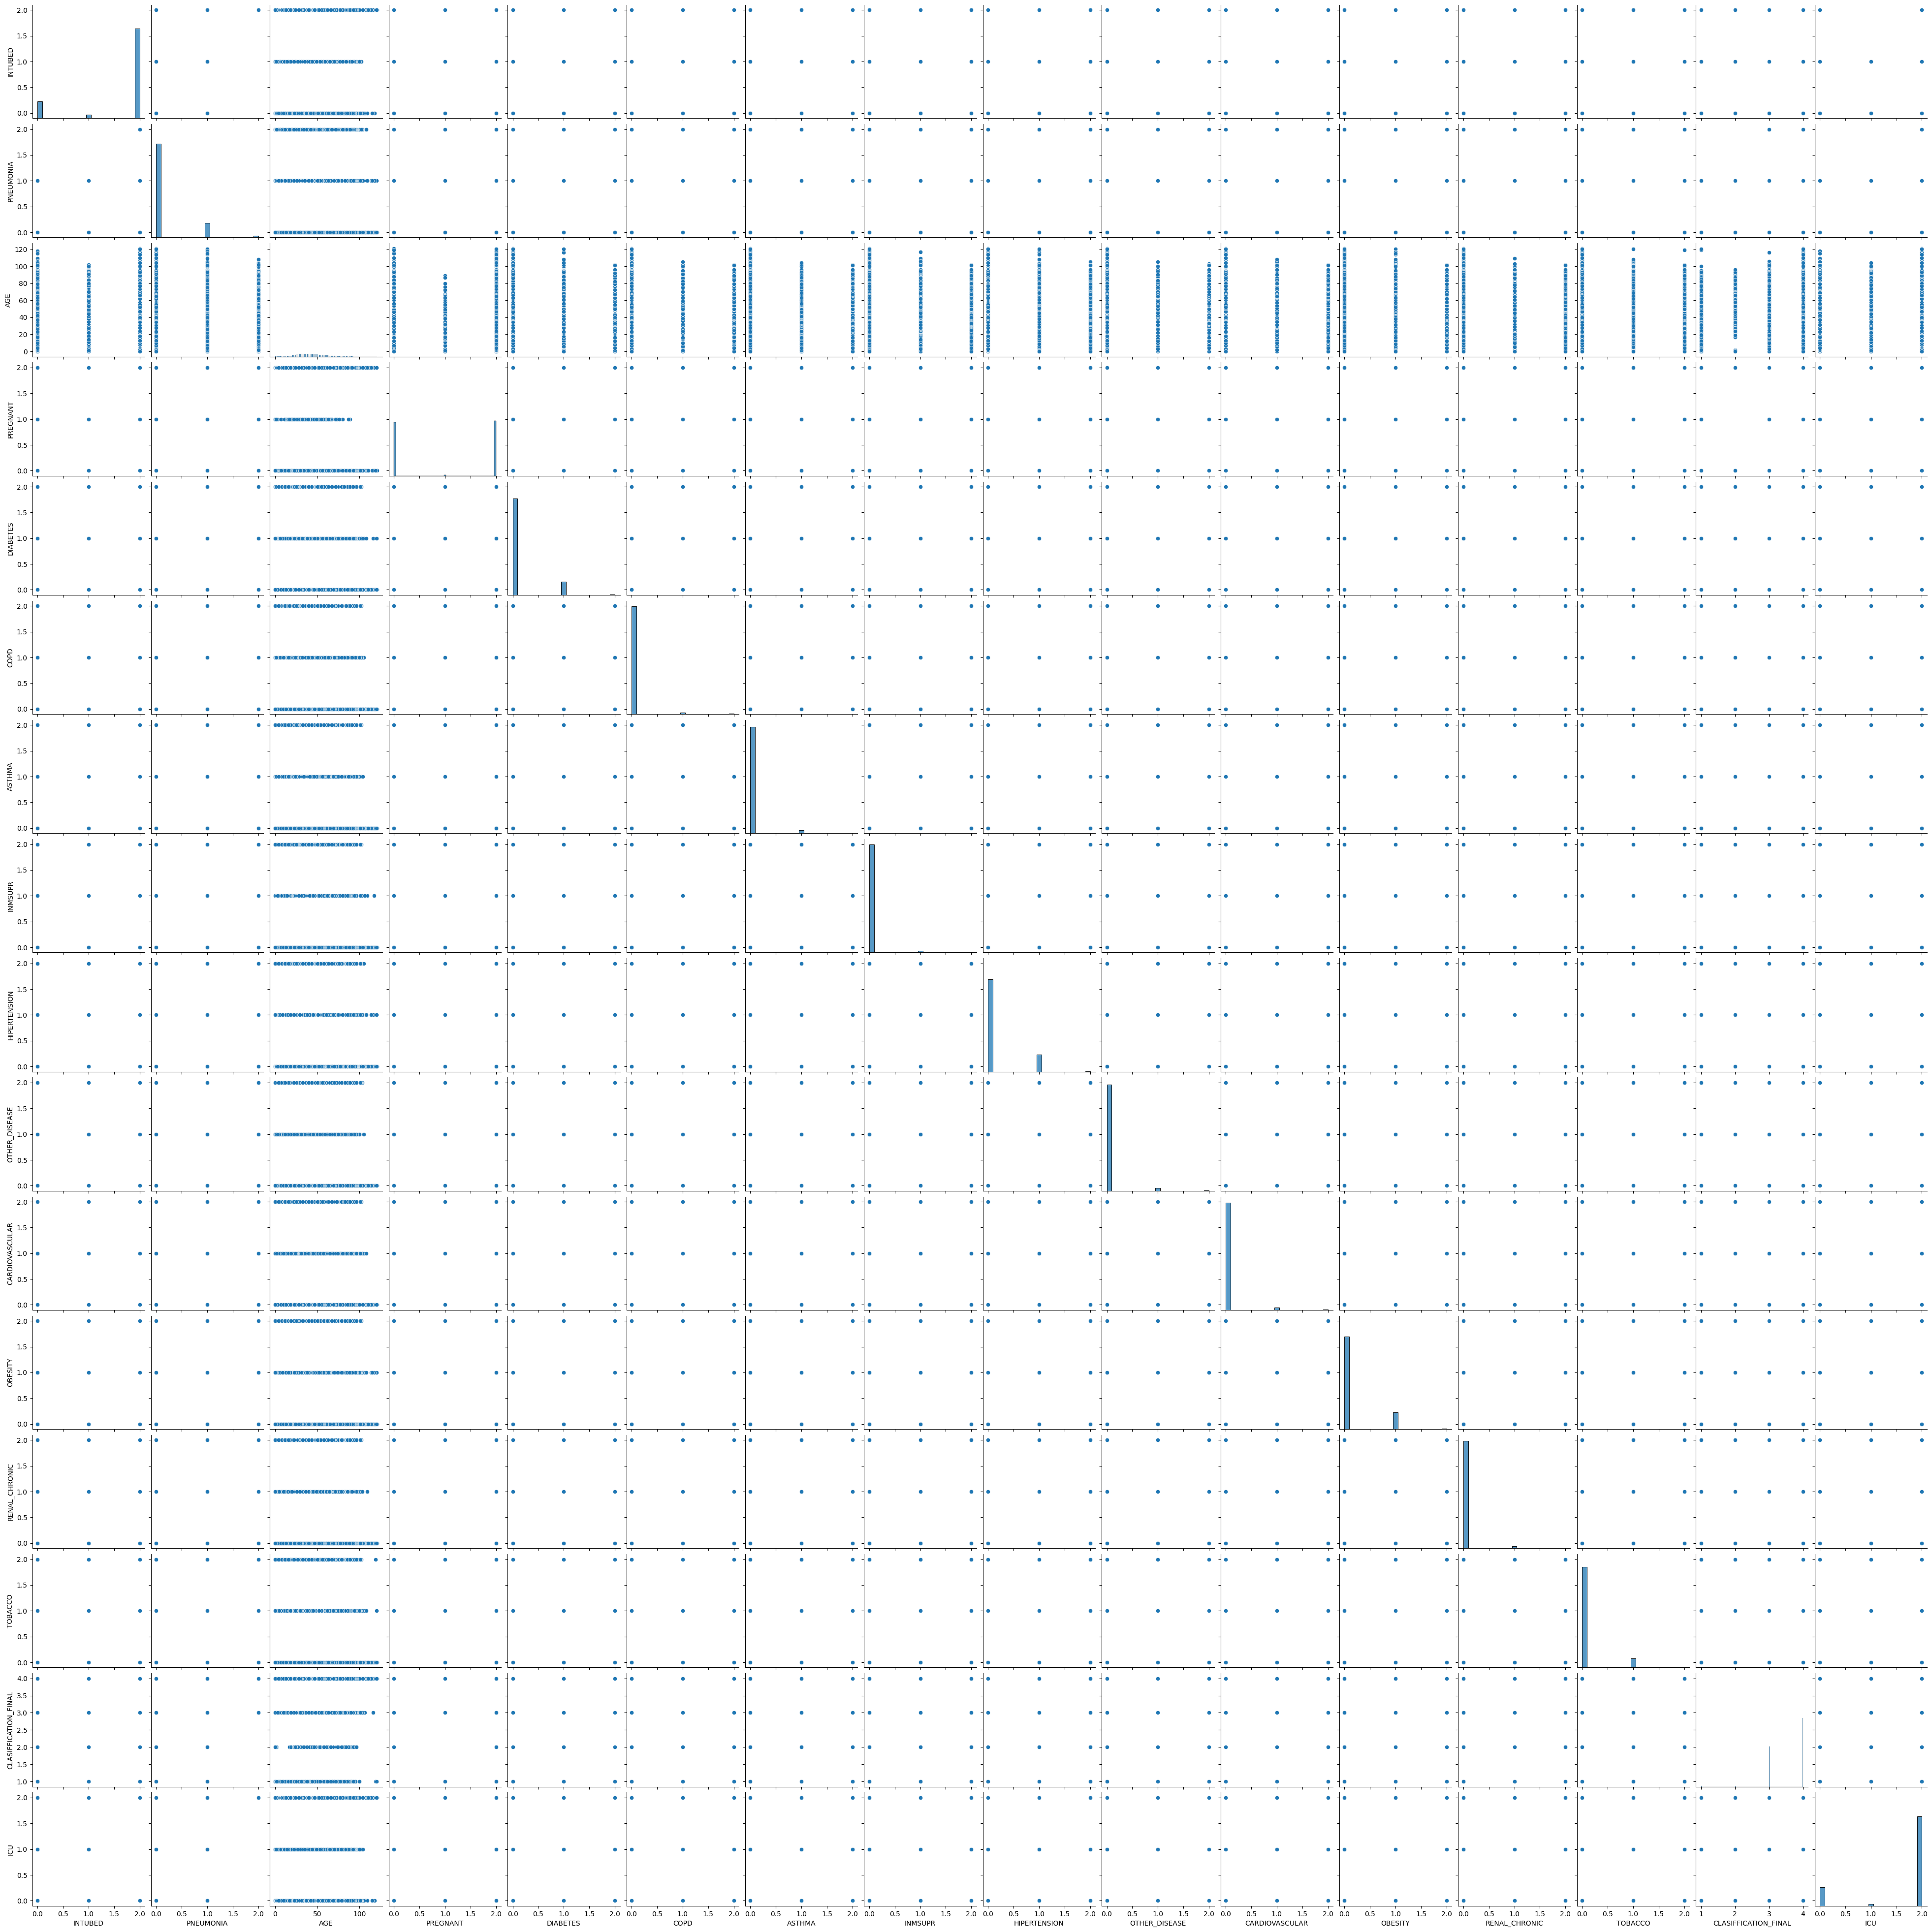

In [ ]:
data_enc= data.copy()
sns.pairplot(data_enc)
plt.show()

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data_enc.corr(),annot=True,cmap="coolwarm")

START BUILDING THE MODEL AFTER VARIABLE ANALYSIS


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  object 
 1   SEX                   1048575 non-null  object 
 2   PATIENT_TYPE          1048575 non-null  object 
 3   DATE_DIED             76942 non-null    object 
 4   INTUBED               1048575 non-null  object 
 5   PNEUMONIA             1048575 non-null  object 
 6   AGE                   1048230 non-null  float64
 7   PREGNANT              1048575 non-null  object 
 8   DIABETES              1048575 non-null  object 
 9   COPD                  1048575 non-null  object 
 10  ASTHMA                1048575 non-null  object 
 11  INMSUPR               1048575 non-null  object 
 12  HIPERTENSION          1048575 non-null  object 
 13  OTHER_DISEASE         1048575 non-null  object 
 14  CARDIOVASCULAR        1048575 non-

In [ ]:
data.head()

In [ ]:
#define X and Y variables for RandomForest model
X= data.drop(['CLASIFFICATION_FINAL','DATE_DIED'],axis=1)
y=data[['CLASIFFICATION_FINAL']]

In [ ]:
print(X.shape)
print(y.shape)

(1048575, 18)
(1048575, 1)


In [ ]:
X.head()

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
0,2,1,1,2.0,1.0,65,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2,2,1,2.0,1.0,72,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0
2,2,2,2,1.0,2.0,55,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2,1,1,2.0,2.0,53,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2,2,1,2.0,2.0,68,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
#X['DATE_DIED']= X['DATE_DIED'].astype('object')
X['USMER']= X['USMER'].astype('object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train.head(2)

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
408561,2,2,1,2.0,2.0,62,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0
70143,2,2,1,2.0,2.0,57,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(838860, 18)
(838860, 1)
(209715, 18)
(209715, 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.impute import SimpleImputer

linearregression = LinearRegression()
linearregression.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Intercept: ",linearregression.intercept_)
print("\nCoeffs: ", linearregression.coef_)


Intercept:  [7.18731366]

Coeffs:  [[-0.02795937 -0.15791179 -0.32369219  0.50397474  0.6140144  -0.00985241
   0.06255458  0.12408664 -0.37124197 -0.11770794 -0.37721635  0.0286974
  -0.20337533 -0.2470677   0.27582744 -0.27191743 -0.22024033 -0.14623629]]


In [ ]:
y_pred= linearregression.predict(X_test)

In [ ]:
mse= mean_absolute_error(y_test,y_pred)
print(mse)

In [ ]:
msqe= mean_squared_error(y_test,y_pred) **.5
print(msqe)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size= 0.3,random_state=42)
X_train1= sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(734002, 19)
(734002, 1)
(314573, 19)
(314573, 1)


In [ ]:
y_train1= y_train1.astype(float)
X_train1= X_train1.astype(float)
olsmod1= sm.OLS(y_train1,X_train1)
olsres1= olsmod1.fit()
print(olsres1.summary())

                             OLS Regression Results                             
Dep. Variable:     CLASIFFICATION_FINAL   R-squared:                       0.062
Model:                              OLS   Adj. R-squared:                  0.062
Method:                   Least Squares   F-statistic:                     2713.
Date:                  Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                          22:14:24   Log-Likelihood:            -1.4819e+06
No. Observations:                734002   AIC:                         2.964e+06
Df Residuals:                    733983   BIC:                         2.964e+06
Df Model:                            18                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.181

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1=pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index=X_train1.columns)
print('Before feature Selection: \n\n{}\n'.format(vif_series1))


Before feature Selection: 

const             2122.954167
USMER                1.040759
SEX                  1.032653
PATIENT_TYPE         1.948336
INTUBED              1.307553
PNEUMONIA            1.776550
AGE                  1.339606
PREGNANT             1.015814
DIABETES             1.266206
COPD                 1.051265
ASTHMA               1.007663
INMSUPR              1.036532
HIPERTENSION         1.345878
OTHER_DISEASE        1.028727
CARDIOVASCULAR       1.053193
OBESITY              1.043532
RENAL_CHRONIC        1.072481
TOBACCO              1.022095
ICU                  1.201380
dtype: float64



In [ ]:
#drop highest vif values and adjust r^2
X_train2 = X_train1.drop('PATIENT_TYPE',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Before Feature Selection , after removing PATIENT TYPE: \n\n{}\n'.format(vif_series2))

Before Feature Selection , after removing PATIENT TYPE: 

const             1847.565944
USMER                1.024372
SEX                  1.029648
INTUBED              1.270007
PNEUMONIA            1.277569
AGE                  1.321691
PREGNANT             1.013534
DIABETES             1.258484
COPD                 1.049550
ASTHMA               1.007650
INMSUPR              1.034166
HIPERTENSION         1.343571
OTHER_DISEASE        1.025419
CARDIOVASCULAR       1.052752
OBESITY              1.043486
RENAL_CHRONIC        1.068346
TOBACCO              1.021902
ICU                  1.195178
dtype: float64



In [ ]:
olsmod2= sm.OLS(y_train1,X_train2)
olsres2=olsmod2.fit()
print(olsres2.summary())

                             OLS Regression Results                             
Dep. Variable:     CLASIFFICATION_FINAL   R-squared:                       0.060
Model:                              OLS   Adj. R-squared:                  0.060
Method:                   Least Squares   F-statistic:                     2757.
Date:                  Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                          22:23:45   Log-Likelihood:            -1.4829e+06
No. Observations:                734002   AIC:                         2.966e+06
Df Residuals:                    733984   BIC:                         2.966e+06
Df Model:                            17                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.665

We conclude that there is no multicolinearity  because there is no such column in olsres1 that has a VIF score that is greater than 5, infact all of them are less than 2.

In [ ]:
residual = olsres1.resid
np.mean(residual)

-1.0531202051303067e-14

We also see that the mean oof residuals is very close to 0

In [ ]:
residual=olsres1.resid
fitted=olsres1.fittedvalues

In [ ]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,lowess=True)
plt.xlabel("fitted vals")
plt.ylabel("resid")
plt.title("resid plt")
plt.show()

TypeError: residplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

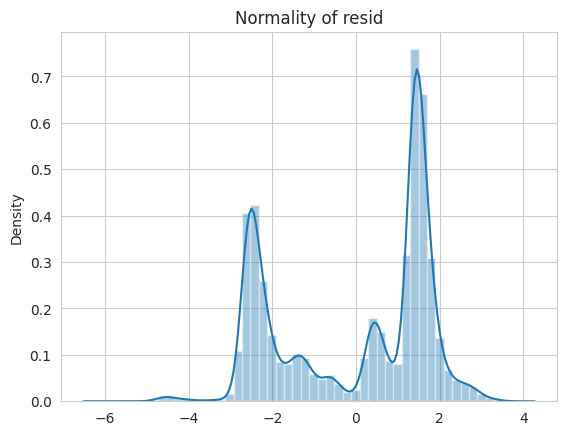

In [ ]:
sns.distplot(residual)
plt.title('Normality of resid')
plt.show()

((array([-4.76498485, -4.58295743, -4.4844787 , ...,  4.4844787 ,
          4.58295743,  4.76498485]),
  array([-6.13620979, -5.81169403, -5.26062682, ...,  3.83563109,
          3.8656802 ,  3.90509537])),
 (1.688734589832305, -1.0604396097441472e-14, 0.9267474960601534))

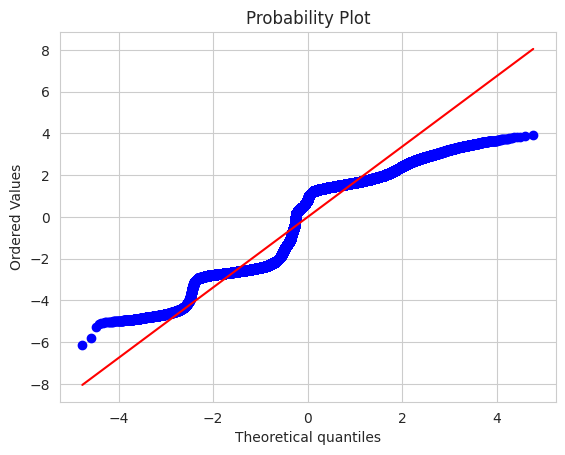

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residual, dist="norm",plot=pylab)
plt.show()

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic','p-value']
test = sms.het_goldfeldquandt(residual,X_train1)
lzip(name,test)

[('F statistic', 1.0009189365424982), ('p-value', 0.39042425186836144)]

In [ ]:
y_pred_final = olsres1.predict(X_test1)

In [ ]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train1,fitted))
print('rmse for training dataset: ',rms)

rms1 = np.sqrt(mean_squared_error(y_test1,y_pred_final))
print('rmse for test dataset: ', rms1)

rmse for training dataset:  1.8222038789254607
rmse for test dataset:  1.8213415934450699


Neural Network Implementation:


In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential,Model
from keras.layers import Dense,Input

num_classes = len(np.unique(y_train))
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(num_classes, activation='softmax'))  # Output layer with num_classes neurons for classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)




Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 7) are incompatible
